In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
example_file = './Data/genres_original/disco/disco.00001.wav'

In [3]:
signal, sr = librosa.load(example_file)

In [4]:
print(signal)

[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141]


In [5]:
print(sr)

22050


/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/1749714246.py:2: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr, alpha = 0.5)


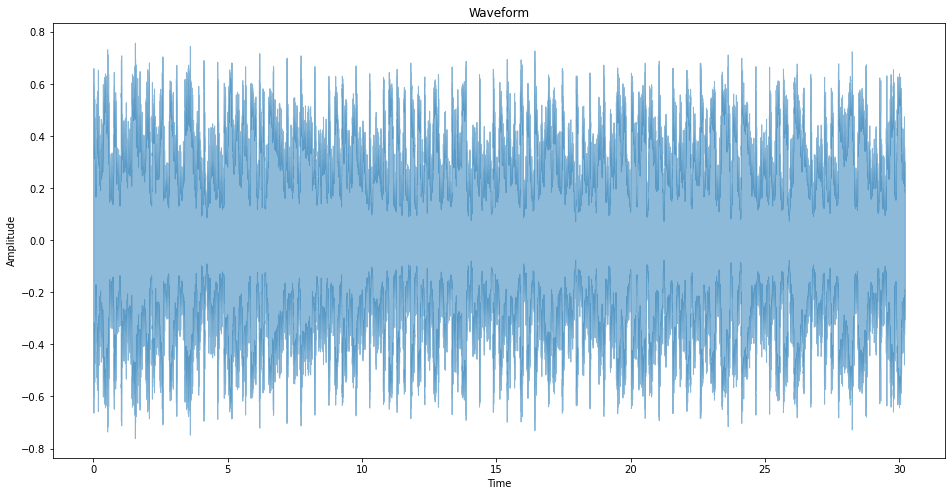

In [8]:
plt.figure(figsize = (16, 8))
librosa.display.waveshow(signal, sr, alpha = 0.5)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

In [9]:
fft = np.fft.fft(signal)

In [10]:
spectrum = np.abs(fft)

In [11]:
f = np.linspace(0, sr, len(spectrum))
f

array([0.00000000e+00, 3.31002058e-02, 6.62004116e-02, ...,
       2.20499338e+04, 2.20499669e+04, 2.20500000e+04])

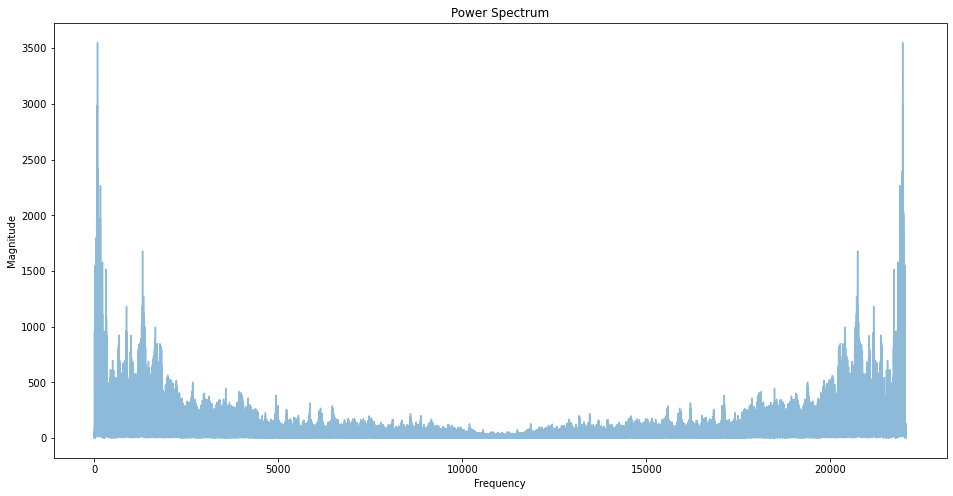

In [12]:
plt.figure(figsize = (16, 8))
plt.plot(f, spectrum, alpha = 0.5)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power Spectrum')
plt.show()

In [15]:
left_f = f[:int(len(spectrum)/2)]
left_spectrum = spectrum[:int(len(spectrum)/2)]

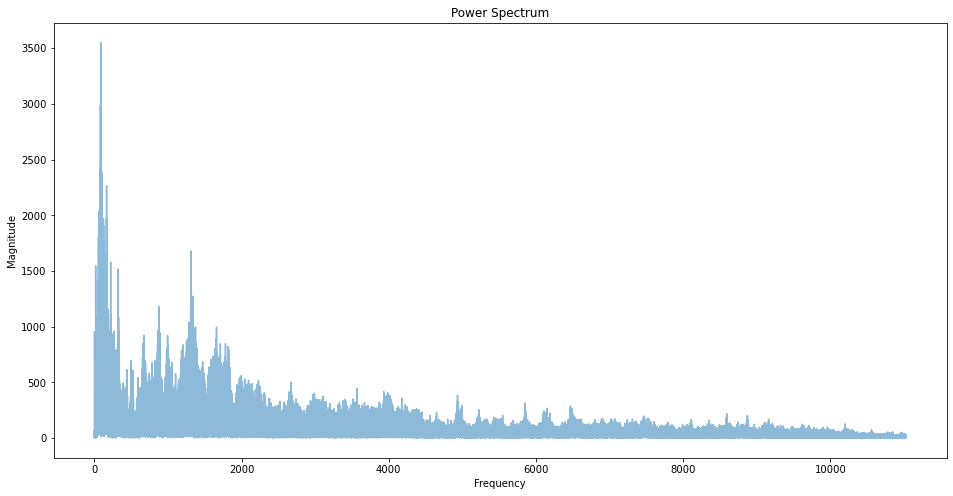

In [16]:
plt.figure(figsize = (16, 8))
plt.plot(left_f, left_spectrum, alpha = 0.5)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Power Spectrum')
plt.show()

In [17]:
#Spectrogram(STFT)
hop_length = 512
n_fft = 2048

In [19]:
#Perform STFT
stft = librosa.stft(signal, n_fft = n_fft, hop_length = hop_length)

In [20]:
spectrogram = np.abs(stft)

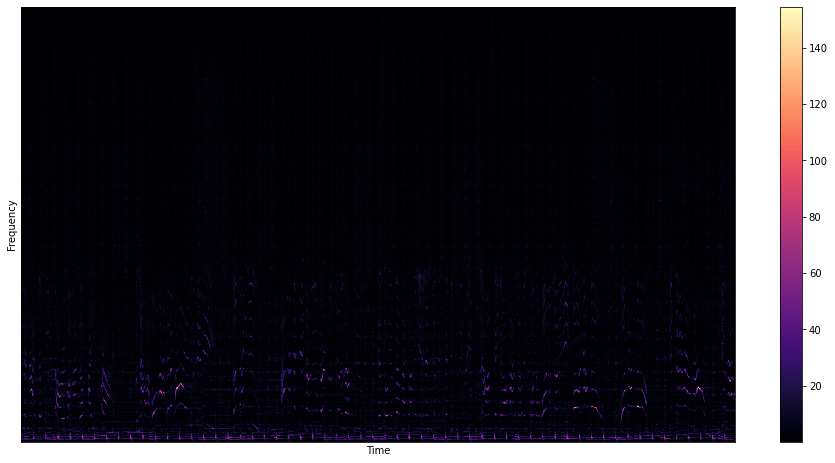

In [21]:
plt.figure(figsize = (16, 8))
librosa.display.specshow(spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [22]:
# Using logarithm to get Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

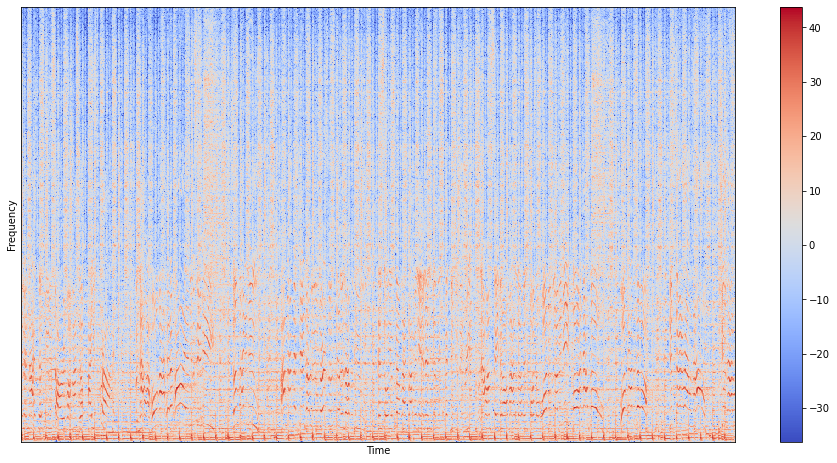

In [23]:
plt.figure(figsize = (16, 8))
librosa.display.specshow(log_spectrogram, sr = sr, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [27]:
MFCCs = librosa.feature.mfcc(signal, sr, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/4290831400.py:1: FutureWarning: Pass y=[-0.18777466 -0.23693848 -0.15542603 ...  0.03741455  0.10574341
  0.09619141], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, sr, n_fft = n_fft, hop_length = hop_length, n_mfcc = 13)


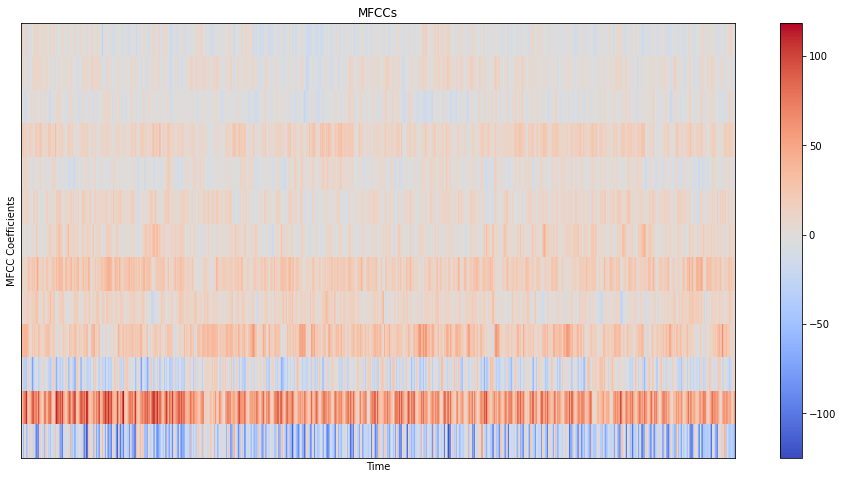

In [28]:
plt.figure(figsize = (16, 8))
librosa.display.specshow(MFCCs, sr = sr, hop_length = hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.title('MFCCs')
plt.show()

In [29]:
import json
import os
import math

In [39]:
PATH = "./Data/genres_original"
JSON_FILE = "data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30
SAMPLES_PER_TRACK = TRACK_DURATION * SAMPLE_RATE

In [40]:
def save_mfcc(dataset_path, json_path, num_mfcc = 13, n_fft = 2048, hop_length = 512, num_segments = 5):
    data = {
        'mapping': [],
        'labels': [], 
        'mfcc': []
    }
    samples_per_segment = int(SAMPLES_PER_TRACK/num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            data['mapping'].append(semantic_label)
            print("\n Processing : {}".format(semantic_label))
            
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                for d in range(num_segments):
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    
                    mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc, 
                                                n_fft = n_fft, hop_length = hop_length)
                    mfcc = mfcc.T
                    
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data['mfcc'].append(mfcc.tolist())
                        data['labels'].append(i - 1)
                        print("{}, segment: {}".format(file_path, d + 1))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)

In [41]:
save_mfcc(PATH, JSON_FILE, num_segments = 10)


 Processing : pop
./Data/genres_original/pop/pop.00027.wav, segment: 1
./Data/genres_original/pop/pop.00027.wav, segment: 2
./Data/genres_original/pop/pop.00027.wav, segment: 3
./Data/genres_original/pop/pop.00027.wav, segment: 4
./Data/genres_original/pop/pop.00027.wav, segment: 5
./Data/genres_original/pop/pop.00027.wav, segment: 6
./Data/genres_original/pop/pop.00027.wav, segment: 7
./Data/genres_original/pop/pop.00027.wav, segment: 8
./Data/genres_original/pop/pop.00027.wav, segment: 9
./Data/genres_original/pop/pop.00027.wav, segment: 10
./Data/genres_original/pop/pop.00033.wav, segment: 1
./Data/genres_original/pop/pop.00033.wav, segment: 2
./Data/genres_original/pop/pop.00033.wav, segment: 3
./Data/genres_original/pop/pop.00033.wav, segment: 4
./Data/genres_original/pop/pop.00033.wav, segment: 5
./Data/genres_original/pop/pop.00033.wav, segment: 6
./Data/genres_original/pop/pop.00033.wav, segment: 7
./Data/genres_original/pop/pop.00033.wav, segment: 8
./Data/genres_original/pop

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.03451538 0.04815674 0.06430054 ... 0.01449585 0.22509766 0.27609253], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.15509033 0.15487671 0.01696777 ... 0.03616333 0.056427   0.06491089], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.1072998   0.14035034  0.06863403 ... -0.01620483  0.04443359
 -0.01373291], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/pop/pop.00026.wav, segment: 5
./Data/genres_original/pop/pop.00026.wav, segment: 6
./Data/genres_original/pop/pop.00026.wav, segment: 7
./Data/genres_original/pop/pop.00026.wav, segment: 8
./Data/genres_original/pop/pop.00026.wav, segment: 9
./Data/genres_original/pop/pop.00026.wav, segment: 10
./Data/genres_original/pop/pop.00030.wav, segment: 1
./Data/genres_original/pop/pop.00030.wav, segment: 2
./Data/genres_original/pop/pop.00030.wav, segment: 3
./Data/genres_original/pop/pop.00030.wav, segment: 4
./Data/genres_original/pop/pop.00030.wav, segment: 5
./Data/genres_original/pop/pop.00030.wav, segment: 6
./Data/genres_original/pop/pop.00030.wav, segment: 7
./Data/genres_original/pop/pop.00030.wav, segment: 8
./Data/genres_original/pop/pop.00030.wav, segment: 9
./Data/genres_original/pop/pop.00030.wav, segment: 10
./Data/genres_original/pop/pop.00024.wav, segment: 1
./Data/genres_original/pop/pop.00024.wav, segment: 2
./Data/genres_original/pop/pop.00024.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19595337 -0.23291016 -0.06933594 ... -0.11965942 -0.1343689
 -0.1503601 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.18127441 -0.18093872 -0.20559692 ... -0.19161987 -0.33343506
 -0.47286987], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.4378357  -0.40530396 -0.2869873  ...  0.04568481  0.24121094
  0.15924072], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/pop/pop.00019.wav, segment: 6
./Data/genres_original/pop/pop.00019.wav, segment: 7
./Data/genres_original/pop/pop.00019.wav, segment: 8
./Data/genres_original/pop/pop.00019.wav, segment: 9
./Data/genres_original/pop/pop.00019.wav, segment: 10
./Data/genres_original/pop/pop.00025.wav, segment: 1
./Data/genres_original/pop/pop.00025.wav, segment: 2
./Data/genres_original/pop/pop.00025.wav, segment: 3
./Data/genres_original/pop/pop.00025.wav, segment: 4
./Data/genres_original/pop/pop.00025.wav, segment: 5
./Data/genres_original/pop/pop.00025.wav, segment: 6
./Data/genres_original/pop/pop.00025.wav, segment: 7
./Data/genres_original/pop/pop.00025.wav, segment: 8
./Data/genres_original/pop/pop.00025.wav, segment: 9
./Data/genres_original/pop/pop.00025.wav, segment: 10
./Data/genres_original/pop/pop.00031.wav, segment: 1
./Data/genres_original/pop/pop.00031.wav, segment: 2
./Data/genres_original/pop/pop.00031.wav, segment: 3
./Data/genres_original/pop/pop.00031.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.11743164  0.0821228   0.10635376 ...  0.04138184 -0.00540161
 -0.03707886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04156494  0.05252075  0.08657837 ...  0.06265259  0.11376953
  0.13931274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.11325073  0.12191772  0.08389282 ...  0.08847046 -0.316864
 -0.20196533], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/pop/pop.00035.wav, segment: 8
./Data/genres_original/pop/pop.00035.wav, segment: 9
./Data/genres_original/pop/pop.00035.wav, segment: 10
./Data/genres_original/pop/pop.00021.wav, segment: 1
./Data/genres_original/pop/pop.00021.wav, segment: 2
./Data/genres_original/pop/pop.00021.wav, segment: 3
./Data/genres_original/pop/pop.00021.wav, segment: 4
./Data/genres_original/pop/pop.00021.wav, segment: 5
./Data/genres_original/pop/pop.00021.wav, segment: 6
./Data/genres_original/pop/pop.00021.wav, segment: 7
./Data/genres_original/pop/pop.00021.wav, segment: 8
./Data/genres_original/pop/pop.00021.wav, segment: 9
./Data/genres_original/pop/pop.00021.wav, segment: 10
./Data/genres_original/pop/pop.00020.wav, segment: 1
./Data/genres_original/pop/pop.00020.wav, segment: 2
./Data/genres_original/pop/pop.00020.wav, segment: 3
./Data/genres_original/pop/pop.00020.wav, segment: 4
./Data/genres_original/pop/pop.00020.wav, segment: 5
./Data/genres_original/pop/pop.00020.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07373047  0.10604858  0.44955444 ... -0.06231689 -0.03115845
 -0.03417969], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05722046  0.06097412  0.06286621 ... -0.03826904 -0.02981567
 -0.06118774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05429077  0.00106812 -0.02001953 ... -0.20373535 -0.23486328
 -0.25445557], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/pop/pop.00022.wav, segment: 1
./Data/genres_original/pop/pop.00022.wav, segment: 2
./Data/genres_original/pop/pop.00022.wav, segment: 3
./Data/genres_original/pop/pop.00022.wav, segment: 4
./Data/genres_original/pop/pop.00022.wav, segment: 5
./Data/genres_original/pop/pop.00022.wav, segment: 6
./Data/genres_original/pop/pop.00022.wav, segment: 7
./Data/genres_original/pop/pop.00022.wav, segment: 8
./Data/genres_original/pop/pop.00022.wav, segment: 9
./Data/genres_original/pop/pop.00022.wav, segment: 10
./Data/genres_original/pop/pop.00036.wav, segment: 1
./Data/genres_original/pop/pop.00036.wav, segment: 2
./Data/genres_original/pop/pop.00036.wav, segment: 3
./Data/genres_original/pop/pop.00036.wav, segment: 4
./Data/genres_original/pop/pop.00036.wav, segment: 5
./Data/genres_original/pop/pop.00036.wav, segment: 6
./Data/genres_original/pop/pop.00036.wav, segment: 7
./Data/genres_original/pop/pop.00036.wav, segment: 8
./Data/genres_original/pop/pop.00036.wav, seg

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19641113 -0.24060059 -0.18869019 ... -0.24819946 -0.20532227
 -0.16622925], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04269409  0.06121826  0.19577026 ... -0.16287231 -0.14526367
 -0.19509888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.22875977 -0.09866333 -0.15307617 ...  0.25805664  0.2574768
  0.2314148 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/pop/pop.00044.wav, segment: 3
./Data/genres_original/pop/pop.00044.wav, segment: 4
./Data/genres_original/pop/pop.00044.wav, segment: 5
./Data/genres_original/pop/pop.00044.wav, segment: 6
./Data/genres_original/pop/pop.00044.wav, segment: 7
./Data/genres_original/pop/pop.00044.wav, segment: 8
./Data/genres_original/pop/pop.00044.wav, segment: 9
./Data/genres_original/pop/pop.00044.wav, segment: 10
./Data/genres_original/pop/pop.00050.wav, segment: 1
./Data/genres_original/pop/pop.00050.wav, segment: 2
./Data/genres_original/pop/pop.00050.wav, segment: 3
./Data/genres_original/pop/pop.00050.wav, segment: 4
./Data/genres_original/pop/pop.00050.wav, segment: 5
./Data/genres_original/pop/pop.00050.wav, segment: 6
./Data/genres_original/pop/pop.00050.wav, segment: 7
./Data/genres_original/pop/pop.00050.wav, segment: 8
./Data/genres_original/pop/pop.00050.wav, segment: 9
./Data/genres_original/pop/pop.00050.wav, segment: 10
./Data/genres_original/pop/pop.00078.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03762817  0.0128479  -0.02758789 ...  0.20932007  0.14660645
  0.03216553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05157471 -0.08035278  0.02987671 ... -0.17407227 -0.20980835
 -0.16693115], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12942505 -0.07931519 -0.03613281 ... -0.03213501  0.06811523
 -0.04019165], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/pop/pop.00093.wav, segment: 2
./Data/genres_original/pop/pop.00093.wav, segment: 3
./Data/genres_original/pop/pop.00093.wav, segment: 4
./Data/genres_original/pop/pop.00093.wav, segment: 5
./Data/genres_original/pop/pop.00093.wav, segment: 6
./Data/genres_original/pop/pop.00093.wav, segment: 7
./Data/genres_original/pop/pop.00093.wav, segment: 8
./Data/genres_original/pop/pop.00093.wav, segment: 9
./Data/genres_original/pop/pop.00093.wav, segment: 10
./Data/genres_original/pop/pop.00092.wav, segment: 1
./Data/genres_original/pop/pop.00092.wav, segment: 2
./Data/genres_original/pop/pop.00092.wav, segment: 3
./Data/genres_original/pop/pop.00092.wav, segment: 4
./Data/genres_original/pop/pop.00092.wav, segment: 5
./Data/genres_original/pop/pop.00092.wav, segment: 6
./Data/genres_original/pop/pop.00092.wav, segment: 7
./Data/genres_original/pop/pop.00092.wav, segment: 8
./Data/genres_original/pop/pop.00092.wav, segment: 9
./Data/genres_original/pop/pop.00092.wav, seg

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.3375244  0.10812378 0.22753906 ... 0.25863647 0.15545654 0.3284607 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.32696533  0.26364136  0.2281189  ...  0.08706665 -0.01443481
 -0.21609497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.17507935 -0.23721313 -0.00289917 ... -0.16494751 -0.19296265
 -0.18707275], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/pop/pop.00051.wav, segment: 4
./Data/genres_original/pop/pop.00051.wav, segment: 5
./Data/genres_original/pop/pop.00051.wav, segment: 6
./Data/genres_original/pop/pop.00051.wav, segment: 7
./Data/genres_original/pop/pop.00051.wav, segment: 8
./Data/genres_original/pop/pop.00051.wav, segment: 9
./Data/genres_original/pop/pop.00051.wav, segment: 10
./Data/genres_original/pop/pop.00045.wav, segment: 1
./Data/genres_original/pop/pop.00045.wav, segment: 2
./Data/genres_original/pop/pop.00045.wav, segment: 3
./Data/genres_original/pop/pop.00045.wav, segment: 4
./Data/genres_original/pop/pop.00045.wav, segment: 5
./Data/genres_original/pop/pop.00045.wav, segment: 6
./Data/genres_original/pop/pop.00045.wav, segment: 7
./Data/genres_original/pop/pop.00045.wav, segment: 8
./Data/genres_original/pop/pop.00045.wav, segment: 9
./Data/genres_original/pop/pop.00045.wav, segment: 10
./Data/genres_original/pop/pop.00053.wav, segment: 1
./Data/genres_original/pop/pop.00053.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03833008 -0.04818726 -0.25134277 ... -0.66363525 -0.62435913
 -0.6333313 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.61187744 -0.61035156 -0.61239624 ... -0.1730957  -0.2119751
 -0.28656006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.41738892 -0.53707886 -0.4892273  ...  0.3407898  -0.11315918
  0.36471558], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/pop/pop.00090.wav, segment: 5
./Data/genres_original/pop/pop.00090.wav, segment: 6
./Data/genres_original/pop/pop.00090.wav, segment: 7
./Data/genres_original/pop/pop.00090.wav, segment: 8
./Data/genres_original/pop/pop.00090.wav, segment: 9
./Data/genres_original/pop/pop.00090.wav, segment: 10
./Data/genres_original/pop/pop.00084.wav, segment: 1
./Data/genres_original/pop/pop.00084.wav, segment: 2
./Data/genres_original/pop/pop.00084.wav, segment: 3
./Data/genres_original/pop/pop.00084.wav, segment: 4
./Data/genres_original/pop/pop.00084.wav, segment: 5
./Data/genres_original/pop/pop.00084.wav, segment: 6
./Data/genres_original/pop/pop.00084.wav, segment: 7
./Data/genres_original/pop/pop.00084.wav, segment: 8
./Data/genres_original/pop/pop.00084.wav, segment: 9
./Data/genres_original/pop/pop.00084.wav, segment: 10
./Data/genres_original/pop/pop.00085.wav, segment: 1
./Data/genres_original/pop/pop.00085.wav, segment: 2
./Data/genres_original/pop/pop.00085.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.25527954 -0.2052002  -0.2808838  ... -0.282135   -0.46261597
 -0.47610474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.5368347  -0.47924805 -0.10552979 ...  0.15991211  0.19277954
  0.16009521], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.51446533 -0.1772461  -0.33996582 ... -0.2703247  -0.28555298
 -0.29858398], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/pop/pop.00046.wav, segment: 7
./Data/genres_original/pop/pop.00046.wav, segment: 8
./Data/genres_original/pop/pop.00046.wav, segment: 9
./Data/genres_original/pop/pop.00046.wav, segment: 10
./Data/genres_original/pop/pop.00052.wav, segment: 1
./Data/genres_original/pop/pop.00052.wav, segment: 2
./Data/genres_original/pop/pop.00052.wav, segment: 3
./Data/genres_original/pop/pop.00052.wav, segment: 4
./Data/genres_original/pop/pop.00052.wav, segment: 5
./Data/genres_original/pop/pop.00052.wav, segment: 6
./Data/genres_original/pop/pop.00052.wav, segment: 7
./Data/genres_original/pop/pop.00052.wav, segment: 8
./Data/genres_original/pop/pop.00052.wav, segment: 9
./Data/genres_original/pop/pop.00052.wav, segment: 10
./Data/genres_original/pop/pop.00056.wav, segment: 1
./Data/genres_original/pop/pop.00056.wav, segment: 2
./Data/genres_original/pop/pop.00056.wav, segment: 3
./Data/genres_original/pop/pop.00056.wav, segment: 4
./Data/genres_original/pop/pop.00056.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.62197876  0.526947    0.5707092  ... -0.33398438 -0.50860596
 -0.5805664 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.3191223  -0.40359497 -0.41314697 ... -0.01528931  0.04043579
  0.02700806], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01654053 -0.01092529  0.01089478 ... -0.37557983 -0.39935303
 -0.3864441 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/pop/pop.00095.wav, segment: 10
./Data/genres_original/pop/pop.00081.wav, segment: 1
./Data/genres_original/pop/pop.00081.wav, segment: 2
./Data/genres_original/pop/pop.00081.wav, segment: 3
./Data/genres_original/pop/pop.00081.wav, segment: 4
./Data/genres_original/pop/pop.00081.wav, segment: 5
./Data/genres_original/pop/pop.00081.wav, segment: 6
./Data/genres_original/pop/pop.00081.wav, segment: 7
./Data/genres_original/pop/pop.00081.wav, segment: 8
./Data/genres_original/pop/pop.00081.wav, segment: 9
./Data/genres_original/pop/pop.00081.wav, segment: 10
./Data/genres_original/pop/pop.00080.wav, segment: 1
./Data/genres_original/pop/pop.00080.wav, segment: 2
./Data/genres_original/pop/pop.00080.wav, segment: 3
./Data/genres_original/pop/pop.00080.wav, segment: 4
./Data/genres_original/pop/pop.00080.wav, segment: 5
./Data/genres_original/pop/pop.00080.wav, segment: 6
./Data/genres_original/pop/pop.00080.wav, segment: 7
./Data/genres_original/pop/pop.00080.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.09744263 0.08096313 0.06533813 ... 0.1086731  0.11099243 0.09487915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.09509277  0.07818604  0.11123657 ...  0.00183105 -0.00354004
  0.00967407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.04208374 0.07449341 0.07870483 ... 0.14108276 0.14822388 0.1487732 ], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/pop/pop.00057.wav, segment: 1
./Data/genres_original/pop/pop.00057.wav, segment: 2
./Data/genres_original/pop/pop.00057.wav, segment: 3
./Data/genres_original/pop/pop.00057.wav, segment: 4
./Data/genres_original/pop/pop.00057.wav, segment: 5
./Data/genres_original/pop/pop.00057.wav, segment: 6
./Data/genres_original/pop/pop.00057.wav, segment: 7
./Data/genres_original/pop/pop.00057.wav, segment: 8
./Data/genres_original/pop/pop.00057.wav, segment: 9
./Data/genres_original/pop/pop.00057.wav, segment: 10
./Data/genres_original/pop/pop.00069.wav, segment: 1
./Data/genres_original/pop/pop.00069.wav, segment: 2
./Data/genres_original/pop/pop.00069.wav, segment: 3
./Data/genres_original/pop/pop.00069.wav, segment: 4
./Data/genres_original/pop/pop.00069.wav, segment: 5
./Data/genres_original/pop/pop.00069.wav, segment: 6
./Data/genres_original/pop/pop.00069.wav, segment: 7
./Data/genres_original/pop/pop.00069.wav, segment: 8
./Data/genres_original/pop/pop.00069.wav, seg

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.29534912 -0.19015503 -0.07333374 ... -0.00756836  0.00039673
  0.00094604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00543213 -0.01980591 -0.01409912 ...  0.66018677  0.60162354
  0.3756714 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.25195312 -0.1635437  -0.0541687  ...  0.30822754  0.2647705
  0.3474121 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/pop/pop.00082.wav, segment: 3
./Data/genres_original/pop/pop.00082.wav, segment: 4
./Data/genres_original/pop/pop.00082.wav, segment: 5
./Data/genres_original/pop/pop.00082.wav, segment: 6
./Data/genres_original/pop/pop.00082.wav, segment: 7
./Data/genres_original/pop/pop.00082.wav, segment: 8
./Data/genres_original/pop/pop.00082.wav, segment: 9
./Data/genres_original/pop/pop.00082.wav, segment: 10
./Data/genres_original/pop/pop.00096.wav, segment: 1
./Data/genres_original/pop/pop.00096.wav, segment: 2
./Data/genres_original/pop/pop.00096.wav, segment: 3
./Data/genres_original/pop/pop.00096.wav, segment: 4
./Data/genres_original/pop/pop.00096.wav, segment: 5
./Data/genres_original/pop/pop.00096.wav, segment: 6
./Data/genres_original/pop/pop.00096.wav, segment: 7
./Data/genres_original/pop/pop.00096.wav, segment: 8
./Data/genres_original/pop/pop.00096.wav, segment: 9
./Data/genres_original/pop/pop.00096.wav, segment: 10
./Data/genres_original/pop/pop.00097.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.08737183 0.2849121  0.19537354 ... 0.2255249  0.30187988 0.42010498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.41308594  0.43011475  0.4805298  ... -0.881073   -0.80755615
 -0.71273804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.81500244 -0.79782104 -0.9171753  ...  0.01864624  0.16845703
 -0.0397644 ], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/pop/pop.00054.wav, segment: 1
./Data/genres_original/pop/pop.00054.wav, segment: 2
./Data/genres_original/pop/pop.00054.wav, segment: 3
./Data/genres_original/pop/pop.00054.wav, segment: 4
./Data/genres_original/pop/pop.00054.wav, segment: 5
./Data/genres_original/pop/pop.00054.wav, segment: 6
./Data/genres_original/pop/pop.00054.wav, segment: 7
./Data/genres_original/pop/pop.00054.wav, segment: 8
./Data/genres_original/pop/pop.00054.wav, segment: 9
./Data/genres_original/pop/pop.00054.wav, segment: 10
./Data/genres_original/pop/pop.00040.wav, segment: 1
./Data/genres_original/pop/pop.00040.wav, segment: 2
./Data/genres_original/pop/pop.00040.wav, segment: 3
./Data/genres_original/pop/pop.00040.wav, segment: 4
./Data/genres_original/pop/pop.00040.wav, segment: 5
./Data/genres_original/pop/pop.00040.wav, segment: 6
./Data/genres_original/pop/pop.00040.wav, segment: 7
./Data/genres_original/pop/pop.00040.wav, segment: 8
./Data/genres_original/pop/pop.00040.wav, seg

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05755615  0.53012085  0.15597534 ...  0.00912476 -0.00201416
 -0.01623535], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00280762  0.03503418  0.03829956 ... -0.02236938 -0.02017212
 -0.04837036], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.06616211 -0.01193237 -0.2244873  ... -0.2265625  -0.28070068
 -0.27249146], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/pop/pop.00071.wav, segment: 2
./Data/genres_original/pop/pop.00071.wav, segment: 3
./Data/genres_original/pop/pop.00071.wav, segment: 4
./Data/genres_original/pop/pop.00071.wav, segment: 5
./Data/genres_original/pop/pop.00071.wav, segment: 6
./Data/genres_original/pop/pop.00071.wav, segment: 7
./Data/genres_original/pop/pop.00071.wav, segment: 8
./Data/genres_original/pop/pop.00071.wav, segment: 9
./Data/genres_original/pop/pop.00071.wav, segment: 10
./Data/genres_original/pop/pop.00059.wav, segment: 1
./Data/genres_original/pop/pop.00059.wav, segment: 2
./Data/genres_original/pop/pop.00059.wav, segment: 3
./Data/genres_original/pop/pop.00059.wav, segment: 4
./Data/genres_original/pop/pop.00059.wav, segment: 5
./Data/genres_original/pop/pop.00059.wav, segment: 6
./Data/genres_original/pop/pop.00059.wav, segment: 7
./Data/genres_original/pop/pop.00059.wav, segment: 8
./Data/genres_original/pop/pop.00059.wav, segment: 9
./Data/genres_original/pop/pop.00059.wav, seg

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.14303589 0.10427856 0.0692749  ... 0.45654297 0.11090088 0.26385498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.4804077   0.5097046   0.5937805  ... -0.04598999 -0.02902222
 -0.01303101], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04507446  0.02682495 -0.00057983 ... -0.06140137 -0.10641479
 -0.18200684], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/pop/pop.00064.wav, segment: 4
./Data/genres_original/pop/pop.00064.wav, segment: 5
./Data/genres_original/pop/pop.00064.wav, segment: 6
./Data/genres_original/pop/pop.00064.wav, segment: 7
./Data/genres_original/pop/pop.00064.wav, segment: 8
./Data/genres_original/pop/pop.00064.wav, segment: 9
./Data/genres_original/pop/pop.00064.wav, segment: 10
./Data/genres_original/pop/pop.00072.wav, segment: 1
./Data/genres_original/pop/pop.00072.wav, segment: 2
./Data/genres_original/pop/pop.00072.wav, segment: 3
./Data/genres_original/pop/pop.00072.wav, segment: 4
./Data/genres_original/pop/pop.00072.wav, segment: 5
./Data/genres_original/pop/pop.00072.wav, segment: 6
./Data/genres_original/pop/pop.00072.wav, segment: 7
./Data/genres_original/pop/pop.00072.wav, segment: 8
./Data/genres_original/pop/pop.00072.wav, segment: 9
./Data/genres_original/pop/pop.00072.wav, segment: 10
./Data/genres_original/pop/pop.00066.wav, segment: 1
./Data/genres_original/pop/pop.00066.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15258789 -0.35159302  0.07720947 ... -0.32983398 -0.3366089
 -0.3559265 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.35791016  0.3979187   0.32870483 ... -0.30288696 -0.23669434
 -0.3458557 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.25360107 -0.29833984 -0.2784729  ... -0.08761597 -0.21466064
 -0.12588501], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/pop/pop.00098.wav, segment: 5
./Data/genres_original/pop/pop.00098.wav, segment: 6
./Data/genres_original/pop/pop.00098.wav, segment: 7
./Data/genres_original/pop/pop.00098.wav, segment: 8
./Data/genres_original/pop/pop.00098.wav, segment: 9
./Data/genres_original/pop/pop.00098.wav, segment: 10
./Data/genres_original/pop/pop.00067.wav, segment: 1
./Data/genres_original/pop/pop.00067.wav, segment: 2
./Data/genres_original/pop/pop.00067.wav, segment: 3
./Data/genres_original/pop/pop.00067.wav, segment: 4
./Data/genres_original/pop/pop.00067.wav, segment: 5
./Data/genres_original/pop/pop.00067.wav, segment: 6
./Data/genres_original/pop/pop.00067.wav, segment: 7
./Data/genres_original/pop/pop.00067.wav, segment: 8
./Data/genres_original/pop/pop.00067.wav, segment: 9
./Data/genres_original/pop/pop.00067.wav, segment: 10
./Data/genres_original/pop/pop.00073.wav, segment: 1
./Data/genres_original/pop/pop.00073.wav, segment: 2
./Data/genres_original/pop/pop.00073.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.10684204 0.13616943 0.074646   ... 0.18600464 0.1895752  0.19104004], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.19448853 0.1946106  0.20056152 ... 0.2121582  0.35116577 0.41189575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.23397827 0.19839478 0.18099976 ... 0.31356812 0.11608887 0.3197937 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will

./Data/genres_original/pop/pop.00063.wav, segment: 7
./Data/genres_original/pop/pop.00063.wav, segment: 8
./Data/genres_original/pop/pop.00063.wav, segment: 9
./Data/genres_original/pop/pop.00063.wav, segment: 10
./Data/genres_original/pop/pop.00088.wav, segment: 1
./Data/genres_original/pop/pop.00088.wav, segment: 2
./Data/genres_original/pop/pop.00088.wav, segment: 3
./Data/genres_original/pop/pop.00088.wav, segment: 4
./Data/genres_original/pop/pop.00088.wav, segment: 5
./Data/genres_original/pop/pop.00088.wav, segment: 6
./Data/genres_original/pop/pop.00088.wav, segment: 7
./Data/genres_original/pop/pop.00088.wav, segment: 8
./Data/genres_original/pop/pop.00088.wav, segment: 9
./Data/genres_original/pop/pop.00088.wav, segment: 10
./Data/genres_original/pop/pop.00089.wav, segment: 1
./Data/genres_original/pop/pop.00089.wav, segment: 2
./Data/genres_original/pop/pop.00089.wav, segment: 3
./Data/genres_original/pop/pop.00089.wav, segment: 4
./Data/genres_original/pop/pop.00089.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01693726 -0.01861572  0.00778198 ...  0.12719727  0.12033081
  0.12210083], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.14382935 0.17428589 0.14752197 ... 0.23370361 0.24282837 0.1956482 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.17315674  0.20230103  0.2802124  ...  0.1081543  -0.05459595
 -0.08096313], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/pop/pop.00076.wav, segment: 4
./Data/genres_original/pop/pop.00076.wav, segment: 5
./Data/genres_original/pop/pop.00076.wav, segment: 6
./Data/genres_original/pop/pop.00076.wav, segment: 7
./Data/genres_original/pop/pop.00076.wav, segment: 8
./Data/genres_original/pop/pop.00076.wav, segment: 9
./Data/genres_original/pop/pop.00076.wav, segment: 10
./Data/genres_original/pop/pop.00048.wav, segment: 1
./Data/genres_original/pop/pop.00048.wav, segment: 2
./Data/genres_original/pop/pop.00048.wav, segment: 3
./Data/genres_original/pop/pop.00048.wav, segment: 4
./Data/genres_original/pop/pop.00048.wav, segment: 5
./Data/genres_original/pop/pop.00048.wav, segment: 6
./Data/genres_original/pop/pop.00048.wav, segment: 7
./Data/genres_original/pop/pop.00048.wav, segment: 8
./Data/genres_original/pop/pop.00048.wav, segment: 9
./Data/genres_original/pop/pop.00048.wav, segment: 10
./Data/genres_original/pop/pop.00060.wav, segment: 1
./Data/genres_original/pop/pop.00060.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.21072388 -0.03363037  0.13052368 ...  0.13842773  0.09542847
  0.10083008], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.12420654  0.06262207  0.08575439 ... -0.01647949  0.03118896
  0.08093262], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01425171  0.00759888  0.07806396 ... -0.02532959  0.1055603
  0.12121582], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/pop/pop.00075.wav, segment: 2
./Data/genres_original/pop/pop.00075.wav, segment: 3
./Data/genres_original/pop/pop.00075.wav, segment: 4
./Data/genres_original/pop/pop.00075.wav, segment: 5
./Data/genres_original/pop/pop.00075.wav, segment: 6
./Data/genres_original/pop/pop.00075.wav, segment: 7
./Data/genres_original/pop/pop.00075.wav, segment: 8
./Data/genres_original/pop/pop.00075.wav, segment: 9
./Data/genres_original/pop/pop.00075.wav, segment: 10
./Data/genres_original/pop/pop.00061.wav, segment: 1
./Data/genres_original/pop/pop.00061.wav, segment: 2
./Data/genres_original/pop/pop.00061.wav, segment: 3
./Data/genres_original/pop/pop.00061.wav, segment: 4
./Data/genres_original/pop/pop.00061.wav, segment: 5
./Data/genres_original/pop/pop.00061.wav, segment: 6
./Data/genres_original/pop/pop.00061.wav, segment: 7
./Data/genres_original/pop/pop.00061.wav, segment: 8
./Data/genres_original/pop/pop.00061.wav, segment: 9
./Data/genres_original/pop/pop.00061.wav, seg

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.22299194 -0.22793579 -0.17056274 ... -0.23800659 -0.21115112
 -0.17617798], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.20458984 -0.18649292 -0.24163818 ... -0.10510254 -0.20526123
 -0.21588135], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08267212  0.01693726  0.14224243 ... -0.05725098 -0.03994751
 -0.02197266], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/pop/pop.00012.wav, segment: 3
./Data/genres_original/pop/pop.00012.wav, segment: 4
./Data/genres_original/pop/pop.00012.wav, segment: 5
./Data/genres_original/pop/pop.00012.wav, segment: 6
./Data/genres_original/pop/pop.00012.wav, segment: 7
./Data/genres_original/pop/pop.00012.wav, segment: 8
./Data/genres_original/pop/pop.00012.wav, segment: 9
./Data/genres_original/pop/pop.00012.wav, segment: 10
./Data/genres_original/pop/pop.00013.wav, segment: 1
./Data/genres_original/pop/pop.00013.wav, segment: 2
./Data/genres_original/pop/pop.00013.wav, segment: 3
./Data/genres_original/pop/pop.00013.wav, segment: 4
./Data/genres_original/pop/pop.00013.wav, segment: 5
./Data/genres_original/pop/pop.00013.wav, segment: 6
./Data/genres_original/pop/pop.00013.wav, segment: 7
./Data/genres_original/pop/pop.00013.wav, segment: 8
./Data/genres_original/pop/pop.00013.wav, segment: 9
./Data/genres_original/pop/pop.00013.wav, segment: 10
./Data/genres_original/pop/pop.00007.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.3340454   0.4536438   0.255188   ... -0.16143799 -0.13308716
 -0.12512207], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.10455322 -0.08889771 -0.06884766 ...  0.12225342  0.06304932
  0.1328125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.20922852 -0.01721191  0.00448608 ...  0.03677368  0.11981201
  0.17324829], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/pop/pop.00005.wav, segment: 5
./Data/genres_original/pop/pop.00005.wav, segment: 6
./Data/genres_original/pop/pop.00005.wav, segment: 7
./Data/genres_original/pop/pop.00005.wav, segment: 8
./Data/genres_original/pop/pop.00005.wav, segment: 9
./Data/genres_original/pop/pop.00005.wav, segment: 10
./Data/genres_original/pop/pop.00039.wav, segment: 1
./Data/genres_original/pop/pop.00039.wav, segment: 2
./Data/genres_original/pop/pop.00039.wav, segment: 3
./Data/genres_original/pop/pop.00039.wav, segment: 4
./Data/genres_original/pop/pop.00039.wav, segment: 5
./Data/genres_original/pop/pop.00039.wav, segment: 6
./Data/genres_original/pop/pop.00039.wav, segment: 7
./Data/genres_original/pop/pop.00039.wav, segment: 8
./Data/genres_original/pop/pop.00039.wav, segment: 9
./Data/genres_original/pop/pop.00039.wav, segment: 10
./Data/genres_original/pop/pop.00038.wav, segment: 1
./Data/genres_original/pop/pop.00038.wav, segment: 2
./Data/genres_original/pop/pop.00038.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.23168945 0.20697021 0.17468262 ... 0.05377197 0.17941284 0.06646729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08950806 -0.09344482 -0.08703613 ... -0.27285767 -0.23937988
 -0.3703003 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.41836548 -0.2518921  -0.22766113 ...  0.21801758  0.12039185
  0.39901733], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/pop/pop.00010.wav, segment: 3
./Data/genres_original/pop/pop.00010.wav, segment: 4
./Data/genres_original/pop/pop.00010.wav, segment: 5
./Data/genres_original/pop/pop.00010.wav, segment: 6
./Data/genres_original/pop/pop.00010.wav, segment: 7
./Data/genres_original/pop/pop.00010.wav, segment: 8
./Data/genres_original/pop/pop.00010.wav, segment: 9
./Data/genres_original/pop/pop.00010.wav, segment: 10
./Data/genres_original/pop/pop.00028.wav, segment: 1
./Data/genres_original/pop/pop.00028.wav, segment: 2
./Data/genres_original/pop/pop.00028.wav, segment: 3
./Data/genres_original/pop/pop.00028.wav, segment: 4
./Data/genres_original/pop/pop.00028.wav, segment: 5
./Data/genres_original/pop/pop.00028.wav, segment: 6
./Data/genres_original/pop/pop.00028.wav, segment: 7
./Data/genres_original/pop/pop.00028.wav, segment: 8
./Data/genres_original/pop/pop.00028.wav, segment: 9
./Data/genres_original/pop/pop.00028.wav, segment: 10
./Data/genres_original/pop/pop.00014.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03622437 -0.04815674 -0.07839966 ... -0.00708008 -0.02590942
 -0.00656128], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01504517  0.02441406 -0.00476074 ... -0.0112915  -0.02264404
 -0.00793457], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-8.1787109e-03  3.0517578e-03  2.7465820e-04 ... -2.4627686e-01
 -7.0190430e-02  2.8677368e-01], sr=22050 as keyword args. From version 0.10 pas

./Data/genres_original/pop/pop.00001.wav, segment: 3
./Data/genres_original/pop/pop.00001.wav, segment: 4
./Data/genres_original/pop/pop.00001.wav, segment: 5
./Data/genres_original/pop/pop.00001.wav, segment: 6
./Data/genres_original/pop/pop.00001.wav, segment: 7
./Data/genres_original/pop/pop.00001.wav, segment: 8
./Data/genres_original/pop/pop.00001.wav, segment: 9
./Data/genres_original/pop/pop.00001.wav, segment: 10
./Data/genres_original/pop/pop.00015.wav, segment: 1
./Data/genres_original/pop/pop.00015.wav, segment: 2
./Data/genres_original/pop/pop.00015.wav, segment: 3
./Data/genres_original/pop/pop.00015.wav, segment: 4
./Data/genres_original/pop/pop.00015.wav, segment: 5
./Data/genres_original/pop/pop.00015.wav, segment: 6
./Data/genres_original/pop/pop.00015.wav, segment: 7
./Data/genres_original/pop/pop.00015.wav, segment: 8
./Data/genres_original/pop/pop.00015.wav, segment: 9
./Data/genres_original/pop/pop.00015.wav, segment: 10
./Data/genres_original/pop/pop.00029.wav, se

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08462524  0.64450073  0.37219238 ... -0.03796387 -0.2625122
 -0.11706543], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02728271 -0.2184143  -0.08596802 ... -0.20092773 -0.21826172
 -0.22738647], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.22094727 -0.21810913 -0.20236206 ... -0.04888916 -0.07843018
  0.01571655], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/pop/pop.00017.wav, segment: 1
./Data/genres_original/pop/pop.00017.wav, segment: 2
./Data/genres_original/pop/pop.00017.wav, segment: 3
./Data/genres_original/pop/pop.00017.wav, segment: 4
./Data/genres_original/pop/pop.00017.wav, segment: 5
./Data/genres_original/pop/pop.00017.wav, segment: 6
./Data/genres_original/pop/pop.00017.wav, segment: 7
./Data/genres_original/pop/pop.00017.wav, segment: 8
./Data/genres_original/pop/pop.00017.wav, segment: 9
./Data/genres_original/pop/pop.00017.wav, segment: 10
./Data/genres_original/pop/pop.00016.wav, segment: 1
./Data/genres_original/pop/pop.00016.wav, segment: 2
./Data/genres_original/pop/pop.00016.wav, segment: 3
./Data/genres_original/pop/pop.00016.wav, segment: 4
./Data/genres_original/pop/pop.00016.wav, segment: 5
./Data/genres_original/pop/pop.00016.wav, segment: 6
./Data/genres_original/pop/pop.00016.wav, segment: 7
./Data/genres_original/pop/pop.00016.wav, segment: 8
./Data/genres_original/pop/pop.00016.wav, seg

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00137329 -0.00704956  0.00338745 ... -0.0135498   0.00091553
  0.00848389], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00085449  0.00167847  0.02139282 ... -0.01626587  0.02362061
  0.02856445], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00765991 -0.00378418  0.01638794 ...  0.07565308  0.02670288
  0.09637451], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00022.wav, segment: 9
./Data/genres_original/metal/metal.00022.wav, segment: 10
./Data/genres_original/metal/metal.00036.wav, segment: 1
./Data/genres_original/metal/metal.00036.wav, segment: 2
./Data/genres_original/metal/metal.00036.wav, segment: 3
./Data/genres_original/metal/metal.00036.wav, segment: 4
./Data/genres_original/metal/metal.00036.wav, segment: 5
./Data/genres_original/metal/metal.00036.wav, segment: 6
./Data/genres_original/metal/metal.00036.wav, segment: 7
./Data/genres_original/metal/metal.00036.wav, segment: 8
./Data/genres_original/metal/metal.00036.wav, segment: 9
./Data/genres_original/metal/metal.00036.wav, segment: 10
./Data/genres_original/metal/metal.00037.wav, segment: 1
./Data/genres_original/metal/metal.00037.wav, segment: 2
./Data/genres_original/metal/metal.00037.wav, segment: 3
./Data/genres_original/metal/metal.00037.wav, segment: 4
./Data/genres_original/metal/metal.00037.wav, segment: 5
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12512207 -0.11303711 -0.1076355  ...  0.0274353   0.07098389
  0.07208252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01794434 -0.01559448 -0.01675415 ... -0.17880249 -0.19940186
 -0.18692017], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1151123  -0.13549805 -0.14663696 ...  0.07128906  0.02572632
 -0.0144043 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00009.wav, segment: 6
./Data/genres_original/metal/metal.00009.wav, segment: 7
./Data/genres_original/metal/metal.00009.wav, segment: 8
./Data/genres_original/metal/metal.00009.wav, segment: 9
./Data/genres_original/metal/metal.00009.wav, segment: 10
./Data/genres_original/metal/metal.00035.wav, segment: 1
./Data/genres_original/metal/metal.00035.wav, segment: 2
./Data/genres_original/metal/metal.00035.wav, segment: 3
./Data/genres_original/metal/metal.00035.wav, segment: 4
./Data/genres_original/metal/metal.00035.wav, segment: 5
./Data/genres_original/metal/metal.00035.wav, segment: 6
./Data/genres_original/metal/metal.00035.wav, segment: 7
./Data/genres_original/metal/metal.00035.wav, segment: 8
./Data/genres_original/metal/metal.00035.wav, segment: 9
./Data/genres_original/metal/metal.00035.wav, segment: 10
./Data/genres_original/metal/metal.00021.wav, segment: 1
./Data/genres_original/metal/metal.00021.wav, segment: 2
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04574585 -0.07278442 -0.15594482 ...  0.15383911  0.19696045
  0.15548706], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.10852051  0.01638794 -0.02563477 ...  0.58761597  0.40408325
  0.46658325], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.49050903  0.29577637  0.27157593 ... -0.26828003 -0.36029053
 -0.3173523 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00034.wav, segment: 5
./Data/genres_original/metal/metal.00034.wav, segment: 6
./Data/genres_original/metal/metal.00034.wav, segment: 7
./Data/genres_original/metal/metal.00034.wav, segment: 8
./Data/genres_original/metal/metal.00034.wav, segment: 9
./Data/genres_original/metal/metal.00034.wav, segment: 10
./Data/genres_original/metal/metal.00008.wav, segment: 1
./Data/genres_original/metal/metal.00008.wav, segment: 2
./Data/genres_original/metal/metal.00008.wav, segment: 3
./Data/genres_original/metal/metal.00008.wav, segment: 4
./Data/genres_original/metal/metal.00008.wav, segment: 5
./Data/genres_original/metal/metal.00008.wav, segment: 6
./Data/genres_original/metal/metal.00008.wav, segment: 7
./Data/genres_original/metal/metal.00008.wav, segment: 8
./Data/genres_original/metal/metal.00008.wav, segment: 9
./Data/genres_original/metal/metal.00008.wav, segment: 10
./Data/genres_original/metal/metal.00030.wav, segment: 1
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03668213  0.03244019  0.04141235 ... -0.006073   -0.02923584
 -0.03378296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04467773 -0.03692627 -0.00717163 ... -0.11550903 -0.10913086
 -0.1506958 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15158081 -0.08908081 -0.068573   ... -0.03286743 -0.06613159
 -0.08120728], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00018.wav, segment: 1
./Data/genres_original/metal/metal.00018.wav, segment: 2
./Data/genres_original/metal/metal.00018.wav, segment: 3
./Data/genres_original/metal/metal.00018.wav, segment: 4
./Data/genres_original/metal/metal.00018.wav, segment: 5
./Data/genres_original/metal/metal.00018.wav, segment: 6
./Data/genres_original/metal/metal.00018.wav, segment: 7
./Data/genres_original/metal/metal.00018.wav, segment: 8
./Data/genres_original/metal/metal.00018.wav, segment: 9
./Data/genres_original/metal/metal.00018.wav, segment: 10
./Data/genres_original/metal/metal.00019.wav, segment: 1
./Data/genres_original/metal/metal.00019.wav, segment: 2
./Data/genres_original/metal/metal.00019.wav, segment: 3
./Data/genres_original/metal/metal.00019.wav, segment: 4
./Data/genres_original/metal/metal.00019.wav, segment: 5
./Data/genres_original/metal/metal.00019.wav, segment: 6
./Data/genres_original/metal/metal.00019.wav, segment: 7
./Data/genres_original/metal/m

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05767822  0.04898071  0.02560425 ... -0.08483887 -0.10354614
 -0.05023193], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02322388  0.01593018 -0.00430298 ... -0.00964355  0.06411743
  0.07965088], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04870605  0.10931396  0.04858398 ...  0.01837158  0.01046753
 -0.01821899], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00027.wav, segment: 2
./Data/genres_original/metal/metal.00027.wav, segment: 3
./Data/genres_original/metal/metal.00027.wav, segment: 4
./Data/genres_original/metal/metal.00027.wav, segment: 5
./Data/genres_original/metal/metal.00027.wav, segment: 6
./Data/genres_original/metal/metal.00027.wav, segment: 7
./Data/genres_original/metal/metal.00027.wav, segment: 8
./Data/genres_original/metal/metal.00027.wav, segment: 9
./Data/genres_original/metal/metal.00027.wav, segment: 10
./Data/genres_original/metal/metal.00033.wav, segment: 1
./Data/genres_original/metal/metal.00033.wav, segment: 2
./Data/genres_original/metal/metal.00033.wav, segment: 3
./Data/genres_original/metal/metal.00033.wav, segment: 4
./Data/genres_original/metal/metal.00033.wav, segment: 5
./Data/genres_original/metal/metal.00033.wav, segment: 6
./Data/genres_original/metal/metal.00033.wav, segment: 7
./Data/genres_original/metal/metal.00033.wav, segment: 8
./Data/genres_original/metal/m

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1796875  -0.21328735 -0.22064209 ... -0.554657   -0.5426636
 -0.5340271 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.53411865 -0.54382324 -0.5633545  ... -0.06100464  0.00097656
 -0.00430298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01690674 -0.01809692 -0.05883789 ...  0.19760132  0.02694702
 -0.11193848], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/metal/metal.00082.wav, segment: 1
./Data/genres_original/metal/metal.00082.wav, segment: 2
./Data/genres_original/metal/metal.00082.wav, segment: 3
./Data/genres_original/metal/metal.00082.wav, segment: 4
./Data/genres_original/metal/metal.00082.wav, segment: 5
./Data/genres_original/metal/metal.00082.wav, segment: 6
./Data/genres_original/metal/metal.00082.wav, segment: 7
./Data/genres_original/metal/metal.00082.wav, segment: 8
./Data/genres_original/metal/metal.00082.wav, segment: 9
./Data/genres_original/metal/metal.00082.wav, segment: 10
./Data/genres_original/metal/metal.00096.wav, segment: 1
./Data/genres_original/metal/metal.00096.wav, segment: 2
./Data/genres_original/metal/metal.00096.wav, segment: 3
./Data/genres_original/metal/metal.00096.wav, segment: 4
./Data/genres_original/metal/metal.00096.wav, segment: 5
./Data/genres_original/metal/metal.00096.wav, segment: 6
./Data/genres_original/metal/metal.00096.wav, segment: 7
./Data/genres_original/metal/m

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.10452271  0.15914917  0.10348511 ... -0.03390503  0.08117676
  0.11730957], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04428101 -0.0222168  -0.05966187 ... -0.56259155 -0.60009766
 -0.69351196], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.694458   -0.60110474 -0.5629883  ... -0.02633667 -0.08013916
 -0.16540527], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00041.wav, segment: 7
./Data/genres_original/metal/metal.00041.wav, segment: 8
./Data/genres_original/metal/metal.00041.wav, segment: 9
./Data/genres_original/metal/metal.00041.wav, segment: 10
./Data/genres_original/metal/metal.00055.wav, segment: 1
./Data/genres_original/metal/metal.00055.wav, segment: 2
./Data/genres_original/metal/metal.00055.wav, segment: 3
./Data/genres_original/metal/metal.00055.wav, segment: 4
./Data/genres_original/metal/metal.00055.wav, segment: 5
./Data/genres_original/metal/metal.00055.wav, segment: 6
./Data/genres_original/metal/metal.00055.wav, segment: 7
./Data/genres_original/metal/metal.00055.wav, segment: 8
./Data/genres_original/metal/metal.00055.wav, segment: 9
./Data/genres_original/metal/metal.00055.wav, segment: 10
./Data/genres_original/metal/metal.00054.wav, segment: 1
./Data/genres_original/metal/metal.00054.wav, segment: 2
./Data/genres_original/metal/metal.00054.wav, segment: 3
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.27270508  0.1963501   0.2529297  ... -0.5441284  -0.6865845
 -0.32196045], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.21917725 0.42227173 0.15307617 ... 0.31832886 0.24874878 0.2236023 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.35998535 0.49838257 0.38043213 ... 0.1522522  0.11907959 0.21801758], sr=22050 as keyword args. From version 0.10 passing these as positional argument

./Data/genres_original/metal/metal.00068.wav, segment: 8
./Data/genres_original/metal/metal.00068.wav, segment: 9
./Data/genres_original/metal/metal.00068.wav, segment: 10
./Data/genres_original/metal/metal.00097.wav, segment: 1
./Data/genres_original/metal/metal.00097.wav, segment: 2
./Data/genres_original/metal/metal.00097.wav, segment: 3
./Data/genres_original/metal/metal.00097.wav, segment: 4
./Data/genres_original/metal/metal.00097.wav, segment: 5
./Data/genres_original/metal/metal.00097.wav, segment: 6
./Data/genres_original/metal/metal.00097.wav, segment: 7
./Data/genres_original/metal/metal.00097.wav, segment: 8
./Data/genres_original/metal/metal.00097.wav, segment: 9
./Data/genres_original/metal/metal.00097.wav, segment: 10
./Data/genres_original/metal/metal.00083.wav, segment: 1
./Data/genres_original/metal/metal.00083.wav, segment: 2
./Data/genres_original/metal/metal.00083.wav, segment: 3
./Data/genres_original/metal/metal.00083.wav, segment: 4
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.13476562 -0.03012085 -0.05203247 ...  0.23794556  0.18676758
  0.2554016 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.3095398   0.12844849 -0.07495117 ...  0.01739502  0.03503418
  0.01739502], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01858521 -0.02304077 -0.0065918  ...  0.072052   -0.00512695
 -0.00805664], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00095.wav, segment: 10
./Data/genres_original/metal/metal.00081.wav, segment: 1
./Data/genres_original/metal/metal.00081.wav, segment: 2
./Data/genres_original/metal/metal.00081.wav, segment: 3
./Data/genres_original/metal/metal.00081.wav, segment: 4
./Data/genres_original/metal/metal.00081.wav, segment: 5
./Data/genres_original/metal/metal.00081.wav, segment: 6
./Data/genres_original/metal/metal.00081.wav, segment: 7
./Data/genres_original/metal/metal.00081.wav, segment: 8
./Data/genres_original/metal/metal.00081.wav, segment: 9
./Data/genres_original/metal/metal.00081.wav, segment: 10
./Data/genres_original/metal/metal.00056.wav, segment: 1
./Data/genres_original/metal/metal.00056.wav, segment: 2
./Data/genres_original/metal/metal.00056.wav, segment: 3
./Data/genres_original/metal/metal.00056.wav, segment: 4
./Data/genres_original/metal/metal.00056.wav, segment: 5
./Data/genres_original/metal/metal.00056.wav, segment: 6
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.2862854  -0.19030762 -0.26657104 ...  0.33486938  0.3444214
  0.16897583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.03070068 0.13922119 0.34985352 ... 0.496521   0.3595276  0.14135742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.5463257   0.7424927   0.4935913  ... -0.51187134 -0.6373291
 -0.67248535], sr=22050 as keyword args. From version 0.10 passing these as positional ar

./Data/genres_original/metal/metal.00043.wav, segment: 10
./Data/genres_original/metal/metal.00057.wav, segment: 1
./Data/genres_original/metal/metal.00057.wav, segment: 2
./Data/genres_original/metal/metal.00057.wav, segment: 3
./Data/genres_original/metal/metal.00057.wav, segment: 4
./Data/genres_original/metal/metal.00057.wav, segment: 5
./Data/genres_original/metal/metal.00057.wav, segment: 6
./Data/genres_original/metal/metal.00057.wav, segment: 7
./Data/genres_original/metal/metal.00057.wav, segment: 8
./Data/genres_original/metal/metal.00057.wav, segment: 9
./Data/genres_original/metal/metal.00057.wav, segment: 10
./Data/genres_original/metal/metal.00080.wav, segment: 1
./Data/genres_original/metal/metal.00080.wav, segment: 2
./Data/genres_original/metal/metal.00080.wav, segment: 3
./Data/genres_original/metal/metal.00080.wav, segment: 4
./Data/genres_original/metal/metal.00080.wav, segment: 5
./Data/genres_original/metal/metal.00080.wav, segment: 6
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02270508 -0.05401611 -0.05130005 ... -0.04946899 -0.11254883
 -0.22195435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.20687866 -0.23059082 -0.3746643  ... -0.00918579 -0.03305054
 -0.03674316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00997925  0.03439331  0.05361938 ...  0.0184021   0.0949707
  0.18771362], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/metal/metal.00090.wav, segment: 4
./Data/genres_original/metal/metal.00090.wav, segment: 5
./Data/genres_original/metal/metal.00090.wav, segment: 6
./Data/genres_original/metal/metal.00090.wav, segment: 7
./Data/genres_original/metal/metal.00090.wav, segment: 8
./Data/genres_original/metal/metal.00090.wav, segment: 9
./Data/genres_original/metal/metal.00090.wav, segment: 10
./Data/genres_original/metal/metal.00084.wav, segment: 1
./Data/genres_original/metal/metal.00084.wav, segment: 2
./Data/genres_original/metal/metal.00084.wav, segment: 3
./Data/genres_original/metal/metal.00084.wav, segment: 4
./Data/genres_original/metal/metal.00084.wav, segment: 5
./Data/genres_original/metal/metal.00084.wav, segment: 6
./Data/genres_original/metal/metal.00084.wav, segment: 7
./Data/genres_original/metal/metal.00084.wav, segment: 8
./Data/genres_original/metal/metal.00084.wav, segment: 9
./Data/genres_original/metal/metal.00084.wav, segment: 10
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.48910522 -0.77838135 -0.70703125 ... -0.10067749 -0.04302979
  0.0944519 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00195312 -0.2720337  -0.29052734 ... -0.08798218  0.01519775
  0.05657959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.097229   -0.09414673 -0.0725708  ... -0.05911255 -0.04446411
 -0.07437134], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00046.wav, segment: 7
./Data/genres_original/metal/metal.00046.wav, segment: 8
./Data/genres_original/metal/metal.00046.wav, segment: 9
./Data/genres_original/metal/metal.00046.wav, segment: 10
./Data/genres_original/metal/metal.00052.wav, segment: 1
./Data/genres_original/metal/metal.00052.wav, segment: 2
./Data/genres_original/metal/metal.00052.wav, segment: 3
./Data/genres_original/metal/metal.00052.wav, segment: 4
./Data/genres_original/metal/metal.00052.wav, segment: 5
./Data/genres_original/metal/metal.00052.wav, segment: 6
./Data/genres_original/metal/metal.00052.wav, segment: 7
./Data/genres_original/metal/metal.00052.wav, segment: 8
./Data/genres_original/metal/metal.00052.wav, segment: 9
./Data/genres_original/metal/metal.00052.wav, segment: 10
./Data/genres_original/metal/metal.00085.wav, segment: 1
./Data/genres_original/metal/metal.00085.wav, segment: 2
./Data/genres_original/metal/metal.00085.wav, segment: 3
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07821655  0.0177002  -0.0005188  ...  0.03198242  0.12109375
  0.08169556], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00958252 -0.0569458   0.02548218 ...  0.00759888  0.03811646
  0.06158447], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.09268188 0.0194397  0.08004761 ... 0.04956055 0.04159546 0.0710144 ], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/metal/metal.00087.wav, segment: 10
./Data/genres_original/metal/metal.00093.wav, segment: 1
./Data/genres_original/metal/metal.00093.wav, segment: 2
./Data/genres_original/metal/metal.00093.wav, segment: 3
./Data/genres_original/metal/metal.00093.wav, segment: 4
./Data/genres_original/metal/metal.00093.wav, segment: 5
./Data/genres_original/metal/metal.00093.wav, segment: 6
./Data/genres_original/metal/metal.00093.wav, segment: 7
./Data/genres_original/metal/metal.00093.wav, segment: 8
./Data/genres_original/metal/metal.00093.wav, segment: 9
./Data/genres_original/metal/metal.00093.wav, segment: 10
./Data/genres_original/metal/metal.00044.wav, segment: 1
./Data/genres_original/metal/metal.00044.wav, segment: 2
./Data/genres_original/metal/metal.00044.wav, segment: 3
./Data/genres_original/metal/metal.00044.wav, segment: 4
./Data/genres_original/metal/metal.00044.wav, segment: 5
./Data/genres_original/metal/metal.00044.wav, segment: 6
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00045776 -0.04495239  0.00149536 ...  0.02124023 -0.01556396
 -0.01333618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02062988 -0.0446167  -0.04595947 ... -0.08163452 -0.14816284
 -0.1583252 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.13110352 -0.19125366 -0.22958374 ...  0.09277344  0.13586426
  0.1272583 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00079.wav, segment: 2
./Data/genres_original/metal/metal.00079.wav, segment: 3
./Data/genres_original/metal/metal.00079.wav, segment: 4
./Data/genres_original/metal/metal.00079.wav, segment: 5
./Data/genres_original/metal/metal.00079.wav, segment: 6
./Data/genres_original/metal/metal.00079.wav, segment: 7
./Data/genres_original/metal/metal.00079.wav, segment: 8
./Data/genres_original/metal/metal.00079.wav, segment: 9
./Data/genres_original/metal/metal.00079.wav, segment: 10
./Data/genres_original/metal/metal.00051.wav, segment: 1
./Data/genres_original/metal/metal.00051.wav, segment: 2
./Data/genres_original/metal/metal.00051.wav, segment: 3
./Data/genres_original/metal/metal.00051.wav, segment: 4
./Data/genres_original/metal/metal.00051.wav, segment: 5
./Data/genres_original/metal/metal.00051.wav, segment: 6
./Data/genres_original/metal/metal.00051.wav, segment: 7
./Data/genres_original/metal/metal.00051.wav, segment: 8
./Data/genres_original/metal/m

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.16070557  0.30841064  0.20098877 ... -0.51083374 -0.49417114
 -0.42993164], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04074097  0.04595947  0.03143311 ... -0.07830811 -0.05545044
 -0.0708313 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.10192871 -0.11959839 -0.12701416 ... -0.015625   -0.01733398
 -0.0201416 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00086.wav, segment: 4
./Data/genres_original/metal/metal.00086.wav, segment: 5
./Data/genres_original/metal/metal.00086.wav, segment: 6
./Data/genres_original/metal/metal.00086.wav, segment: 7
./Data/genres_original/metal/metal.00086.wav, segment: 8
./Data/genres_original/metal/metal.00086.wav, segment: 9
./Data/genres_original/metal/metal.00086.wav, segment: 10
./Data/genres_original/metal/metal.00048.wav, segment: 1
./Data/genres_original/metal/metal.00048.wav, segment: 2
./Data/genres_original/metal/metal.00048.wav, segment: 3
./Data/genres_original/metal/metal.00048.wav, segment: 4
./Data/genres_original/metal/metal.00048.wav, segment: 5
./Data/genres_original/metal/metal.00048.wav, segment: 6
./Data/genres_original/metal/metal.00048.wav, segment: 7
./Data/genres_original/metal/metal.00048.wav, segment: 8
./Data/genres_original/metal/metal.00048.wav, segment: 9
./Data/genres_original/metal/metal.00048.wav, segment: 10
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08648682 -0.10812378 -0.05697632 ... -0.0814209  -0.09124756
 -0.13565063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.20977783 -0.23287964 -0.17544556 ... -0.13412476 -0.07281494
 -0.01638794], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0138855  -0.01419067 -0.01437378 ... -0.07150269 -0.10726929
 -0.09884644], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00075.wav, segment: 6
./Data/genres_original/metal/metal.00075.wav, segment: 7
./Data/genres_original/metal/metal.00075.wav, segment: 8
./Data/genres_original/metal/metal.00075.wav, segment: 9
./Data/genres_original/metal/metal.00075.wav, segment: 10
./Data/genres_original/metal/metal.00061.wav, segment: 1
./Data/genres_original/metal/metal.00061.wav, segment: 2
./Data/genres_original/metal/metal.00061.wav, segment: 3
./Data/genres_original/metal/metal.00061.wav, segment: 4
./Data/genres_original/metal/metal.00061.wav, segment: 5
./Data/genres_original/metal/metal.00061.wav, segment: 6
./Data/genres_original/metal/metal.00061.wav, segment: 7
./Data/genres_original/metal/metal.00061.wav, segment: 8
./Data/genres_original/metal/metal.00061.wav, segment: 9
./Data/genres_original/metal/metal.00061.wav, segment: 10
./Data/genres_original/metal/metal.00049.wav, segment: 1
./Data/genres_original/metal/metal.00049.wav, segment: 2
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.18539429  0.13830566  0.00112915 ... -0.20922852 -0.22219849
 -0.08905029], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02798462 -0.03341675 -0.2199707  ...  0.0199585  -0.05038452
  0.17398071], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.36154175  0.15219116 -0.24087524 ... -0.32312012 -0.3387146
 -0.3982544 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/metal/metal.00077.wav, segment: 9
./Data/genres_original/metal/metal.00077.wav, segment: 10
./Data/genres_original/metal/metal.00063.wav, segment: 1
./Data/genres_original/metal/metal.00063.wav, segment: 2
./Data/genres_original/metal/metal.00063.wav, segment: 3
./Data/genres_original/metal/metal.00063.wav, segment: 4
./Data/genres_original/metal/metal.00063.wav, segment: 5
./Data/genres_original/metal/metal.00063.wav, segment: 6
./Data/genres_original/metal/metal.00063.wav, segment: 7
./Data/genres_original/metal/metal.00063.wav, segment: 8
./Data/genres_original/metal/metal.00063.wav, segment: 9
./Data/genres_original/metal/metal.00063.wav, segment: 10
./Data/genres_original/metal/metal.00062.wav, segment: 1
./Data/genres_original/metal/metal.00062.wav, segment: 2
./Data/genres_original/metal/metal.00062.wav, segment: 3
./Data/genres_original/metal/metal.00062.wav, segment: 4
./Data/genres_original/metal/metal.00062.wav, segment: 5
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02087402 -0.02761841 -0.04104614 ...  0.01156616  0.00656128
  0.00109863], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00106812 0.00558472 0.00939941 ... 0.01153564 0.04525757 0.05053711], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05169678  0.0489502   0.03079224 ... -0.08837891 -0.03311157
  0.04327393], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/metal/metal.00099.wav, segment: 3
./Data/genres_original/metal/metal.00099.wav, segment: 4
./Data/genres_original/metal/metal.00099.wav, segment: 5
./Data/genres_original/metal/metal.00099.wav, segment: 6
./Data/genres_original/metal/metal.00099.wav, segment: 7
./Data/genres_original/metal/metal.00099.wav, segment: 8
./Data/genres_original/metal/metal.00099.wav, segment: 9
./Data/genres_original/metal/metal.00099.wav, segment: 10
./Data/genres_original/metal/metal.00072.wav, segment: 1
./Data/genres_original/metal/metal.00072.wav, segment: 2
./Data/genres_original/metal/metal.00072.wav, segment: 3
./Data/genres_original/metal/metal.00072.wav, segment: 4
./Data/genres_original/metal/metal.00072.wav, segment: 5
./Data/genres_original/metal/metal.00072.wav, segment: 6
./Data/genres_original/metal/metal.00072.wav, segment: 7
./Data/genres_original/metal/metal.00072.wav, segment: 8
./Data/genres_original/metal/metal.00072.wav, segment: 9
./Data/genres_original/metal/m

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12936401 -0.14221191 -0.11578369 ...  0.24383545  0.20037842
  0.09173584], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03320312  0.00741577 -0.01116943 ... -0.20986938 -0.24502563
 -0.21054077], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14639282 -0.01794434  0.12771606 ...  0.03182983  0.05258179
  0.04104614], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00073.wav, segment: 6
./Data/genres_original/metal/metal.00073.wav, segment: 7
./Data/genres_original/metal/metal.00073.wav, segment: 8
./Data/genres_original/metal/metal.00073.wav, segment: 9
./Data/genres_original/metal/metal.00073.wav, segment: 10
./Data/genres_original/metal/metal.00098.wav, segment: 1
./Data/genres_original/metal/metal.00098.wav, segment: 2
./Data/genres_original/metal/metal.00098.wav, segment: 3
./Data/genres_original/metal/metal.00098.wav, segment: 4
./Data/genres_original/metal/metal.00098.wav, segment: 5
./Data/genres_original/metal/metal.00098.wav, segment: 6
./Data/genres_original/metal/metal.00098.wav, segment: 7
./Data/genres_original/metal/metal.00098.wav, segment: 8
./Data/genres_original/metal/metal.00098.wav, segment: 9
./Data/genres_original/metal/metal.00098.wav, segment: 10
./Data/genres_original/metal/metal.00065.wav, segment: 1
./Data/genres_original/metal/metal.00065.wav, segment: 2
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.07531738  0.00610352  0.0032959  ...  0.00448608  0.00869751
 -0.0397644 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05969238 -0.04833984 -0.03146362 ... -0.06555176 -0.1289978
 -0.1251831 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.13082886 -0.14874268 -0.13586426 ...  0.0809021   0.00265503
  0.02047729], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/metal/metal.00059.wav, segment: 9
./Data/genres_original/metal/metal.00059.wav, segment: 10
./Data/genres_original/metal/metal.00058.wav, segment: 1
./Data/genres_original/metal/metal.00058.wav, segment: 2
./Data/genres_original/metal/metal.00058.wav, segment: 3
./Data/genres_original/metal/metal.00058.wav, segment: 4
./Data/genres_original/metal/metal.00058.wav, segment: 5
./Data/genres_original/metal/metal.00058.wav, segment: 6
./Data/genres_original/metal/metal.00058.wav, segment: 7
./Data/genres_original/metal/metal.00058.wav, segment: 8
./Data/genres_original/metal/metal.00058.wav, segment: 9
./Data/genres_original/metal/metal.00058.wav, segment: 10
./Data/genres_original/metal/metal.00070.wav, segment: 1
./Data/genres_original/metal/metal.00070.wav, segment: 2
./Data/genres_original/metal/metal.00070.wav, segment: 3
./Data/genres_original/metal/metal.00070.wav, segment: 4
./Data/genres_original/metal/metal.00070.wav, segment: 5
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.0395813   0.02209473 -0.01251221 ...  0.06304932  0.10845947
  0.09851074], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.14172363  0.1993103   0.19689941 ...  0.17141724  0.05032349
 -0.0664978 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12567139 -0.07217407  0.00531006 ... -0.01449585  0.01580811
 -0.00509644], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00017.wav, segment: 2
./Data/genres_original/metal/metal.00017.wav, segment: 3
./Data/genres_original/metal/metal.00017.wav, segment: 4
./Data/genres_original/metal/metal.00017.wav, segment: 5
./Data/genres_original/metal/metal.00017.wav, segment: 6
./Data/genres_original/metal/metal.00017.wav, segment: 7
./Data/genres_original/metal/metal.00017.wav, segment: 8
./Data/genres_original/metal/metal.00017.wav, segment: 9
./Data/genres_original/metal/metal.00017.wav, segment: 10
./Data/genres_original/metal/metal.00016.wav, segment: 1
./Data/genres_original/metal/metal.00016.wav, segment: 2
./Data/genres_original/metal/metal.00016.wav, segment: 3
./Data/genres_original/metal/metal.00016.wav, segment: 4
./Data/genres_original/metal/metal.00016.wav, segment: 5
./Data/genres_original/metal/metal.00016.wav, segment: 6
./Data/genres_original/metal/metal.00016.wav, segment: 7
./Data/genres_original/metal/metal.00016.wav, segment: 8
./Data/genres_original/metal/m

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03192139  0.00177002 -0.0463562  ...  0.14276123  0.15808105
  0.09494019], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.0184021  -0.08554077 -0.09936523 ... -0.02947998  0.05905151
  0.09384155], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.14227295  0.22927856  0.2576294  ... -0.09664917 -0.03457642
 -0.0262146 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00014.wav, segment: 4
./Data/genres_original/metal/metal.00014.wav, segment: 5
./Data/genres_original/metal/metal.00014.wav, segment: 6
./Data/genres_original/metal/metal.00014.wav, segment: 7
./Data/genres_original/metal/metal.00014.wav, segment: 8
./Data/genres_original/metal/metal.00014.wav, segment: 9
./Data/genres_original/metal/metal.00014.wav, segment: 10
./Data/genres_original/metal/metal.00000.wav, segment: 1
./Data/genres_original/metal/metal.00000.wav, segment: 2
./Data/genres_original/metal/metal.00000.wav, segment: 3
./Data/genres_original/metal/metal.00000.wav, segment: 4
./Data/genres_original/metal/metal.00000.wav, segment: 5
./Data/genres_original/metal/metal.00000.wav, segment: 6
./Data/genres_original/metal/metal.00000.wav, segment: 7
./Data/genres_original/metal/metal.00000.wav, segment: 8
./Data/genres_original/metal/metal.00000.wav, segment: 9
./Data/genres_original/metal/metal.00000.wav, segment: 10
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04748535  0.06945801  0.20251465 ...  0.0305481   0.13815308
  0.13180542], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.10604858 0.07305908 0.00946045 ... 0.05236816 0.04922485 0.03305054], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00921631 -0.01296997  0.04049683 ... -0.11639404 -0.11972046
 -0.12887573], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/metal/metal.00029.wav, segment: 4
./Data/genres_original/metal/metal.00029.wav, segment: 5
./Data/genres_original/metal/metal.00029.wav, segment: 6
./Data/genres_original/metal/metal.00029.wav, segment: 7
./Data/genres_original/metal/metal.00029.wav, segment: 8
./Data/genres_original/metal/metal.00029.wav, segment: 9
./Data/genres_original/metal/metal.00029.wav, segment: 10
./Data/genres_original/metal/metal.00011.wav, segment: 1
./Data/genres_original/metal/metal.00011.wav, segment: 2
./Data/genres_original/metal/metal.00011.wav, segment: 3
./Data/genres_original/metal/metal.00011.wav, segment: 4
./Data/genres_original/metal/metal.00011.wav, segment: 5
./Data/genres_original/metal/metal.00011.wav, segment: 6
./Data/genres_original/metal/metal.00011.wav, segment: 7
./Data/genres_original/metal/metal.00011.wav, segment: 8
./Data/genres_original/metal/metal.00011.wav, segment: 9
./Data/genres_original/metal/metal.00011.wav, segment: 10
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.21740723  0.2239685   0.22512817 ... -0.07220459 -0.11380005
 -0.08868408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0541687  -0.02258301 -0.02890015 ... -0.02560425 -0.08932495
 -0.07919312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04077148 -0.04248047 -0.08078003 ... -0.21633911 -0.21044922
 -0.20025635], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00038.wav, segment: 6
./Data/genres_original/metal/metal.00038.wav, segment: 7
./Data/genres_original/metal/metal.00038.wav, segment: 8
./Data/genres_original/metal/metal.00038.wav, segment: 9
./Data/genres_original/metal/metal.00038.wav, segment: 10
./Data/genres_original/metal/metal.00004.wav, segment: 1
./Data/genres_original/metal/metal.00004.wav, segment: 2
./Data/genres_original/metal/metal.00004.wav, segment: 3
./Data/genres_original/metal/metal.00004.wav, segment: 4
./Data/genres_original/metal/metal.00004.wav, segment: 5
./Data/genres_original/metal/metal.00004.wav, segment: 6
./Data/genres_original/metal/metal.00004.wav, segment: 7
./Data/genres_original/metal/metal.00004.wav, segment: 8
./Data/genres_original/metal/metal.00004.wav, segment: 9
./Data/genres_original/metal/metal.00004.wav, segment: 10
./Data/genres_original/metal/metal.00010.wav, segment: 1
./Data/genres_original/metal/metal.00010.wav, segment: 2
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03741455 -0.02914429 -0.04043579 ...  0.04244995  0.05810547
  0.02886963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03833008 -0.00585938  0.05755615 ...  0.02624512  0.06945801
  0.09637451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04879761  0.01498413 -0.01437378 ... -0.12390137 -0.19909668
 -0.21774292], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/metal/metal.00012.wav, segment: 8
./Data/genres_original/metal/metal.00012.wav, segment: 9
./Data/genres_original/metal/metal.00012.wav, segment: 10
./Data/genres_original/metal/metal.00013.wav, segment: 1
./Data/genres_original/metal/metal.00013.wav, segment: 2
./Data/genres_original/metal/metal.00013.wav, segment: 3
./Data/genres_original/metal/metal.00013.wav, segment: 4
./Data/genres_original/metal/metal.00013.wav, segment: 5
./Data/genres_original/metal/metal.00013.wav, segment: 6
./Data/genres_original/metal/metal.00013.wav, segment: 7
./Data/genres_original/metal/metal.00013.wav, segment: 8
./Data/genres_original/metal/metal.00013.wav, segment: 9
./Data/genres_original/metal/metal.00013.wav, segment: 10
./Data/genres_original/metal/metal.00007.wav, segment: 1
./Data/genres_original/metal/metal.00007.wav, segment: 2
./Data/genres_original/metal/metal.00007.wav, segment: 3
./Data/genres_original/metal/metal.00007.wav, segment: 4
./Data/genres_original/metal/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0479126  0.05447388 0.17874146 ... 0.16796875 0.15310669 0.13284302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11489868 0.08346558 0.1072998  ... 0.20422363 0.2675476  0.34552002], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.286438    0.21481323  0.14712524 ...  0.00344849 -0.01824951
 -0.00991821], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/disco/disco.00046.wav, segment: 10
./Data/genres_original/disco/disco.00091.wav, segment: 1
./Data/genres_original/disco/disco.00091.wav, segment: 2
./Data/genres_original/disco/disco.00091.wav, segment: 3
./Data/genres_original/disco/disco.00091.wav, segment: 4
./Data/genres_original/disco/disco.00091.wav, segment: 5
./Data/genres_original/disco/disco.00091.wav, segment: 6
./Data/genres_original/disco/disco.00091.wav, segment: 7
./Data/genres_original/disco/disco.00091.wav, segment: 8
./Data/genres_original/disco/disco.00091.wav, segment: 9
./Data/genres_original/disco/disco.00091.wav, segment: 10
./Data/genres_original/disco/disco.00085.wav, segment: 1
./Data/genres_original/disco/disco.00085.wav, segment: 2
./Data/genres_original/disco/disco.00085.wav, segment: 3
./Data/genres_original/disco/disco.00085.wav, segment: 4
./Data/genres_original/disco/disco.00085.wav, segment: 5
./Data/genres_original/disco/disco.00085.wav, segment: 6
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19223022 -0.27526855 -0.3067627  ...  0.05255127  0.03887939
  0.01568604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02426147  0.05105591  0.03421021 ... -0.01535034 -0.02731323
 -0.03616333], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04800415 -0.03121948  0.0071106  ...  0.01968384  0.03164673
  0.04537964], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00047.wav, segment: 3
./Data/genres_original/disco/disco.00047.wav, segment: 4
./Data/genres_original/disco/disco.00047.wav, segment: 5
./Data/genres_original/disco/disco.00047.wav, segment: 6
./Data/genres_original/disco/disco.00047.wav, segment: 7
./Data/genres_original/disco/disco.00047.wav, segment: 8
./Data/genres_original/disco/disco.00047.wav, segment: 9
./Data/genres_original/disco/disco.00047.wav, segment: 10
./Data/genres_original/disco/disco.00053.wav, segment: 1
./Data/genres_original/disco/disco.00053.wav, segment: 2
./Data/genres_original/disco/disco.00053.wav, segment: 3
./Data/genres_original/disco/disco.00053.wav, segment: 4
./Data/genres_original/disco/disco.00053.wav, segment: 5
./Data/genres_original/disco/disco.00053.wav, segment: 6
./Data/genres_original/disco/disco.00053.wav, segment: 7
./Data/genres_original/disco/disco.00053.wav, segment: 8
./Data/genres_original/disco/disco.00053.wav, segment: 9
./Data/genres_original/disco/d

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.09146118 0.08898926 0.02337646 ... 0.02746582 0.02865601 0.0145874 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04342651 -0.05465698 -0.01153564 ...  0.10357666  0.10021973
  0.01605225], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04443359 -0.02719116 -0.04632568 ... -0.07791138 -0.07736206
 -0.04199219], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/disco/disco.00079.wav, segment: 5
./Data/genres_original/disco/disco.00079.wav, segment: 6
./Data/genres_original/disco/disco.00079.wav, segment: 7
./Data/genres_original/disco/disco.00079.wav, segment: 8
./Data/genres_original/disco/disco.00079.wav, segment: 9
./Data/genres_original/disco/disco.00079.wav, segment: 10
./Data/genres_original/disco/disco.00086.wav, segment: 1
./Data/genres_original/disco/disco.00086.wav, segment: 2
./Data/genres_original/disco/disco.00086.wav, segment: 3
./Data/genres_original/disco/disco.00086.wav, segment: 4
./Data/genres_original/disco/disco.00086.wav, segment: 5
./Data/genres_original/disco/disco.00086.wav, segment: 6
./Data/genres_original/disco/disco.00086.wav, segment: 7
./Data/genres_original/disco/disco.00086.wav, segment: 8
./Data/genres_original/disco/disco.00086.wav, segment: 9
./Data/genres_original/disco/disco.00086.wav, segment: 10
./Data/genres_original/disco/disco.00092.wav, segment: 1
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.2890625   0.2710266   0.21420288 ...  0.01852417 -0.02679443
  0.074646  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.1338501  0.19848633 0.29406738 ... 0.11471558 0.08938599 0.0770874 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.16619873 0.12957764 0.10116577 ... 0.00585938 0.037323   0.02752686], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/disco/disco.00087.wav, segment: 8
./Data/genres_original/disco/disco.00087.wav, segment: 9
./Data/genres_original/disco/disco.00087.wav, segment: 10
./Data/genres_original/disco/disco.00078.wav, segment: 1
./Data/genres_original/disco/disco.00078.wav, segment: 2
./Data/genres_original/disco/disco.00078.wav, segment: 3
./Data/genres_original/disco/disco.00078.wav, segment: 4
./Data/genres_original/disco/disco.00078.wav, segment: 5
./Data/genres_original/disco/disco.00078.wav, segment: 6
./Data/genres_original/disco/disco.00078.wav, segment: 7
./Data/genres_original/disco/disco.00078.wav, segment: 8
./Data/genres_original/disco/disco.00078.wav, segment: 9
./Data/genres_original/disco/disco.00078.wav, segment: 10
./Data/genres_original/disco/disco.00050.wav, segment: 1
./Data/genres_original/disco/disco.00050.wav, segment: 2
./Data/genres_original/disco/disco.00050.wav, segment: 3
./Data/genres_original/disco/disco.00050.wav, segment: 4
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01852417 -0.01733398  0.1116333  ...  0.00933838 -0.00259399
  0.01574707], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03591919  0.00460815  0.00540161 ... -0.24133301 -0.13946533
 -0.03814697], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02328491 -0.09533691 -0.12594604 ... -0.05834961  0.00085449
 -0.30752563], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00040.wav, segment: 2
./Data/genres_original/disco/disco.00040.wav, segment: 3
./Data/genres_original/disco/disco.00040.wav, segment: 4
./Data/genres_original/disco/disco.00040.wav, segment: 5
./Data/genres_original/disco/disco.00040.wav, segment: 6
./Data/genres_original/disco/disco.00040.wav, segment: 7
./Data/genres_original/disco/disco.00040.wav, segment: 8
./Data/genres_original/disco/disco.00040.wav, segment: 9
./Data/genres_original/disco/disco.00040.wav, segment: 10
./Data/genres_original/disco/disco.00054.wav, segment: 1
./Data/genres_original/disco/disco.00054.wav, segment: 2
./Data/genres_original/disco/disco.00054.wav, segment: 3
./Data/genres_original/disco/disco.00054.wav, segment: 4
./Data/genres_original/disco/disco.00054.wav, segment: 5
./Data/genres_original/disco/disco.00054.wav, segment: 6
./Data/genres_original/disco/disco.00054.wav, segment: 7
./Data/genres_original/disco/disco.00054.wav, segment: 8
./Data/genres_original/disco/d

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02325439  0.0770874   0.08935547 ... -0.01693726 -0.07733154
 -0.10647583], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01489258  0.03759766  0.0821228  ... -0.06674194 -0.06341553
 -0.0501709 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04406738 -0.0463562  -0.04754639 ...  0.03005981 -0.01419067
 -0.05758667], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00096.wav, segment: 5
./Data/genres_original/disco/disco.00096.wav, segment: 6
./Data/genres_original/disco/disco.00096.wav, segment: 7
./Data/genres_original/disco/disco.00096.wav, segment: 8
./Data/genres_original/disco/disco.00096.wav, segment: 9
./Data/genres_original/disco/disco.00096.wav, segment: 10
./Data/genres_original/disco/disco.00082.wav, segment: 1
./Data/genres_original/disco/disco.00082.wav, segment: 2
./Data/genres_original/disco/disco.00082.wav, segment: 3
./Data/genres_original/disco/disco.00082.wav, segment: 4
./Data/genres_original/disco/disco.00082.wav, segment: 5
./Data/genres_original/disco/disco.00082.wav, segment: 6
./Data/genres_original/disco/disco.00082.wav, segment: 7
./Data/genres_original/disco/disco.00082.wav, segment: 8
./Data/genres_original/disco/disco.00082.wav, segment: 9
./Data/genres_original/disco/disco.00082.wav, segment: 10
./Data/genres_original/disco/disco.00055.wav, segment: 1
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.14840698  0.04650879 -0.11737061 ...  0.2675476   0.323761
  0.45477295], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.5064392  0.5550842  0.585907   ... 0.19616699 0.12689209 0.10717773], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00808716 -0.04266357 -0.02032471 ... -0.03421021 -0.03268433
 -0.0355835 ], sr=22050 as keyword args. From version 0.10 passing these as positional ar

./Data/genres_original/disco/disco.00069.wav, segment: 8
./Data/genres_original/disco/disco.00069.wav, segment: 9
./Data/genres_original/disco/disco.00069.wav, segment: 10
./Data/genres_original/disco/disco.00057.wav, segment: 1
./Data/genres_original/disco/disco.00057.wav, segment: 2
./Data/genres_original/disco/disco.00057.wav, segment: 3
./Data/genres_original/disco/disco.00057.wav, segment: 4
./Data/genres_original/disco/disco.00057.wav, segment: 5
./Data/genres_original/disco/disco.00057.wav, segment: 6
./Data/genres_original/disco/disco.00057.wav, segment: 7
./Data/genres_original/disco/disco.00057.wav, segment: 8
./Data/genres_original/disco/disco.00057.wav, segment: 9
./Data/genres_original/disco/disco.00057.wav, segment: 10
./Data/genres_original/disco/disco.00043.wav, segment: 1
./Data/genres_original/disco/disco.00043.wav, segment: 2
./Data/genres_original/disco/disco.00043.wav, segment: 3
./Data/genres_original/disco/disco.00043.wav, segment: 4
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.03356934 0.03414917 0.02133179 ... 0.1088562  0.10998535 0.10107422], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00152588 -0.0569458   0.13552856 ... -0.00650024 -0.01028442
 -0.0039978 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00088501  0.         -0.00234985 ... -0.02404785  0.04006958
  0.08044434], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/disco/disco.00080.wav, segment: 10
./Data/genres_original/disco/disco.00081.wav, segment: 1
./Data/genres_original/disco/disco.00081.wav, segment: 2
./Data/genres_original/disco/disco.00081.wav, segment: 3
./Data/genres_original/disco/disco.00081.wav, segment: 4
./Data/genres_original/disco/disco.00081.wav, segment: 5
./Data/genres_original/disco/disco.00081.wav, segment: 6
./Data/genres_original/disco/disco.00081.wav, segment: 7
./Data/genres_original/disco/disco.00081.wav, segment: 8
./Data/genres_original/disco/disco.00081.wav, segment: 9
./Data/genres_original/disco/disco.00081.wav, segment: 10
./Data/genres_original/disco/disco.00095.wav, segment: 1
./Data/genres_original/disco/disco.00095.wav, segment: 2
./Data/genres_original/disco/disco.00095.wav, segment: 3
./Data/genres_original/disco/disco.00095.wav, segment: 4
./Data/genres_original/disco/disco.00095.wav, segment: 5
./Data/genres_original/disco/disco.00095.wav, segment: 6
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01678467 -0.006073    0.00112915 ... -0.08016968 -0.07821655
 -0.08065796], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0743103  -0.05792236 -0.04312134 ... -0.04846191 -0.06109619
 -0.05700684], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0609436  -0.07330322 -0.0625     ...  0.00186157 -0.00616455
 -0.00949097], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00031.wav, segment: 2
./Data/genres_original/disco/disco.00031.wav, segment: 3
./Data/genres_original/disco/disco.00031.wav, segment: 4
./Data/genres_original/disco/disco.00031.wav, segment: 5
./Data/genres_original/disco/disco.00031.wav, segment: 6
./Data/genres_original/disco/disco.00031.wav, segment: 7
./Data/genres_original/disco/disco.00031.wav, segment: 8
./Data/genres_original/disco/disco.00031.wav, segment: 9
./Data/genres_original/disco/disco.00031.wav, segment: 10
./Data/genres_original/disco/disco.00025.wav, segment: 1
./Data/genres_original/disco/disco.00025.wav, segment: 2
./Data/genres_original/disco/disco.00025.wav, segment: 3
./Data/genres_original/disco/disco.00025.wav, segment: 4
./Data/genres_original/disco/disco.00025.wav, segment: 5
./Data/genres_original/disco/disco.00025.wav, segment: 6
./Data/genres_original/disco/disco.00025.wav, segment: 7
./Data/genres_original/disco/disco.00025.wav, segment: 8
./Data/genres_original/disco/d

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02523804 -0.08621216 -0.14926147 ... -0.04776001  0.02993774
  0.10961914], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11975098 0.1340332  0.17254639 ... 0.14215088 0.16781616 0.16461182], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.14385986  0.1612854   0.12942505 ... -0.06411743 -0.12991333
 -0.13937378], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/disco/disco.00024.wav, segment: 5
./Data/genres_original/disco/disco.00024.wav, segment: 6
./Data/genres_original/disco/disco.00024.wav, segment: 7
./Data/genres_original/disco/disco.00024.wav, segment: 8
./Data/genres_original/disco/disco.00024.wav, segment: 9
./Data/genres_original/disco/disco.00024.wav, segment: 10
./Data/genres_original/disco/disco.00030.wav, segment: 1
./Data/genres_original/disco/disco.00030.wav, segment: 2
./Data/genres_original/disco/disco.00030.wav, segment: 3
./Data/genres_original/disco/disco.00030.wav, segment: 4
./Data/genres_original/disco/disco.00030.wav, segment: 5
./Data/genres_original/disco/disco.00030.wav, segment: 6
./Data/genres_original/disco/disco.00030.wav, segment: 7
./Data/genres_original/disco/disco.00030.wav, segment: 8
./Data/genres_original/disco/disco.00030.wav, segment: 9
./Data/genres_original/disco/disco.00030.wav, segment: 10
./Data/genres_original/disco/disco.00026.wav, segment: 1
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01925659 -0.02194214  0.0067749  ...  0.00805664  0.00177002
 -0.00759888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,


./Data/genres_original/disco/disco.00032.wav, segment: 10
./Data/genres_original/disco/disco.00033.wav, segment: 1
./Data/genres_original/disco/disco.00033.wav, segment: 2
./Data/genres_original/disco/disco.00033.wav, segment: 3
./Data/genres_original/disco/disco.00033.wav, segment: 4
./Data/genres_original/disco/disco.00033.wav, segment: 5
./Data/genres_original/disco/disco.00033.wav, segment: 6
./Data/genres_original/disco/disco.00033.wav, segment: 7
./Data/genres_original/disco/disco.00033.wav, segment: 8
./Data/genres_original/disco/disco.00033.wav, segment: 9
./Data/genres_original/disco/disco.00033.wav, segment: 10
./Data/genres_original/disco/disco.00027.wav, segment: 1
./Data/genres_original/disco/disco.00027.wav, segment: 2
./Data/genres_original/disco/disco.00027.wav, segment: 3
./Data/genres_original/disco/disco.00027.wav, segment: 4
./Data/genres_original/disco/disco.00027.wav, segment: 5
./Data/genres_original/disco/disco.00027.wav, segment: 6
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05606079  0.01226807  0.06271362 ...  0.05123901  0.09640503
  0.09805298], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.0585022   0.03985596  0.05953979 ...  0.04162598 -0.16363525
 -0.11639404], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.15353394  0.08392334 -0.08612061 ...  0.07855225 -0.09695435
 -0.05853271], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00037.wav, segment: 8
./Data/genres_original/disco/disco.00037.wav, segment: 9
./Data/genres_original/disco/disco.00037.wav, segment: 10
./Data/genres_original/disco/disco.00036.wav, segment: 1
./Data/genres_original/disco/disco.00036.wav, segment: 2
./Data/genres_original/disco/disco.00036.wav, segment: 3
./Data/genres_original/disco/disco.00036.wav, segment: 4
./Data/genres_original/disco/disco.00036.wav, segment: 5
./Data/genres_original/disco/disco.00036.wav, segment: 6
./Data/genres_original/disco/disco.00036.wav, segment: 7
./Data/genres_original/disco/disco.00036.wav, segment: 8
./Data/genres_original/disco/disco.00036.wav, segment: 9
./Data/genres_original/disco/disco.00036.wav, segment: 10
./Data/genres_original/disco/disco.00022.wav, segment: 1
./Data/genres_original/disco/disco.00022.wav, segment: 2
./Data/genres_original/disco/disco.00022.wav, segment: 3
./Data/genres_original/disco/disco.00022.wav, segment: 4
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.661499   -0.55514526 -0.64141846 ...  0.03717041  0.09024048
 -0.0652771 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01806641 -0.14935303 -0.16915894 ...  0.05355835  0.08547974
  0.12704468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.2637024   0.24804688  0.13317871 ... -0.51123047 -0.5447693
 -0.29171753], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/disco/disco.00020.wav, segment: 1
./Data/genres_original/disco/disco.00020.wav, segment: 2
./Data/genres_original/disco/disco.00020.wav, segment: 3
./Data/genres_original/disco/disco.00020.wav, segment: 4
./Data/genres_original/disco/disco.00020.wav, segment: 5
./Data/genres_original/disco/disco.00020.wav, segment: 6
./Data/genres_original/disco/disco.00020.wav, segment: 7
./Data/genres_original/disco/disco.00020.wav, segment: 8
./Data/genres_original/disco/disco.00020.wav, segment: 9
./Data/genres_original/disco/disco.00020.wav, segment: 10
./Data/genres_original/disco/disco.00021.wav, segment: 1
./Data/genres_original/disco/disco.00021.wav, segment: 2
./Data/genres_original/disco/disco.00021.wav, segment: 3
./Data/genres_original/disco/disco.00021.wav, segment: 4
./Data/genres_original/disco/disco.00021.wav, segment: 5
./Data/genres_original/disco/disco.00021.wav, segment: 6
./Data/genres_original/disco/disco.00021.wav, segment: 7
./Data/genres_original/disco/d

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03439331  0.01861572 -0.01596069 ...  0.24194336  0.23660278
  0.01947021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07397461  0.01638794  0.05477905 ...  0.16003418  0.13729858
  0.1454773 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.16311646  0.14205933  0.11819458 ... -0.03964233 -0.04937744
 -0.04873657], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00010.wav, segment: 4
./Data/genres_original/disco/disco.00010.wav, segment: 5
./Data/genres_original/disco/disco.00010.wav, segment: 6
./Data/genres_original/disco/disco.00010.wav, segment: 7
./Data/genres_original/disco/disco.00010.wav, segment: 8
./Data/genres_original/disco/disco.00010.wav, segment: 9
./Data/genres_original/disco/disco.00010.wav, segment: 10
./Data/genres_original/disco/disco.00004.wav, segment: 1
./Data/genres_original/disco/disco.00004.wav, segment: 2
./Data/genres_original/disco/disco.00004.wav, segment: 3
./Data/genres_original/disco/disco.00004.wav, segment: 4
./Data/genres_original/disco/disco.00004.wav, segment: 5
./Data/genres_original/disco/disco.00004.wav, segment: 6
./Data/genres_original/disco/disco.00004.wav, segment: 7
./Data/genres_original/disco/disco.00004.wav, segment: 8
./Data/genres_original/disco/disco.00004.wav, segment: 9
./Data/genres_original/disco/disco.00004.wav, segment: 10
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03945923  0.07046509  0.13018799 ...  0.00466919  0.0062561
 -0.1303711 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.3423767  -0.45932007 -0.26849365 ...  0.27093506  0.31115723
  0.31478882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.24008179 0.1802063  0.11660767 ... 0.29830933 0.4326477  0.24780273], sr=22050 as keyword args. From version 0.10 passing these as positional a

./Data/genres_original/disco/disco.00005.wav, segment: 7
./Data/genres_original/disco/disco.00005.wav, segment: 8
./Data/genres_original/disco/disco.00005.wav, segment: 9
./Data/genres_original/disco/disco.00005.wav, segment: 10
./Data/genres_original/disco/disco.00011.wav, segment: 1
./Data/genres_original/disco/disco.00011.wav, segment: 2
./Data/genres_original/disco/disco.00011.wav, segment: 3
./Data/genres_original/disco/disco.00011.wav, segment: 4
./Data/genres_original/disco/disco.00011.wav, segment: 5
./Data/genres_original/disco/disco.00011.wav, segment: 6
./Data/genres_original/disco/disco.00011.wav, segment: 7
./Data/genres_original/disco/disco.00011.wav, segment: 8
./Data/genres_original/disco/disco.00011.wav, segment: 9
./Data/genres_original/disco/disco.00011.wav, segment: 10
./Data/genres_original/disco/disco.00007.wav, segment: 1
./Data/genres_original/disco/disco.00007.wav, segment: 2
./Data/genres_original/disco/disco.00007.wav, segment: 3
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.09179688  0.14038086  0.17138672 ... -0.16513062 -0.22073364
 -0.22576904], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12438965 -0.04266357 -0.01193237 ... -0.04260254 -0.03933716
 -0.02496338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0144043   0.01528931  0.03204346 ... -0.40304565 -0.23510742
 -0.13647461], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00012.wav, segment: 8
./Data/genres_original/disco/disco.00012.wav, segment: 9
./Data/genres_original/disco/disco.00012.wav, segment: 10
./Data/genres_original/disco/disco.00006.wav, segment: 1
./Data/genres_original/disco/disco.00006.wav, segment: 2
./Data/genres_original/disco/disco.00006.wav, segment: 3
./Data/genres_original/disco/disco.00006.wav, segment: 4
./Data/genres_original/disco/disco.00006.wav, segment: 5
./Data/genres_original/disco/disco.00006.wav, segment: 6
./Data/genres_original/disco/disco.00006.wav, segment: 7
./Data/genres_original/disco/disco.00006.wav, segment: 8
./Data/genres_original/disco/disco.00006.wav, segment: 9
./Data/genres_original/disco/disco.00006.wav, segment: 10
./Data/genres_original/disco/disco.00002.wav, segment: 1
./Data/genres_original/disco/disco.00002.wav, segment: 2
./Data/genres_original/disco/disco.00002.wav, segment: 3
./Data/genres_original/disco/disco.00002.wav, segment: 4
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.13952637 -0.18154907 -0.21368408 ...  0.17919922  0.25952148
  0.31152344], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.31436157  0.15362549 -0.03878784 ...  0.00637817  0.0032959
  0.01257324], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19967651 -0.10507202 -0.08612061 ... -0.26620483 -0.29214478
 -0.2406311 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/disco/disco.00017.wav, segment: 9
./Data/genres_original/disco/disco.00017.wav, segment: 10
./Data/genres_original/disco/disco.00003.wav, segment: 1
./Data/genres_original/disco/disco.00003.wav, segment: 2
./Data/genres_original/disco/disco.00003.wav, segment: 3
./Data/genres_original/disco/disco.00003.wav, segment: 4
./Data/genres_original/disco/disco.00003.wav, segment: 5
./Data/genres_original/disco/disco.00003.wav, segment: 6
./Data/genres_original/disco/disco.00003.wav, segment: 7
./Data/genres_original/disco/disco.00003.wav, segment: 8
./Data/genres_original/disco/disco.00003.wav, segment: 9
./Data/genres_original/disco/disco.00003.wav, segment: 10
./Data/genres_original/disco/disco.00029.wav, segment: 1
./Data/genres_original/disco/disco.00029.wav, segment: 2
./Data/genres_original/disco/disco.00029.wav, segment: 3
./Data/genres_original/disco/disco.00029.wav, segment: 4
./Data/genres_original/disco/disco.00029.wav, segment: 5
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.27200317 -0.31188965 -0.2482605  ...  0.04220581  0.11413574
  0.15145874], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.336792   -0.18792725 -0.21746826 ...  0.18270874  0.09332275
  0.00396729], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.050354   -0.15368652 -0.20471191 ... -0.1746521  -0.13848877
  0.00198364], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00000.wav, segment: 1
./Data/genres_original/disco/disco.00000.wav, segment: 2
./Data/genres_original/disco/disco.00000.wav, segment: 3
./Data/genres_original/disco/disco.00000.wav, segment: 4
./Data/genres_original/disco/disco.00000.wav, segment: 5
./Data/genres_original/disco/disco.00000.wav, segment: 6
./Data/genres_original/disco/disco.00000.wav, segment: 7
./Data/genres_original/disco/disco.00000.wav, segment: 8
./Data/genres_original/disco/disco.00000.wav, segment: 9
./Data/genres_original/disco/disco.00000.wav, segment: 10
./Data/genres_original/disco/disco.00014.wav, segment: 1
./Data/genres_original/disco/disco.00014.wav, segment: 2
./Data/genres_original/disco/disco.00014.wav, segment: 3
./Data/genres_original/disco/disco.00014.wav, segment: 4
./Data/genres_original/disco/disco.00014.wav, segment: 5
./Data/genres_original/disco/disco.00014.wav, segment: 6
./Data/genres_original/disco/disco.00014.wav, segment: 7
./Data/genres_original/disco/d

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08651733 -0.09222412 -0.11990356 ... -0.09854126 -0.03106689
 -0.17108154], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19763184 -0.07788086 -0.2268982  ...  0.04376221  0.02697754
  0.02526855], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01895142 0.01269531 0.003479   ... 0.05374146 0.06866455 0.08258057], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/disco/disco.00067.wav, segment: 4
./Data/genres_original/disco/disco.00067.wav, segment: 5
./Data/genres_original/disco/disco.00067.wav, segment: 6
./Data/genres_original/disco/disco.00067.wav, segment: 7
./Data/genres_original/disco/disco.00067.wav, segment: 8
./Data/genres_original/disco/disco.00067.wav, segment: 9
./Data/genres_original/disco/disco.00067.wav, segment: 10
./Data/genres_original/disco/disco.00098.wav, segment: 1
./Data/genres_original/disco/disco.00098.wav, segment: 2
./Data/genres_original/disco/disco.00098.wav, segment: 3
./Data/genres_original/disco/disco.00098.wav, segment: 4
./Data/genres_original/disco/disco.00098.wav, segment: 5
./Data/genres_original/disco/disco.00098.wav, segment: 6
./Data/genres_original/disco/disco.00098.wav, segment: 7
./Data/genres_original/disco/disco.00098.wav, segment: 8
./Data/genres_original/disco/disco.00098.wav, segment: 9
./Data/genres_original/disco/disco.00098.wav, segment: 10
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01055908  0.01074219 -0.04223633 ...  0.10134888  0.11740112
  0.0821228 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.05819702 0.03140259 0.03378296 ... 0.02624512 0.0741272  0.09146118], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0958252  0.15673828 0.18041992 ... 0.05233765 0.04559326 0.0574646 ], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/disco/disco.00072.wav, segment: 7
./Data/genres_original/disco/disco.00072.wav, segment: 8
./Data/genres_original/disco/disco.00072.wav, segment: 9
./Data/genres_original/disco/disco.00072.wav, segment: 10
./Data/genres_original/disco/disco.00064.wav, segment: 1
./Data/genres_original/disco/disco.00064.wav, segment: 2
./Data/genres_original/disco/disco.00064.wav, segment: 3
./Data/genres_original/disco/disco.00064.wav, segment: 4
./Data/genres_original/disco/disco.00064.wav, segment: 5
./Data/genres_original/disco/disco.00064.wav, segment: 6
./Data/genres_original/disco/disco.00064.wav, segment: 7
./Data/genres_original/disco/disco.00064.wav, segment: 8
./Data/genres_original/disco/disco.00064.wav, segment: 9
./Data/genres_original/disco/disco.00064.wav, segment: 10
./Data/genres_original/disco/disco.00070.wav, segment: 1
./Data/genres_original/disco/disco.00070.wav, segment: 2
./Data/genres_original/disco/disco.00070.wav, segment: 3
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.21130371  0.22418213  0.18508911 ... -0.09439087 -0.13302612
 -0.13879395], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.11715698 -0.08444214 -0.04376221 ... -0.02227783 -0.01733398
 -0.00228882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00604248 -0.00506592 -0.02325439 ...  0.11547852  0.08157349
  0.12579346], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00059.wav, segment: 9
./Data/genres_original/disco/disco.00059.wav, segment: 10
./Data/genres_original/disco/disco.00071.wav, segment: 1
./Data/genres_original/disco/disco.00071.wav, segment: 2
./Data/genres_original/disco/disco.00071.wav, segment: 3
./Data/genres_original/disco/disco.00071.wav, segment: 4
./Data/genres_original/disco/disco.00071.wav, segment: 5
./Data/genres_original/disco/disco.00071.wav, segment: 6
./Data/genres_original/disco/disco.00071.wav, segment: 7
./Data/genres_original/disco/disco.00071.wav, segment: 8
./Data/genres_original/disco/disco.00071.wav, segment: 9
./Data/genres_original/disco/disco.00071.wav, segment: 10
./Data/genres_original/disco/disco.00065.wav, segment: 1
./Data/genres_original/disco/disco.00065.wav, segment: 2
./Data/genres_original/disco/disco.00065.wav, segment: 3
./Data/genres_original/disco/disco.00065.wav, segment: 4
./Data/genres_original/disco/disco.00065.wav, segment: 5
./Data/genres_original/disco/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.37020874 -0.3912964  -0.20315552 ...  0.03640747  0.03594971
  0.04833984], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01351929 -0.00387573 -0.0055542  ... -0.05563354 -0.05844116
 -0.0664978 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07424927 -0.06750488 -0.07525635 ... -0.043396   -0.01498413
  0.01635742], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/disco/disco.00075.wav, segment: 1
./Data/genres_original/disco/disco.00075.wav, segment: 2
./Data/genres_original/disco/disco.00075.wav, segment: 3
./Data/genres_original/disco/disco.00075.wav, segment: 4
./Data/genres_original/disco/disco.00075.wav, segment: 5
./Data/genres_original/disco/disco.00075.wav, segment: 6
./Data/genres_original/disco/disco.00075.wav, segment: 7
./Data/genres_original/disco/disco.00075.wav, segment: 8
./Data/genres_original/disco/disco.00075.wav, segment: 9
./Data/genres_original/disco/disco.00075.wav, segment: 10
./Data/genres_original/disco/disco.00074.wav, segment: 1
./Data/genres_original/disco/disco.00074.wav, segment: 2
./Data/genres_original/disco/disco.00074.wav, segment: 3
./Data/genres_original/disco/disco.00074.wav, segment: 4
./Data/genres_original/disco/disco.00074.wav, segment: 5
./Data/genres_original/disco/disco.00074.wav, segment: 6
./Data/genres_original/disco/disco.00074.wav, segment: 7
./Data/genres_original/disco/d

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.13146973  0.13491821  0.10443115 ... -0.12442017 -0.10232544
 -0.1060791 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.13052368 -0.13308716 -0.14050293 ...  0.19503784  0.19354248
  0.1390686 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.11386108  0.16101074  0.20632935 ... -0.02627563  0.0065918
  0.01217651], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/disco/disco.00076.wav, segment: 3
./Data/genres_original/disco/disco.00076.wav, segment: 4
./Data/genres_original/disco/disco.00076.wav, segment: 5
./Data/genres_original/disco/disco.00076.wav, segment: 6
./Data/genres_original/disco/disco.00076.wav, segment: 7
./Data/genres_original/disco/disco.00076.wav, segment: 8
./Data/genres_original/disco/disco.00076.wav, segment: 9
./Data/genres_original/disco/disco.00076.wav, segment: 10
./Data/genres_original/disco/disco.00062.wav, segment: 1
./Data/genres_original/disco/disco.00062.wav, segment: 2
./Data/genres_original/disco/disco.00062.wav, segment: 3
./Data/genres_original/disco/disco.00062.wav, segment: 4
./Data/genres_original/disco/disco.00062.wav, segment: 5
./Data/genres_original/disco/disco.00062.wav, segment: 6
./Data/genres_original/disco/disco.00062.wav, segment: 7
./Data/genres_original/disco/disco.00062.wav, segment: 8
./Data/genres_original/disco/disco.00062.wav, segment: 9
./Data/genres_original/disco/d

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07919312 -0.05682373  0.00518799 ... -0.21124268 -0.20153809
 -0.19320679], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-1.5670776e-01 -8.5266113e-02  3.0517578e-05 ...  1.2582397e-01
  1.5136719e-01  1.5802002e-01], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.16070557  0.17108154  0.15811157 ... -0.08242798 -0.231781
 -0.30926514], sr=22050 as keyword args. From version 0.10 passi

./Data/genres_original/disco/disco.00063.wav, segment: 6
./Data/genres_original/disco/disco.00063.wav, segment: 7
./Data/genres_original/disco/disco.00063.wav, segment: 8
./Data/genres_original/disco/disco.00063.wav, segment: 9
./Data/genres_original/disco/disco.00063.wav, segment: 10
./Data/genres_original/disco/disco.00077.wav, segment: 1
./Data/genres_original/disco/disco.00077.wav, segment: 2
./Data/genres_original/disco/disco.00077.wav, segment: 3
./Data/genres_original/disco/disco.00077.wav, segment: 4
./Data/genres_original/disco/disco.00077.wav, segment: 5
./Data/genres_original/disco/disco.00077.wav, segment: 6
./Data/genres_original/disco/disco.00077.wav, segment: 7
./Data/genres_original/disco/disco.00077.wav, segment: 8
./Data/genres_original/disco/disco.00077.wav, segment: 9
./Data/genres_original/disco/disco.00077.wav, segment: 10

 Processing : blues
./Data/genres_original/blues/blues.00093.wav, segment: 1
./Data/genres_original/blues/blues.00093.wav, segment: 2
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0262146  0.03640747 0.12976074 ... 0.07833862 0.23348999 0.37426758], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.25924683 0.25967407 0.4003601  ... 0.32061768 0.15982056 0.25204468], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02081299  0.08752441  0.06787109 ... -0.0559082  -0.00137329
  0.03582764], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/blues/blues.00050.wav, segment: 9
./Data/genres_original/blues/blues.00050.wav, segment: 10
./Data/genres_original/blues/blues.00044.wav, segment: 1
./Data/genres_original/blues/blues.00044.wav, segment: 2
./Data/genres_original/blues/blues.00044.wav, segment: 3
./Data/genres_original/blues/blues.00044.wav, segment: 4
./Data/genres_original/blues/blues.00044.wav, segment: 5
./Data/genres_original/blues/blues.00044.wav, segment: 6
./Data/genres_original/blues/blues.00044.wav, segment: 7
./Data/genres_original/blues/blues.00044.wav, segment: 8
./Data/genres_original/blues/blues.00044.wav, segment: 9
./Data/genres_original/blues/blues.00044.wav, segment: 10
./Data/genres_original/blues/blues.00078.wav, segment: 1
./Data/genres_original/blues/blues.00078.wav, segment: 2
./Data/genres_original/blues/blues.00078.wav, segment: 3
./Data/genres_original/blues/blues.00078.wav, segment: 4
./Data/genres_original/blues/blues.00078.wav, segment: 5
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11239624 0.14764404 0.11526489 ... 0.06692505 0.04278564 0.01086426], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00796509 -0.0246582  -0.02514648 ... -0.11752319 -0.1298523
 -0.16323853], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15841675 -0.1411438  -0.18984985 ... -0.05285645 -0.07473755
 -0.03741455], sr=22050 as keyword args. From version 0.10 passing these as positional a

./Data/genres_original/blues/blues.00051.wav, segment: 1
./Data/genres_original/blues/blues.00051.wav, segment: 2
./Data/genres_original/blues/blues.00051.wav, segment: 3
./Data/genres_original/blues/blues.00051.wav, segment: 4
./Data/genres_original/blues/blues.00051.wav, segment: 5
./Data/genres_original/blues/blues.00051.wav, segment: 6
./Data/genres_original/blues/blues.00051.wav, segment: 7
./Data/genres_original/blues/blues.00051.wav, segment: 8
./Data/genres_original/blues/blues.00051.wav, segment: 9
./Data/genres_original/blues/blues.00051.wav, segment: 10
./Data/genres_original/blues/blues.00086.wav, segment: 1
./Data/genres_original/blues/blues.00086.wav, segment: 2
./Data/genres_original/blues/blues.00086.wav, segment: 3
./Data/genres_original/blues/blues.00086.wav, segment: 4
./Data/genres_original/blues/blues.00086.wav, segment: 5
./Data/genres_original/blues/blues.00086.wav, segment: 6
./Data/genres_original/blues/blues.00086.wav, segment: 7
./Data/genres_original/blues/b

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.11505127  0.08898926  0.05737305 ... -0.2932129  -0.4255371
 -0.52056885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.45916748 -0.3293457  -0.20397949 ...  0.01705933  0.08737183
  0.14422607], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.19039917  0.14697266 -0.00714111 ... -0.12097168 -0.12506104
 -0.07199097], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/blues/blues.00090.wav, segment: 4
./Data/genres_original/blues/blues.00090.wav, segment: 5
./Data/genres_original/blues/blues.00090.wav, segment: 6
./Data/genres_original/blues/blues.00090.wav, segment: 7
./Data/genres_original/blues/blues.00090.wav, segment: 8
./Data/genres_original/blues/blues.00090.wav, segment: 9
./Data/genres_original/blues/blues.00090.wav, segment: 10
./Data/genres_original/blues/blues.00047.wav, segment: 1
./Data/genres_original/blues/blues.00047.wav, segment: 2
./Data/genres_original/blues/blues.00047.wav, segment: 3
./Data/genres_original/blues/blues.00047.wav, segment: 4
./Data/genres_original/blues/blues.00047.wav, segment: 5
./Data/genres_original/blues/blues.00047.wav, segment: 6
./Data/genres_original/blues/blues.00047.wav, segment: 7
./Data/genres_original/blues/blues.00047.wav, segment: 8
./Data/genres_original/blues/blues.00047.wav, segment: 9
./Data/genres_original/blues/blues.00047.wav, segment: 10
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.16085815  0.16064453  0.17694092 ...  0.01806641  0.02084351
 -0.0111084 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04364014 -0.03338623 -0.01022339 ...  0.17327881  0.16390991
  0.15463257], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.14578247  0.1282959   0.11978149 ... -0.20648193 -0.19812012
 -0.18115234], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00046.wav, segment: 5
./Data/genres_original/blues/blues.00046.wav, segment: 6
./Data/genres_original/blues/blues.00046.wav, segment: 7
./Data/genres_original/blues/blues.00046.wav, segment: 8
./Data/genres_original/blues/blues.00046.wav, segment: 9
./Data/genres_original/blues/blues.00046.wav, segment: 10
./Data/genres_original/blues/blues.00091.wav, segment: 1
./Data/genres_original/blues/blues.00091.wav, segment: 2
./Data/genres_original/blues/blues.00091.wav, segment: 3
./Data/genres_original/blues/blues.00091.wav, segment: 4
./Data/genres_original/blues/blues.00091.wav, segment: 5
./Data/genres_original/blues/blues.00091.wav, segment: 6
./Data/genres_original/blues/blues.00091.wav, segment: 7
./Data/genres_original/blues/blues.00091.wav, segment: 8
./Data/genres_original/blues/blues.00091.wav, segment: 9
./Data/genres_original/blues/blues.00091.wav, segment: 10
./Data/genres_original/blues/blues.00085.wav, segment: 1
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05407715 -0.04690552 -0.02600098 ...  0.02200317  0.03033447
  0.04083252], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04925537  0.05923462  0.05993652 ...  0.02267456 -0.00750732
 -0.02886963], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07302856 -0.09442139 -0.06774902 ...  0.05761719  0.03924561
  0.0022583 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00095.wav, segment: 7
./Data/genres_original/blues/blues.00095.wav, segment: 8
./Data/genres_original/blues/blues.00095.wav, segment: 9
./Data/genres_original/blues/blues.00095.wav, segment: 10
./Data/genres_original/blues/blues.00042.wav, segment: 1
./Data/genres_original/blues/blues.00042.wav, segment: 2
./Data/genres_original/blues/blues.00042.wav, segment: 3
./Data/genres_original/blues/blues.00042.wav, segment: 4
./Data/genres_original/blues/blues.00042.wav, segment: 5
./Data/genres_original/blues/blues.00042.wav, segment: 6
./Data/genres_original/blues/blues.00042.wav, segment: 7
./Data/genres_original/blues/blues.00042.wav, segment: 8
./Data/genres_original/blues/blues.00042.wav, segment: 9
./Data/genres_original/blues/blues.00042.wav, segment: 10
./Data/genres_original/blues/blues.00056.wav, segment: 1
./Data/genres_original/blues/blues.00056.wav, segment: 2
./Data/genres_original/blues/blues.00056.wav, segment: 3
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.07583618 0.09085083 0.12979126 ... 0.20196533 0.11923218 0.05249023], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.03710938 0.07446289 0.07992554 ... 0.07580566 0.08227539 0.05545044], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00875854 -0.03594971 -0.07046509 ... -0.01263428 -0.01483154
  0.02508545], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/blues/blues.00043.wav, segment: 10
./Data/genres_original/blues/blues.00094.wav, segment: 1
./Data/genres_original/blues/blues.00094.wav, segment: 2
./Data/genres_original/blues/blues.00094.wav, segment: 3
./Data/genres_original/blues/blues.00094.wav, segment: 4
./Data/genres_original/blues/blues.00094.wav, segment: 5
./Data/genres_original/blues/blues.00094.wav, segment: 6
./Data/genres_original/blues/blues.00094.wav, segment: 7
./Data/genres_original/blues/blues.00094.wav, segment: 8
./Data/genres_original/blues/blues.00094.wav, segment: 9
./Data/genres_original/blues/blues.00094.wav, segment: 10
./Data/genres_original/blues/blues.00080.wav, segment: 1
./Data/genres_original/blues/blues.00080.wav, segment: 2
./Data/genres_original/blues/blues.00080.wav, segment: 3
./Data/genres_original/blues/blues.00080.wav, segment: 4
./Data/genres_original/blues/blues.00080.wav, segment: 5
./Data/genres_original/blues/blues.00080.wav, segment: 6
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.09133911 0.06600952 0.07080078 ... 0.26083374 0.17797852 0.06781006], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02127075  0.04501343  0.05236816 ... -0.13330078 -0.12368774
 -0.14108276], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14624023 -0.15820312 -0.17941284 ... -0.17245483 -0.21881104
 -0.21084595], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/blues/blues.00069.wav, segment: 3
./Data/genres_original/blues/blues.00069.wav, segment: 4
./Data/genres_original/blues/blues.00069.wav, segment: 5
./Data/genres_original/blues/blues.00069.wav, segment: 6
./Data/genres_original/blues/blues.00069.wav, segment: 7
./Data/genres_original/blues/blues.00069.wav, segment: 8
./Data/genres_original/blues/blues.00069.wav, segment: 9
./Data/genres_original/blues/blues.00069.wav, segment: 10
./Data/genres_original/blues/blues.00055.wav, segment: 1
./Data/genres_original/blues/blues.00055.wav, segment: 2
./Data/genres_original/blues/blues.00055.wav, segment: 3
./Data/genres_original/blues/blues.00055.wav, segment: 4
./Data/genres_original/blues/blues.00055.wav, segment: 5
./Data/genres_original/blues/blues.00055.wav, segment: 6
./Data/genres_original/blues/blues.00055.wav, segment: 7
./Data/genres_original/blues/blues.00055.wav, segment: 8
./Data/genres_original/blues/blues.00055.wav, segment: 9
./Data/genres_original/blues/b

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08059692 -0.03353882 -0.01513672 ...  0.05664062  0.04086304
  0.0617981 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.09942627  0.08474731  0.05944824 ...  0.04760742 -0.0161438
 -0.04714966], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.06484985 -0.07122803 -0.06503296 ... -0.00994873 -0.00195312
 -0.01794434], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/blues/blues.00054.wav, segment: 6
./Data/genres_original/blues/blues.00054.wav, segment: 7
./Data/genres_original/blues/blues.00054.wav, segment: 8
./Data/genres_original/blues/blues.00054.wav, segment: 9
./Data/genres_original/blues/blues.00054.wav, segment: 10
./Data/genres_original/blues/blues.00068.wav, segment: 1
./Data/genres_original/blues/blues.00068.wav, segment: 2
./Data/genres_original/blues/blues.00068.wav, segment: 3
./Data/genres_original/blues/blues.00068.wav, segment: 4
./Data/genres_original/blues/blues.00068.wav, segment: 5
./Data/genres_original/blues/blues.00068.wav, segment: 6
./Data/genres_original/blues/blues.00068.wav, segment: 7
./Data/genres_original/blues/blues.00068.wav, segment: 8
./Data/genres_original/blues/blues.00068.wav, segment: 9
./Data/genres_original/blues/blues.00068.wav, segment: 10
./Data/genres_original/blues/blues.00083.wav, segment: 1
./Data/genres_original/blues/blues.00083.wav, segment: 2
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.3539734  -0.36169434 -0.4003296  ... -0.22540283 -0.33312988
 -0.4363098 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.4861145  -0.5184021  -0.5223999  ... -0.17565918 -0.269104
 -0.15213013], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02215576 -0.02536011 -0.0512085  ...  0.02349854  0.05160522
  0.10687256], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/blues/blues.00033.wav, segment: 10
./Data/genres_original/blues/blues.00027.wav, segment: 1
./Data/genres_original/blues/blues.00027.wav, segment: 2
./Data/genres_original/blues/blues.00027.wav, segment: 3
./Data/genres_original/blues/blues.00027.wav, segment: 4
./Data/genres_original/blues/blues.00027.wav, segment: 5
./Data/genres_original/blues/blues.00027.wav, segment: 6
./Data/genres_original/blues/blues.00027.wav, segment: 7
./Data/genres_original/blues/blues.00027.wav, segment: 8
./Data/genres_original/blues/blues.00027.wav, segment: 9
./Data/genres_original/blues/blues.00027.wav, segment: 10
./Data/genres_original/blues/blues.00026.wav, segment: 1
./Data/genres_original/blues/blues.00026.wav, segment: 2
./Data/genres_original/blues/blues.00026.wav, segment: 3
./Data/genres_original/blues/blues.00026.wav, segment: 4
./Data/genres_original/blues/blues.00026.wav, segment: 5
./Data/genres_original/blues/blues.00026.wav, segment: 6
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01098633  0.0255127   0.03720093 ... -0.02584839 -0.027771
 -0.02996826], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03042603 -0.0305481  -0.0328064  ... -0.02294922 -0.03448486
 -0.01168823], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02890015 0.05358887 0.04248047 ... 0.09619141 0.11535645 0.12390137], sr=22050 as keyword args. From version 0.10 passing these as positional ar

./Data/genres_original/blues/blues.00024.wav, segment: 10
./Data/genres_original/blues/blues.00030.wav, segment: 1
./Data/genres_original/blues/blues.00030.wav, segment: 2
./Data/genres_original/blues/blues.00030.wav, segment: 3
./Data/genres_original/blues/blues.00030.wav, segment: 4
./Data/genres_original/blues/blues.00030.wav, segment: 5
./Data/genres_original/blues/blues.00030.wav, segment: 6
./Data/genres_original/blues/blues.00030.wav, segment: 7
./Data/genres_original/blues/blues.00030.wav, segment: 8
./Data/genres_original/blues/blues.00030.wav, segment: 9
./Data/genres_original/blues/blues.00030.wav, segment: 10
./Data/genres_original/blues/blues.00018.wav, segment: 1
./Data/genres_original/blues/blues.00018.wav, segment: 2
./Data/genres_original/blues/blues.00018.wav, segment: 3
./Data/genres_original/blues/blues.00018.wav, segment: 4
./Data/genres_original/blues/blues.00018.wav, segment: 5
./Data/genres_original/blues/blues.00018.wav, segment: 6
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15322876 -0.1642456  -0.18130493 ...  0.16500854  0.1602478
  0.14996338], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11328125 0.07928467 0.04437256 ... 0.14672852 0.08337402 0.0479126 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06735229  0.05249023  0.05819702 ... -0.20758057 -0.21917725
 -0.24835205], sr=22050 as keyword args. From version 0.10 passing these as positional a

./Data/genres_original/blues/blues.00025.wav, segment: 1
./Data/genres_original/blues/blues.00025.wav, segment: 2
./Data/genres_original/blues/blues.00025.wav, segment: 3
./Data/genres_original/blues/blues.00025.wav, segment: 4
./Data/genres_original/blues/blues.00025.wav, segment: 5
./Data/genres_original/blues/blues.00025.wav, segment: 6
./Data/genres_original/blues/blues.00025.wav, segment: 7
./Data/genres_original/blues/blues.00025.wav, segment: 8
./Data/genres_original/blues/blues.00025.wav, segment: 9
./Data/genres_original/blues/blues.00025.wav, segment: 10
./Data/genres_original/blues/blues.00009.wav, segment: 1
./Data/genres_original/blues/blues.00009.wav, segment: 2
./Data/genres_original/blues/blues.00009.wav, segment: 3
./Data/genres_original/blues/blues.00009.wav, segment: 4
./Data/genres_original/blues/blues.00009.wav, segment: 5
./Data/genres_original/blues/blues.00009.wav, segment: 6
./Data/genres_original/blues/blues.00009.wav, segment: 7
./Data/genres_original/blues/b

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01922607  0.02081299  0.01873779 ... -0.00015259  0.08505249
  0.11785889], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08392334  0.01055908 -0.05911255 ...  0.11273193  0.11004639
  0.10852051], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.10601807  0.10076904  0.09567261 ... -0.15338135 -0.19613647
 -0.20742798], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00034.wav, segment: 4
./Data/genres_original/blues/blues.00034.wav, segment: 5
./Data/genres_original/blues/blues.00034.wav, segment: 6
./Data/genres_original/blues/blues.00034.wav, segment: 7
./Data/genres_original/blues/blues.00034.wav, segment: 8
./Data/genres_original/blues/blues.00034.wav, segment: 9
./Data/genres_original/blues/blues.00034.wav, segment: 10
./Data/genres_original/blues/blues.00020.wav, segment: 1
./Data/genres_original/blues/blues.00020.wav, segment: 2
./Data/genres_original/blues/blues.00020.wav, segment: 3
./Data/genres_original/blues/blues.00020.wav, segment: 4
./Data/genres_original/blues/blues.00020.wav, segment: 5
./Data/genres_original/blues/blues.00020.wav, segment: 6
./Data/genres_original/blues/blues.00020.wav, segment: 7
./Data/genres_original/blues/blues.00020.wav, segment: 8
./Data/genres_original/blues/blues.00020.wav, segment: 9
./Data/genres_original/blues/blues.00020.wav, segment: 10
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00646973 0.01831055 0.00061035 ... 0.02810669 0.03359985 0.05368042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.06256104 0.0614624  0.07455444 ... 0.0038147  0.05337524 0.07580566], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.10281372  0.13494873  0.13720703 ... -0.07949829 -0.07904053
 -0.09335327], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/blues/blues.00022.wav, segment: 7
./Data/genres_original/blues/blues.00022.wav, segment: 8
./Data/genres_original/blues/blues.00022.wav, segment: 9
./Data/genres_original/blues/blues.00022.wav, segment: 10
./Data/genres_original/blues/blues.00023.wav, segment: 1
./Data/genres_original/blues/blues.00023.wav, segment: 2
./Data/genres_original/blues/blues.00023.wav, segment: 3
./Data/genres_original/blues/blues.00023.wav, segment: 4
./Data/genres_original/blues/blues.00023.wav, segment: 5
./Data/genres_original/blues/blues.00023.wav, segment: 6
./Data/genres_original/blues/blues.00023.wav, segment: 7
./Data/genres_original/blues/blues.00023.wav, segment: 8
./Data/genres_original/blues/blues.00023.wav, segment: 9
./Data/genres_original/blues/blues.00023.wav, segment: 10
./Data/genres_original/blues/blues.00037.wav, segment: 1
./Data/genres_original/blues/blues.00037.wav, segment: 2
./Data/genres_original/blues/blues.00037.wav, segment: 3
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05682373 -0.05554199 -0.05410767 ... -0.05526733 -0.05532837
 -0.05535889], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.17184448  0.20730591  0.08227539 ... -0.05078125 -0.07855225
 -0.09347534], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09387207 -0.08496094 -0.07351685 ...  0.2904358   0.2735901
  0.25567627], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/blues/blues.00006.wav, segment: 10
./Data/genres_original/blues/blues.00007.wav, segment: 1
./Data/genres_original/blues/blues.00007.wav, segment: 2
./Data/genres_original/blues/blues.00007.wav, segment: 3
./Data/genres_original/blues/blues.00007.wav, segment: 4
./Data/genres_original/blues/blues.00007.wav, segment: 5
./Data/genres_original/blues/blues.00007.wav, segment: 6
./Data/genres_original/blues/blues.00007.wav, segment: 7
./Data/genres_original/blues/blues.00007.wav, segment: 8
./Data/genres_original/blues/blues.00007.wav, segment: 9
./Data/genres_original/blues/blues.00007.wav, segment: 10
./Data/genres_original/blues/blues.00013.wav, segment: 1
./Data/genres_original/blues/blues.00013.wav, segment: 2
./Data/genres_original/blues/blues.00013.wav, segment: 3
./Data/genres_original/blues/blues.00013.wav, segment: 4
./Data/genres_original/blues/blues.00013.wav, segment: 5
./Data/genres_original/blues/blues.00013.wav, segment: 6
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.20022583 0.21853638 0.23339844 ... 0.04049683 0.03656006 0.03482056], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.03488159 0.03396606 0.02987671 ... 0.03451538 0.02645874 0.01678467], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00671387 -0.00488281 -0.01498413 ...  0.02862549  0.02819824
  0.02709961], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/blues/blues.00039.wav, segment: 4
./Data/genres_original/blues/blues.00039.wav, segment: 5
./Data/genres_original/blues/blues.00039.wav, segment: 6
./Data/genres_original/blues/blues.00039.wav, segment: 7
./Data/genres_original/blues/blues.00039.wav, segment: 8
./Data/genres_original/blues/blues.00039.wav, segment: 9
./Data/genres_original/blues/blues.00039.wav, segment: 10
./Data/genres_original/blues/blues.00038.wav, segment: 1
./Data/genres_original/blues/blues.00038.wav, segment: 2
./Data/genres_original/blues/blues.00038.wav, segment: 3
./Data/genres_original/blues/blues.00038.wav, segment: 4
./Data/genres_original/blues/blues.00038.wav, segment: 5
./Data/genres_original/blues/blues.00038.wav, segment: 6
./Data/genres_original/blues/blues.00038.wav, segment: 7
./Data/genres_original/blues/blues.00038.wav, segment: 8
./Data/genres_original/blues/blues.00038.wav, segment: 9
./Data/genres_original/blues/blues.00038.wav, segment: 10
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.12973022 0.125      0.11914062 ... 0.06054688 0.06082153 0.05892944], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.0585022   0.06088257  0.06231689 ... -0.07104492 -0.07290649
 -0.07589722], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07714844 -0.07855225 -0.08178711 ...  0.15899658  0.18460083
  0.20370483], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/blues/blues.00028.wav, segment: 8
./Data/genres_original/blues/blues.00028.wav, segment: 9
./Data/genres_original/blues/blues.00028.wav, segment: 10
./Data/genres_original/blues/blues.00000.wav, segment: 1
./Data/genres_original/blues/blues.00000.wav, segment: 2
./Data/genres_original/blues/blues.00000.wav, segment: 3
./Data/genres_original/blues/blues.00000.wav, segment: 4
./Data/genres_original/blues/blues.00000.wav, segment: 5
./Data/genres_original/blues/blues.00000.wav, segment: 6
./Data/genres_original/blues/blues.00000.wav, segment: 7
./Data/genres_original/blues/blues.00000.wav, segment: 8
./Data/genres_original/blues/blues.00000.wav, segment: 9
./Data/genres_original/blues/blues.00000.wav, segment: 10
./Data/genres_original/blues/blues.00014.wav, segment: 1
./Data/genres_original/blues/blues.00014.wav, segment: 2
./Data/genres_original/blues/blues.00014.wav, segment: 3
./Data/genres_original/blues/blues.00014.wav, segment: 4
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.04373169 -0.05706787
 -0.04086304], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02481079 -0.02005005 -0.0357666  ...  0.00918579  0.03964233
  0.09030151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06256104  0.02435303 -0.00405884 ...  0.2854004   0.29364014
  0.25228882], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00029.wav, segment: 1
./Data/genres_original/blues/blues.00029.wav, segment: 2
./Data/genres_original/blues/blues.00029.wav, segment: 3
./Data/genres_original/blues/blues.00029.wav, segment: 4
./Data/genres_original/blues/blues.00029.wav, segment: 5
./Data/genres_original/blues/blues.00029.wav, segment: 6
./Data/genres_original/blues/blues.00029.wav, segment: 7
./Data/genres_original/blues/blues.00029.wav, segment: 8
./Data/genres_original/blues/blues.00029.wav, segment: 9
./Data/genres_original/blues/blues.00029.wav, segment: 10
./Data/genres_original/blues/blues.00017.wav, segment: 1
./Data/genres_original/blues/blues.00017.wav, segment: 2
./Data/genres_original/blues/blues.00017.wav, segment: 3
./Data/genres_original/blues/blues.00017.wav, segment: 4
./Data/genres_original/blues/blues.00017.wav, segment: 5
./Data/genres_original/blues/blues.00017.wav, segment: 6
./Data/genres_original/blues/blues.00017.wav, segment: 7
./Data/genres_original/blues/b

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.30184937  0.31289673  0.32086182 ... -0.01715088 -0.00411987
 -0.00256348], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01092529 -0.00131226  0.0039978  ...  0.01925659  0.01803589
  0.03262329], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01010132  0.00131226  0.0173645  ... -0.07571411 -0.08532715
 -0.08572388], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00016.wav, segment: 5
./Data/genres_original/blues/blues.00016.wav, segment: 6
./Data/genres_original/blues/blues.00016.wav, segment: 7
./Data/genres_original/blues/blues.00016.wav, segment: 8
./Data/genres_original/blues/blues.00016.wav, segment: 9
./Data/genres_original/blues/blues.00016.wav, segment: 10
./Data/genres_original/blues/blues.00071.wav, segment: 1
./Data/genres_original/blues/blues.00071.wav, segment: 2
./Data/genres_original/blues/blues.00071.wav, segment: 3
./Data/genres_original/blues/blues.00071.wav, segment: 4
./Data/genres_original/blues/blues.00071.wav, segment: 5
./Data/genres_original/blues/blues.00071.wav, segment: 6
./Data/genres_original/blues/blues.00071.wav, segment: 7
./Data/genres_original/blues/blues.00071.wav, segment: 8
./Data/genres_original/blues/blues.00071.wav, segment: 9
./Data/genres_original/blues/blues.00071.wav, segment: 10
./Data/genres_original/blues/blues.00065.wav, segment: 1
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.12030029  0.18106079  0.15670776 ...  0.00933838  0.01052856
 -0.00106812], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01065063 -0.01821899 -0.02630615 ... -0.02694702 -0.01974487
 -0.00405884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02502441 -0.15545654 -0.22753906 ... -0.2571411  -0.13311768
 -0.09210205], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00058.wav, segment: 8
./Data/genres_original/blues/blues.00058.wav, segment: 9
./Data/genres_original/blues/blues.00058.wav, segment: 10
./Data/genres_original/blues/blues.00064.wav, segment: 1
./Data/genres_original/blues/blues.00064.wav, segment: 2
./Data/genres_original/blues/blues.00064.wav, segment: 3
./Data/genres_original/blues/blues.00064.wav, segment: 4
./Data/genres_original/blues/blues.00064.wav, segment: 5
./Data/genres_original/blues/blues.00064.wav, segment: 6
./Data/genres_original/blues/blues.00064.wav, segment: 7
./Data/genres_original/blues/blues.00064.wav, segment: 8
./Data/genres_original/blues/blues.00064.wav, segment: 9
./Data/genres_original/blues/blues.00064.wav, segment: 10
./Data/genres_original/blues/blues.00070.wav, segment: 1
./Data/genres_original/blues/blues.00070.wav, segment: 2
./Data/genres_original/blues/blues.00070.wav, segment: 3
./Data/genres_original/blues/blues.00070.wav, segment: 4
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02407837 -0.05328369 -0.06829834 ... -0.10806274 -0.18408203
 -0.27566528], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.29815674 -0.2225647  -0.18093872 ...  0.05349731  0.08590698
  0.00897217], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00366211  0.06799316  0.16479492 ... -0.11065674 -0.0123291
  0.11880493], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/blues/blues.00072.wav, segment: 1
./Data/genres_original/blues/blues.00072.wav, segment: 2
./Data/genres_original/blues/blues.00072.wav, segment: 3
./Data/genres_original/blues/blues.00072.wav, segment: 4
./Data/genres_original/blues/blues.00072.wav, segment: 5
./Data/genres_original/blues/blues.00072.wav, segment: 6
./Data/genres_original/blues/blues.00072.wav, segment: 7
./Data/genres_original/blues/blues.00072.wav, segment: 8
./Data/genres_original/blues/blues.00072.wav, segment: 9
./Data/genres_original/blues/blues.00072.wav, segment: 10
./Data/genres_original/blues/blues.00073.wav, segment: 1
./Data/genres_original/blues/blues.00073.wav, segment: 2
./Data/genres_original/blues/blues.00073.wav, segment: 3
./Data/genres_original/blues/blues.00073.wav, segment: 4
./Data/genres_original/blues/blues.00073.wav, segment: 5
./Data/genres_original/blues/blues.00073.wav, segment: 6
./Data/genres_original/blues/blues.00073.wav, segment: 7
./Data/genres_original/blues/b

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.12942505  0.05804443 -0.04220581 ...  0.02685547 -0.0085144
  0.01296997], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04504395  0.05639648  0.0397644  ... -0.06472778 -0.07983398
 -0.08197021], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09124756 -0.10745239 -0.12088013 ...  0.01611328  0.08230591
  0.0725708 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/blues/blues.00088.wav, segment: 4
./Data/genres_original/blues/blues.00088.wav, segment: 5
./Data/genres_original/blues/blues.00088.wav, segment: 6
./Data/genres_original/blues/blues.00088.wav, segment: 7
./Data/genres_original/blues/blues.00088.wav, segment: 8
./Data/genres_original/blues/blues.00088.wav, segment: 9
./Data/genres_original/blues/blues.00088.wav, segment: 10
./Data/genres_original/blues/blues.00063.wav, segment: 1
./Data/genres_original/blues/blues.00063.wav, segment: 2
./Data/genres_original/blues/blues.00063.wav, segment: 3
./Data/genres_original/blues/blues.00063.wav, segment: 4
./Data/genres_original/blues/blues.00063.wav, segment: 5
./Data/genres_original/blues/blues.00063.wav, segment: 6
./Data/genres_original/blues/blues.00063.wav, segment: 7
./Data/genres_original/blues/blues.00063.wav, segment: 8
./Data/genres_original/blues/blues.00063.wav, segment: 9
./Data/genres_original/blues/blues.00063.wav, segment: 10
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05654907 -0.03192139 -0.02276611 ...  0.21612549  0.23519897
  0.23226929], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.23791504  0.2510376   0.25048828 ... -0.10586548 -0.12615967
 -0.14874268], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1711731  -0.19506836 -0.21160889 ... -0.21322632 -0.19973755
 -0.20297241], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00062.wav, segment: 8
./Data/genres_original/blues/blues.00062.wav, segment: 9
./Data/genres_original/blues/blues.00062.wav, segment: 10
./Data/genres_original/blues/blues.00089.wav, segment: 1
./Data/genres_original/blues/blues.00089.wav, segment: 2
./Data/genres_original/blues/blues.00089.wav, segment: 3
./Data/genres_original/blues/blues.00089.wav, segment: 4
./Data/genres_original/blues/blues.00089.wav, segment: 5
./Data/genres_original/blues/blues.00089.wav, segment: 6
./Data/genres_original/blues/blues.00089.wav, segment: 7
./Data/genres_original/blues/blues.00089.wav, segment: 8
./Data/genres_original/blues/blues.00089.wav, segment: 9
./Data/genres_original/blues/blues.00089.wav, segment: 10
./Data/genres_original/blues/blues.00048.wav, segment: 1
./Data/genres_original/blues/blues.00048.wav, segment: 2
./Data/genres_original/blues/blues.00048.wav, segment: 3
./Data/genres_original/blues/blues.00048.wav, segment: 4
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03030396 -0.02584839 -0.02017212 ...  0.03610229  0.04330444
 -0.02056885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.23117065  0.3553772   0.30532837 ... -0.03201294 -0.03173828
 -0.0319519 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03262329 -0.03283691 -0.03341675 ... -0.13885498 -0.13223267
 -0.12237549], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/blues/blues.00060.wav, segment: 9
./Data/genres_original/blues/blues.00060.wav, segment: 10
./Data/genres_original/blues/blues.00061.wav, segment: 1
./Data/genres_original/blues/blues.00061.wav, segment: 2
./Data/genres_original/blues/blues.00061.wav, segment: 3
./Data/genres_original/blues/blues.00061.wav, segment: 4
./Data/genres_original/blues/blues.00061.wav, segment: 5
./Data/genres_original/blues/blues.00061.wav, segment: 6
./Data/genres_original/blues/blues.00061.wav, segment: 7
./Data/genres_original/blues/blues.00061.wav, segment: 8
./Data/genres_original/blues/blues.00061.wav, segment: 9
./Data/genres_original/blues/blues.00061.wav, segment: 10
./Data/genres_original/blues/blues.00075.wav, segment: 1
./Data/genres_original/blues/blues.00075.wav, segment: 2
./Data/genres_original/blues/blues.00075.wav, segment: 3
./Data/genres_original/blues/blues.00075.wav, segment: 4
./Data/genres_original/blues/blues.00075.wav, segment: 5
./Data/genres_original/blues/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.16659546 -0.23223877 -0.2239685  ...  0.1026001   0.11618042
  0.1182251 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05935669 -0.03561401 -0.08874512 ... -0.0859375   0.10440063
  0.13934326], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.07769775 0.13952637 0.19616699 ... 0.24136353 0.23083496 0.23464966], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/reggae/reggae.00094.wav, segment: 2
./Data/genres_original/reggae/reggae.00094.wav, segment: 3
./Data/genres_original/reggae/reggae.00094.wav, segment: 4
./Data/genres_original/reggae/reggae.00094.wav, segment: 5
./Data/genres_original/reggae/reggae.00094.wav, segment: 6
./Data/genres_original/reggae/reggae.00094.wav, segment: 7
./Data/genres_original/reggae/reggae.00094.wav, segment: 8
./Data/genres_original/reggae/reggae.00094.wav, segment: 9
./Data/genres_original/reggae/reggae.00094.wav, segment: 10
./Data/genres_original/reggae/reggae.00043.wav, segment: 1
./Data/genres_original/reggae/reggae.00043.wav, segment: 2
./Data/genres_original/reggae/reggae.00043.wav, segment: 3
./Data/genres_original/reggae/reggae.00043.wav, segment: 4
./Data/genres_original/reggae/reggae.00043.wav, segment: 5
./Data/genres_original/reggae/reggae.00043.wav, segment: 6
./Data/genres_original/reggae/reggae.00043.wav, segment: 7
./Data/genres_original/reggae/reggae.00043.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00457764 -0.02496338 -0.04125977 ... -0.02755737  0.04428101
  0.15737915], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.26098633 0.28222656 0.23492432 ... 0.01022339 0.00860596 0.00299072], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00076294  0.00582886  0.0098877  ...  0.02682495  0.01663208
  0.00082397], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/reggae/reggae.00042.wav, segment: 6
./Data/genres_original/reggae/reggae.00042.wav, segment: 7
./Data/genres_original/reggae/reggae.00042.wav, segment: 8
./Data/genres_original/reggae/reggae.00042.wav, segment: 9
./Data/genres_original/reggae/reggae.00042.wav, segment: 10
./Data/genres_original/reggae/reggae.00095.wav, segment: 1
./Data/genres_original/reggae/reggae.00095.wav, segment: 2
./Data/genres_original/reggae/reggae.00095.wav, segment: 3
./Data/genres_original/reggae/reggae.00095.wav, segment: 4
./Data/genres_original/reggae/reggae.00095.wav, segment: 5
./Data/genres_original/reggae/reggae.00095.wav, segment: 6
./Data/genres_original/reggae/reggae.00095.wav, segment: 7
./Data/genres_original/reggae/reggae.00095.wav, segment: 8
./Data/genres_original/reggae/reggae.00095.wav, segment: 9
./Data/genres_original/reggae/reggae.00095.wav, segment: 10
./Data/genres_original/reggae/reggae.00081.wav, segment: 1
./Data/genres_original/reggae/reggae.00081.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.05206299 0.0496521  0.05386353 ... 0.0668335  0.05349731 0.04321289], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03384399  0.02688599  0.02862549 ...  0.0012207  -0.00210571
 -0.0012207 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00280762  0.00335693  0.00500488 ... -0.06619263 -0.06134033
 -0.05758667], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/reggae/reggae.00083.wav, segment: 10
./Data/genres_original/reggae/reggae.00054.wav, segment: 1
./Data/genres_original/reggae/reggae.00054.wav, segment: 2
./Data/genres_original/reggae/reggae.00054.wav, segment: 3
./Data/genres_original/reggae/reggae.00054.wav, segment: 4
./Data/genres_original/reggae/reggae.00054.wav, segment: 5
./Data/genres_original/reggae/reggae.00054.wav, segment: 6
./Data/genres_original/reggae/reggae.00054.wav, segment: 7
./Data/genres_original/reggae/reggae.00054.wav, segment: 8
./Data/genres_original/reggae/reggae.00054.wav, segment: 9
./Data/genres_original/reggae/reggae.00054.wav, segment: 10
./Data/genres_original/reggae/reggae.00040.wav, segment: 1
./Data/genres_original/reggae/reggae.00040.wav, segment: 2
./Data/genres_original/reggae/reggae.00040.wav, segment: 3
./Data/genres_original/reggae/reggae.00040.wav, segment: 4
./Data/genres_original/reggae/reggae.00040.wav, segment: 5
./Data/genres_original/reggae/reggae.00040.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1539917  -0.1637268  -0.16055298 ... -0.00195312 -0.003479
 -0.0062561 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00701904 -0.00753784 -0.00570679 ... -0.0050354  -0.00183105
 -0.00643921], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02008057 -0.03646851 -0.02194214 ... -0.05908203 -0.06344604
 -0.07266235], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/reggae/reggae.00041.wav, segment: 2
./Data/genres_original/reggae/reggae.00041.wav, segment: 3
./Data/genres_original/reggae/reggae.00041.wav, segment: 4
./Data/genres_original/reggae/reggae.00041.wav, segment: 5
./Data/genres_original/reggae/reggae.00041.wav, segment: 6
./Data/genres_original/reggae/reggae.00041.wav, segment: 7
./Data/genres_original/reggae/reggae.00041.wav, segment: 8
./Data/genres_original/reggae/reggae.00041.wav, segment: 9
./Data/genres_original/reggae/reggae.00041.wav, segment: 10
./Data/genres_original/reggae/reggae.00055.wav, segment: 1
./Data/genres_original/reggae/reggae.00055.wav, segment: 2
./Data/genres_original/reggae/reggae.00055.wav, segment: 3
./Data/genres_original/reggae/reggae.00055.wav, segment: 4
./Data/genres_original/reggae/reggae.00055.wav, segment: 5
./Data/genres_original/reggae/reggae.00055.wav, segment: 6
./Data/genres_original/reggae/reggae.00055.wav, segment: 7
./Data/genres_original/reggae/reggae.00055.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.10897827 0.08337402 0.07788086 ... 0.04742432 0.04263306 0.04022217], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.04244995 0.03173828 0.00918579 ... 0.02990723 0.03204346 0.03164673], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03311157  0.03268433  0.03390503 ... -0.15774536 -0.16156006
 -0.16366577], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/reggae/reggae.00092.wav, segment: 6
./Data/genres_original/reggae/reggae.00092.wav, segment: 7
./Data/genres_original/reggae/reggae.00092.wav, segment: 8
./Data/genres_original/reggae/reggae.00092.wav, segment: 9
./Data/genres_original/reggae/reggae.00092.wav, segment: 10
./Data/genres_original/reggae/reggae.00086.wav, segment: 1
./Data/genres_original/reggae/reggae.00086.wav, segment: 2
./Data/genres_original/reggae/reggae.00086.wav, segment: 3
./Data/genres_original/reggae/reggae.00086.wav, segment: 4
./Data/genres_original/reggae/reggae.00086.wav, segment: 5
./Data/genres_original/reggae/reggae.00086.wav, segment: 6
./Data/genres_original/reggae/reggae.00086.wav, segment: 7
./Data/genres_original/reggae/reggae.00086.wav, segment: 8
./Data/genres_original/reggae/reggae.00086.wav, segment: 9
./Data/genres_original/reggae/reggae.00086.wav, segment: 10
./Data/genres_original/reggae/reggae.00079.wav, segment: 1
./Data/genres_original/reggae/reggae.00079.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.13031006  0.15188599  0.1678772  ...  0.00506592 -0.050354
 -0.07647705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05712891 -0.00540161  0.05419922 ...  0.03518677 -0.04275513
 -0.12536621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.20089722 -0.20748901 -0.2081604  ... -0.07165527 -0.06924438
 -0.07202148], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/reggae/reggae.00045.wav, segment: 9
./Data/genres_original/reggae/reggae.00045.wav, segment: 10
./Data/genres_original/reggae/reggae.00044.wav, segment: 1
./Data/genres_original/reggae/reggae.00044.wav, segment: 2
./Data/genres_original/reggae/reggae.00044.wav, segment: 3
./Data/genres_original/reggae/reggae.00044.wav, segment: 4
./Data/genres_original/reggae/reggae.00044.wav, segment: 5
./Data/genres_original/reggae/reggae.00044.wav, segment: 6
./Data/genres_original/reggae/reggae.00044.wav, segment: 7
./Data/genres_original/reggae/reggae.00044.wav, segment: 8
./Data/genres_original/reggae/reggae.00044.wav, segment: 9
./Data/genres_original/reggae/reggae.00044.wav, segment: 10
./Data/genres_original/reggae/reggae.00050.wav, segment: 1
./Data/genres_original/reggae/reggae.00050.wav, segment: 2
./Data/genres_original/reggae/reggae.00050.wav, segment: 3
./Data/genres_original/reggae/reggae.00050.wav, segment: 4
./Data/genres_original/reggae/reggae.00050.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14257812 -0.1408081  -0.07382202 ...  0.32861328  0.32235718
  0.28607178], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.2532959  0.24267578 0.30923462 ... 0.5033264  0.3644104  0.29733276], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.29971313 0.36175537 0.2972412  ... 0.17651367 0.0680542  0.07641602], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/reggae/reggae.00093.wav, segment: 1
./Data/genres_original/reggae/reggae.00093.wav, segment: 2
./Data/genres_original/reggae/reggae.00093.wav, segment: 3
./Data/genres_original/reggae/reggae.00093.wav, segment: 4
./Data/genres_original/reggae/reggae.00093.wav, segment: 5
./Data/genres_original/reggae/reggae.00093.wav, segment: 6
./Data/genres_original/reggae/reggae.00093.wav, segment: 7
./Data/genres_original/reggae/reggae.00093.wav, segment: 8
./Data/genres_original/reggae/reggae.00093.wav, segment: 9
./Data/genres_original/reggae/reggae.00093.wav, segment: 10
./Data/genres_original/reggae/reggae.00085.wav, segment: 1
./Data/genres_original/reggae/reggae.00085.wav, segment: 2
./Data/genres_original/reggae/reggae.00085.wav, segment: 3
./Data/genres_original/reggae/reggae.00085.wav, segment: 4
./Data/genres_original/reggae/reggae.00085.wav, segment: 5
./Data/genres_original/reggae/reggae.00085.wav, segment: 6
./Data/genres_original/reggae/reggae.00085.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0072937  0.00915527 0.01473999 ... 0.14361572 0.14691162 0.14608765], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.15945435  0.17770386  0.18911743 ... -0.01409912 -0.04016113
 -0.01559448], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04400635 -0.02728271 -0.08279419 ... -0.14907837 -0.18334961
 -0.18493652], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/reggae/reggae.00052.wav, segment: 4
./Data/genres_original/reggae/reggae.00052.wav, segment: 5
./Data/genres_original/reggae/reggae.00052.wav, segment: 6
./Data/genres_original/reggae/reggae.00052.wav, segment: 7
./Data/genres_original/reggae/reggae.00052.wav, segment: 8
./Data/genres_original/reggae/reggae.00052.wav, segment: 9
./Data/genres_original/reggae/reggae.00052.wav, segment: 10
./Data/genres_original/reggae/reggae.00053.wav, segment: 1
./Data/genres_original/reggae/reggae.00053.wav, segment: 2
./Data/genres_original/reggae/reggae.00053.wav, segment: 3
./Data/genres_original/reggae/reggae.00053.wav, segment: 4
./Data/genres_original/reggae/reggae.00053.wav, segment: 5
./Data/genres_original/reggae/reggae.00053.wav, segment: 6
./Data/genres_original/reggae/reggae.00053.wav, segment: 7
./Data/genres_original/reggae/reggae.00053.wav, segment: 8
./Data/genres_original/reggae/reggae.00053.wav, segment: 9
./Data/genres_original/reggae/reggae.00053.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.17419434 -0.18475342 -0.11917114 ...  0.03356934 -0.13565063
  0.0295105 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02932739 -0.15631104  0.11044312 ... -0.10559082  0.07098389
 -0.00369263], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02478027  0.00640869  0.01895142 ... -0.70581055 -0.7239075
 -0.8138733 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/reggae/reggae.00084.wav, segment: 7
./Data/genres_original/reggae/reggae.00084.wav, segment: 8
./Data/genres_original/reggae/reggae.00084.wav, segment: 9
./Data/genres_original/reggae/reggae.00084.wav, segment: 10
./Data/genres_original/reggae/reggae.00020.wav, segment: 1
./Data/genres_original/reggae/reggae.00020.wav, segment: 2
./Data/genres_original/reggae/reggae.00020.wav, segment: 3
./Data/genres_original/reggae/reggae.00020.wav, segment: 4
./Data/genres_original/reggae/reggae.00020.wav, segment: 5
./Data/genres_original/reggae/reggae.00020.wav, segment: 6
./Data/genres_original/reggae/reggae.00020.wav, segment: 7
./Data/genres_original/reggae/reggae.00020.wav, segment: 8
./Data/genres_original/reggae/reggae.00020.wav, segment: 9
./Data/genres_original/reggae/reggae.00020.wav, segment: 10
./Data/genres_original/reggae/reggae.00034.wav, segment: 1
./Data/genres_original/reggae/reggae.00034.wav, segment: 2
./Data/genres_original/reggae/reggae.00034.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.12490845  0.19439697  0.16830444 ... -0.37042236 -0.38735962
 -0.38565063], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.3500061  -0.3060608  -0.26708984 ...  0.012146    0.0116272
  0.02383423], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01895142  0.00588989  0.00460815 ... -0.01339722  0.00119019
  0.00222778], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/reggae/reggae.00009.wav, segment: 9
./Data/genres_original/reggae/reggae.00009.wav, segment: 10
./Data/genres_original/reggae/reggae.00035.wav, segment: 1
./Data/genres_original/reggae/reggae.00035.wav, segment: 2
./Data/genres_original/reggae/reggae.00035.wav, segment: 3
./Data/genres_original/reggae/reggae.00035.wav, segment: 4
./Data/genres_original/reggae/reggae.00035.wav, segment: 5
./Data/genres_original/reggae/reggae.00035.wav, segment: 6
./Data/genres_original/reggae/reggae.00035.wav, segment: 7
./Data/genres_original/reggae/reggae.00035.wav, segment: 8
./Data/genres_original/reggae/reggae.00035.wav, segment: 9
./Data/genres_original/reggae/reggae.00035.wav, segment: 10
./Data/genres_original/reggae/reggae.00021.wav, segment: 1
./Data/genres_original/reggae/reggae.00021.wav, segment: 2
./Data/genres_original/reggae/reggae.00021.wav, segment: 3
./Data/genres_original/reggae/reggae.00021.wav, segment: 4
./Data/genres_original/reggae/reggae.00021.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01644897  0.01635742  0.02304077 ... -0.00405884 -0.00494385
 -0.00448608], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00469971 -0.00527954 -0.00741577 ... -0.01177979 -0.01269531
 -0.01412964], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01489258 -0.01461792 -0.01495361 ...  0.10525513  0.10916138
  0.11468506], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/reggae/reggae.00022.wav, segment: 1
./Data/genres_original/reggae/reggae.00022.wav, segment: 2
./Data/genres_original/reggae/reggae.00022.wav, segment: 3
./Data/genres_original/reggae/reggae.00022.wav, segment: 4
./Data/genres_original/reggae/reggae.00022.wav, segment: 5
./Data/genres_original/reggae/reggae.00022.wav, segment: 6
./Data/genres_original/reggae/reggae.00022.wav, segment: 7
./Data/genres_original/reggae/reggae.00022.wav, segment: 8
./Data/genres_original/reggae/reggae.00022.wav, segment: 9
./Data/genres_original/reggae/reggae.00022.wav, segment: 10
./Data/genres_original/reggae/reggae.00036.wav, segment: 1
./Data/genres_original/reggae/reggae.00036.wav, segment: 2
./Data/genres_original/reggae/reggae.00036.wav, segment: 3
./Data/genres_original/reggae/reggae.00036.wav, segment: 4
./Data/genres_original/reggae/reggae.00036.wav, segment: 5
./Data/genres_original/reggae/reggae.00036.wav, segment: 6
./Data/genres_original/reggae/reggae.00036.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1565857  -0.12506104 -0.10314941 ...  0.05096436 -0.10321045
 -0.14715576], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.24963379 -0.34420776 -0.35888672 ... -0.1137085  -0.09057617
 -0.07458496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07565308 -0.09320068 -0.10421753 ... -0.01251221  0.02032471
  0.02926636], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/reggae/reggae.00027.wav, segment: 2
./Data/genres_original/reggae/reggae.00027.wav, segment: 3
./Data/genres_original/reggae/reggae.00027.wav, segment: 4
./Data/genres_original/reggae/reggae.00027.wav, segment: 5
./Data/genres_original/reggae/reggae.00027.wav, segment: 6
./Data/genres_original/reggae/reggae.00027.wav, segment: 7
./Data/genres_original/reggae/reggae.00027.wav, segment: 8
./Data/genres_original/reggae/reggae.00027.wav, segment: 9
./Data/genres_original/reggae/reggae.00027.wav, segment: 10
./Data/genres_original/reggae/reggae.00033.wav, segment: 1
./Data/genres_original/reggae/reggae.00033.wav, segment: 2
./Data/genres_original/reggae/reggae.00033.wav, segment: 3
./Data/genres_original/reggae/reggae.00033.wav, segment: 4
./Data/genres_original/reggae/reggae.00033.wav, segment: 5
./Data/genres_original/reggae/reggae.00033.wav, segment: 6
./Data/genres_original/reggae/reggae.00033.wav, segment: 7
./Data/genres_original/reggae/reggae.00033.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00137329 0.00949097 0.00265503 ... 0.38513184 0.42297363 0.40927124], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.4232788   0.4442749   0.41656494 ... -0.01577759 -0.01489258
 -0.01385498], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01159668 -0.01037598 -0.01205444 ...  0.29293823  0.28845215
  0.28579712], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/reggae/reggae.00031.wav, segment: 5
./Data/genres_original/reggae/reggae.00031.wav, segment: 6
./Data/genres_original/reggae/reggae.00031.wav, segment: 7
./Data/genres_original/reggae/reggae.00031.wav, segment: 8
./Data/genres_original/reggae/reggae.00031.wav, segment: 9
./Data/genres_original/reggae/reggae.00031.wav, segment: 10
./Data/genres_original/reggae/reggae.00030.wav, segment: 1
./Data/genres_original/reggae/reggae.00030.wav, segment: 2
./Data/genres_original/reggae/reggae.00030.wav, segment: 3
./Data/genres_original/reggae/reggae.00030.wav, segment: 4
./Data/genres_original/reggae/reggae.00030.wav, segment: 5
./Data/genres_original/reggae/reggae.00030.wav, segment: 6
./Data/genres_original/reggae/reggae.00030.wav, segment: 7
./Data/genres_original/reggae/reggae.00030.wav, segment: 8
./Data/genres_original/reggae/reggae.00030.wav, segment: 9
./Data/genres_original/reggae/reggae.00030.wav, segment: 10
./Data/genres_original/reggae/reggae.00024.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.1322937  0.13467407 0.1329956  ... 0.10092163 0.10140991 0.10375977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.09350586  0.09130859  0.09365845 ... -0.01858521 -0.00216675
  0.01705933], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00253296  0.00289917  0.0067749  ... -0.02487183 -0.00283813
  0.00082397], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/reggae/reggae.00001.wav, segment: 9
./Data/genres_original/reggae/reggae.00001.wav, segment: 10
./Data/genres_original/reggae/reggae.00015.wav, segment: 1
./Data/genres_original/reggae/reggae.00015.wav, segment: 2
./Data/genres_original/reggae/reggae.00015.wav, segment: 3
./Data/genres_original/reggae/reggae.00015.wav, segment: 4
./Data/genres_original/reggae/reggae.00015.wav, segment: 5
./Data/genres_original/reggae/reggae.00015.wav, segment: 6
./Data/genres_original/reggae/reggae.00015.wav, segment: 7
./Data/genres_original/reggae/reggae.00015.wav, segment: 8
./Data/genres_original/reggae/reggae.00015.wav, segment: 9
./Data/genres_original/reggae/reggae.00015.wav, segment: 10
./Data/genres_original/reggae/reggae.00029.wav, segment: 1
./Data/genres_original/reggae/reggae.00029.wav, segment: 2
./Data/genres_original/reggae/reggae.00029.wav, segment: 3
./Data/genres_original/reggae/reggae.00029.wav, segment: 4
./Data/genres_original/reggae/reggae.00029.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0541687  -0.0411377  -0.03790283 ... -0.03790283 -0.04138184
 -0.04495239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04714966 -0.04537964 -0.04025269 ...  0.0246582  -0.00210571
  0.03771973], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08840942  0.0770874   0.06317139 ... -0.0390625  -0.06460571
 -0.08312988], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/reggae/reggae.00000.wav, segment: 2
./Data/genres_original/reggae/reggae.00000.wav, segment: 3
./Data/genres_original/reggae/reggae.00000.wav, segment: 4
./Data/genres_original/reggae/reggae.00000.wav, segment: 5
./Data/genres_original/reggae/reggae.00000.wav, segment: 6
./Data/genres_original/reggae/reggae.00000.wav, segment: 7
./Data/genres_original/reggae/reggae.00000.wav, segment: 8
./Data/genres_original/reggae/reggae.00000.wav, segment: 9
./Data/genres_original/reggae/reggae.00000.wav, segment: 10
./Data/genres_original/reggae/reggae.00016.wav, segment: 1
./Data/genres_original/reggae/reggae.00016.wav, segment: 2
./Data/genres_original/reggae/reggae.00016.wav, segment: 3
./Data/genres_original/reggae/reggae.00016.wav, segment: 4
./Data/genres_original/reggae/reggae.00016.wav, segment: 5
./Data/genres_original/reggae/reggae.00016.wav, segment: 6
./Data/genres_original/reggae/reggae.00016.wav, segment: 7
./Data/genres_original/reggae/reggae.00016.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00418091  0.00457764  0.0112915  ... -0.08633423 -0.07998657
 -0.07092285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0723877  -0.07138062 -0.08554077 ...  0.10943604  0.10455322
  0.11102295], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.11355591  0.10952759  0.11447144 ... -0.14855957 -0.0932312
 -0.19674683], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/reggae/reggae.00017.wav, segment: 4
./Data/genres_original/reggae/reggae.00017.wav, segment: 5
./Data/genres_original/reggae/reggae.00017.wav, segment: 6
./Data/genres_original/reggae/reggae.00017.wav, segment: 7
./Data/genres_original/reggae/reggae.00017.wav, segment: 8
./Data/genres_original/reggae/reggae.00017.wav, segment: 9
./Data/genres_original/reggae/reggae.00017.wav, segment: 10
./Data/genres_original/reggae/reggae.00013.wav, segment: 1
./Data/genres_original/reggae/reggae.00013.wav, segment: 2
./Data/genres_original/reggae/reggae.00013.wav, segment: 3
./Data/genres_original/reggae/reggae.00013.wav, segment: 4
./Data/genres_original/reggae/reggae.00013.wav, segment: 5
./Data/genres_original/reggae/reggae.00013.wav, segment: 6
./Data/genres_original/reggae/reggae.00013.wav, segment: 7
./Data/genres_original/reggae/reggae.00013.wav, segment: 8
./Data/genres_original/reggae/reggae.00013.wav, segment: 9
./Data/genres_original/reggae/reggae.00013.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00183105  0.02355957  0.03512573 ...  0.14187622  0.14379883
  0.12466431], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.10873413 0.10150146 0.09307861 ... 0.05276489 0.09152222 0.11004639], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11557007 0.1199646  0.12210083 ... 0.49145508 0.46347046 0.43725586], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/reggae/reggae.00012.wav, segment: 7
./Data/genres_original/reggae/reggae.00012.wav, segment: 8
./Data/genres_original/reggae/reggae.00012.wav, segment: 9
./Data/genres_original/reggae/reggae.00012.wav, segment: 10
./Data/genres_original/reggae/reggae.00038.wav, segment: 1
./Data/genres_original/reggae/reggae.00038.wav, segment: 2
./Data/genres_original/reggae/reggae.00038.wav, segment: 3
./Data/genres_original/reggae/reggae.00038.wav, segment: 4
./Data/genres_original/reggae/reggae.00038.wav, segment: 5
./Data/genres_original/reggae/reggae.00038.wav, segment: 6
./Data/genres_original/reggae/reggae.00038.wav, segment: 7
./Data/genres_original/reggae/reggae.00038.wav, segment: 8
./Data/genres_original/reggae/reggae.00038.wav, segment: 9
./Data/genres_original/reggae/reggae.00038.wav, segment: 10
./Data/genres_original/reggae/reggae.00004.wav, segment: 1
./Data/genres_original/reggae/reggae.00004.wav, segment: 2
./Data/genres_original/reggae/reggae.00004.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0463562   0.01864624  0.14712524 ... -0.03253174 -0.04022217
 -0.04891968], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01907349 -0.03610229 -0.03683472 ... -0.03268433 -0.03103638
 -0.02774048], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02401733 -0.01803589 -0.01431274 ... -0.08685303 -0.08938599
 -0.097229  ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/reggae/reggae.00005.wav, segment: 1
./Data/genres_original/reggae/reggae.00005.wav, segment: 2
./Data/genres_original/reggae/reggae.00005.wav, segment: 3
./Data/genres_original/reggae/reggae.00005.wav, segment: 4
./Data/genres_original/reggae/reggae.00005.wav, segment: 5
./Data/genres_original/reggae/reggae.00005.wav, segment: 6
./Data/genres_original/reggae/reggae.00005.wav, segment: 7
./Data/genres_original/reggae/reggae.00005.wav, segment: 8
./Data/genres_original/reggae/reggae.00005.wav, segment: 9
./Data/genres_original/reggae/reggae.00005.wav, segment: 10
./Data/genres_original/reggae/reggae.00039.wav, segment: 1
./Data/genres_original/reggae/reggae.00039.wav, segment: 2
./Data/genres_original/reggae/reggae.00039.wav, segment: 3
./Data/genres_original/reggae/reggae.00039.wav, segment: 4
./Data/genres_original/reggae/reggae.00039.wav, segment: 5
./Data/genres_original/reggae/reggae.00039.wav, segment: 6
./Data/genres_original/reggae/reggae.00039.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09405518 -0.0894165  -0.06140137 ... -0.01803589 -0.02474976
 -0.02090454], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00024414 0.02981567 0.04550171 ... 0.01397705 0.01538086 0.01895142], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02368164 0.02679443 0.02716064 ... 0.1446228  0.144104   0.09133911], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/reggae/reggae.00076.wav, segment: 3
./Data/genres_original/reggae/reggae.00076.wav, segment: 4
./Data/genres_original/reggae/reggae.00076.wav, segment: 5
./Data/genres_original/reggae/reggae.00076.wav, segment: 6
./Data/genres_original/reggae/reggae.00076.wav, segment: 7
./Data/genres_original/reggae/reggae.00076.wav, segment: 8
./Data/genres_original/reggae/reggae.00076.wav, segment: 9
./Data/genres_original/reggae/reggae.00076.wav, segment: 10
./Data/genres_original/reggae/reggae.00077.wav, segment: 1
./Data/genres_original/reggae/reggae.00077.wav, segment: 2
./Data/genres_original/reggae/reggae.00077.wav, segment: 3
./Data/genres_original/reggae/reggae.00077.wav, segment: 4
./Data/genres_original/reggae/reggae.00077.wav, segment: 5
./Data/genres_original/reggae/reggae.00077.wav, segment: 6
./Data/genres_original/reggae/reggae.00077.wav, segment: 7
./Data/genres_original/reggae/reggae.00077.wav, segment: 8
./Data/genres_original/reggae/reggae.00077.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.48864746  0.17279053  0.2617798  ... -0.3529358  -0.32696533
 -0.35229492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.37054443 -0.35385132 -0.35614014 ...  0.243927    0.28457642
  0.3175354 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.33200073  0.3617859   0.39144897 ... -0.26763916 -0.27386475
 -0.27520752], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/reggae/reggae.00075.wav, segment: 4
./Data/genres_original/reggae/reggae.00075.wav, segment: 5
./Data/genres_original/reggae/reggae.00075.wav, segment: 6
./Data/genres_original/reggae/reggae.00075.wav, segment: 7
./Data/genres_original/reggae/reggae.00075.wav, segment: 8
./Data/genres_original/reggae/reggae.00075.wav, segment: 9
./Data/genres_original/reggae/reggae.00075.wav, segment: 10
./Data/genres_original/reggae/reggae.00061.wav, segment: 1
./Data/genres_original/reggae/reggae.00061.wav, segment: 2
./Data/genres_original/reggae/reggae.00061.wav, segment: 3
./Data/genres_original/reggae/reggae.00061.wav, segment: 4
./Data/genres_original/reggae/reggae.00061.wav, segment: 5
./Data/genres_original/reggae/reggae.00061.wav, segment: 6
./Data/genres_original/reggae/reggae.00061.wav, segment: 7
./Data/genres_original/reggae/reggae.00061.wav, segment: 8
./Data/genres_original/reggae/reggae.00061.wav, segment: 9
./Data/genres_original/reggae/reggae.00061.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12399292  0.00033569  0.03652954 ... -0.10006714 -0.19683838
 -0.23208618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1616211  -0.11859131 -0.18713379 ... -0.15814209 -0.17208862
 -0.24102783], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.24319458 -0.17059326 -0.13192749 ...  0.07357788  0.22109985
  0.40194702], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/reggae/reggae.00060.wav, segment: 7
./Data/genres_original/reggae/reggae.00060.wav, segment: 8
./Data/genres_original/reggae/reggae.00060.wav, segment: 9
./Data/genres_original/reggae/reggae.00060.wav, segment: 10
./Data/genres_original/reggae/reggae.00074.wav, segment: 1
./Data/genres_original/reggae/reggae.00074.wav, segment: 2
./Data/genres_original/reggae/reggae.00074.wav, segment: 3
./Data/genres_original/reggae/reggae.00074.wav, segment: 4
./Data/genres_original/reggae/reggae.00074.wav, segment: 5
./Data/genres_original/reggae/reggae.00074.wav, segment: 6
./Data/genres_original/reggae/reggae.00074.wav, segment: 7
./Data/genres_original/reggae/reggae.00074.wav, segment: 8
./Data/genres_original/reggae/reggae.00074.wav, segment: 9
./Data/genres_original/reggae/reggae.00074.wav, segment: 10
./Data/genres_original/reggae/reggae.00058.wav, segment: 1
./Data/genres_original/reggae/reggae.00058.wav, segment: 2
./Data/genres_original/reggae/reggae.00058.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00097656 -0.00115967  0.00048828 ... -0.00250244 -0.00085449
 -0.00143433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19573975 -0.21173096 -0.22302246 ... -0.03128052 -0.05880737
 -0.10855103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.11904907 -0.10235596 -0.06243896 ... -0.1015625  -0.11773682
 -0.11517334], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/reggae/reggae.00064.wav, segment: 2
./Data/genres_original/reggae/reggae.00064.wav, segment: 3
./Data/genres_original/reggae/reggae.00064.wav, segment: 4
./Data/genres_original/reggae/reggae.00064.wav, segment: 5
./Data/genres_original/reggae/reggae.00064.wav, segment: 6
./Data/genres_original/reggae/reggae.00064.wav, segment: 7
./Data/genres_original/reggae/reggae.00064.wav, segment: 8
./Data/genres_original/reggae/reggae.00064.wav, segment: 9
./Data/genres_original/reggae/reggae.00064.wav, segment: 10
./Data/genres_original/reggae/reggae.00065.wav, segment: 1
./Data/genres_original/reggae/reggae.00065.wav, segment: 2
./Data/genres_original/reggae/reggae.00065.wav, segment: 3
./Data/genres_original/reggae/reggae.00065.wav, segment: 4
./Data/genres_original/reggae/reggae.00065.wav, segment: 5
./Data/genres_original/reggae/reggae.00065.wav, segment: 6
./Data/genres_original/reggae/reggae.00065.wav, segment: 7
./Data/genres_original/reggae/reggae.00065.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.49017334 0.5401001  0.46270752 ... 0.45135498 0.47991943 0.47436523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.49050903  0.5241699   0.50161743 ...  0.11880493  0.13516235
 -0.05273438], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14498901 -0.0512085  -0.2260437  ... -0.40234375 -0.38546753
 -0.4177246 ], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/reggae/reggae.00098.wav, segment: 5
./Data/genres_original/reggae/reggae.00098.wav, segment: 6
./Data/genres_original/reggae/reggae.00098.wav, segment: 7
./Data/genres_original/reggae/reggae.00098.wav, segment: 8
./Data/genres_original/reggae/reggae.00098.wav, segment: 9
./Data/genres_original/reggae/reggae.00098.wav, segment: 10
./Data/genres_original/reggae/reggae.00067.wav, segment: 1
./Data/genres_original/reggae/reggae.00067.wav, segment: 2
./Data/genres_original/reggae/reggae.00067.wav, segment: 3
./Data/genres_original/reggae/reggae.00067.wav, segment: 4
./Data/genres_original/reggae/reggae.00067.wav, segment: 5
./Data/genres_original/reggae/reggae.00067.wav, segment: 6
./Data/genres_original/reggae/reggae.00067.wav, segment: 7
./Data/genres_original/reggae/reggae.00067.wav, segment: 8
./Data/genres_original/reggae/reggae.00067.wav, segment: 9
./Data/genres_original/reggae/reggae.00067.wav, segment: 10
./Data/genres_original/reggae/reggae.00073.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.13739014 -0.15499878 -0.18167114 ... -0.19241333 -0.05865479
  0.0244751 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.05358887 0.0909729  0.1055603  ... 0.19580078 0.12512207 0.14398193], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11853027 0.13174438 0.06484985 ... 0.22128296 0.08642578 0.0244751 ], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/reggae/reggae.00066.wav, segment: 8
./Data/genres_original/reggae/reggae.00066.wav, segment: 9
./Data/genres_original/reggae/reggae.00066.wav, segment: 10
./Data/genres_original/reggae/reggae.00099.wav, segment: 1
./Data/genres_original/reggae/reggae.00099.wav, segment: 2
./Data/genres_original/reggae/reggae.00099.wav, segment: 3
./Data/genres_original/reggae/reggae.00099.wav, segment: 4
./Data/genres_original/reggae/reggae.00099.wav, segment: 5
./Data/genres_original/reggae/reggae.00099.wav, segment: 6
./Data/genres_original/reggae/reggae.00099.wav, segment: 7
./Data/genres_original/reggae/reggae.00099.wav, segment: 8
./Data/genres_original/reggae/reggae.00099.wav, segment: 9
./Data/genres_original/reggae/reggae.00099.wav, segment: 10

 Processing : classical
./Data/genres_original/classical/classical.00079.wav, segment: 1
./Data/genres_original/classical/classical.00079.wav, segment: 2
./Data/genres_original/classical/classical.00079.wav, segment: 3
./Data/genr

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09350586 -0.0211792   0.0045166  ... -0.02920532 -0.02377319
 -0.02520752], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03363037 -0.03662109 -0.14022827 ... -0.07254028 -0.08917236
 -0.0480957 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01104736 -0.06985474 -0.10195923 ... -0.3577881  -0.21655273
  0.06970215], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00086.wav, segment: 1
./Data/genres_original/classical/classical.00086.wav, segment: 2
./Data/genres_original/classical/classical.00086.wav, segment: 3
./Data/genres_original/classical/classical.00086.wav, segment: 4
./Data/genres_original/classical/classical.00086.wav, segment: 5
./Data/genres_original/classical/classical.00086.wav, segment: 6
./Data/genres_original/classical/classical.00086.wav, segment: 7
./Data/genres_original/classical/classical.00086.wav, segment: 8
./Data/genres_original/classical/classical.00086.wav, segment: 9
./Data/genres_original/classical/classical.00086.wav, segment: 10
./Data/genres_original/classical/classical.00092.wav, segment: 1
./Data/genres_original/classical/classical.00092.wav, segment: 2
./Data/genres_original/classical/classical.00092.wav, segment: 3
./Data/genres_original/classical/classical.00092.wav, segment: 4
./Data/genres_original/classical/classical.00092.wav, segment: 5
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.03244019 0.03076172 0.03344727 ... 0.01092529 0.00692749 0.00094604], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00442505 -0.0062561  -0.00576782 ...  0.03399658  0.02420044
  0.0078125 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01620483 -0.03485107 -0.0390625  ...  0.01531982  0.01086426
  0.009552  ], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/classical/classical.00050.wav, segment: 5
./Data/genres_original/classical/classical.00050.wav, segment: 6
./Data/genres_original/classical/classical.00050.wav, segment: 7
./Data/genres_original/classical/classical.00050.wav, segment: 8
./Data/genres_original/classical/classical.00050.wav, segment: 9
./Data/genres_original/classical/classical.00050.wav, segment: 10
./Data/genres_original/classical/classical.00044.wav, segment: 1
./Data/genres_original/classical/classical.00044.wav, segment: 2
./Data/genres_original/classical/classical.00044.wav, segment: 3
./Data/genres_original/classical/classical.00044.wav, segment: 4
./Data/genres_original/classical/classical.00044.wav, segment: 5
./Data/genres_original/classical/classical.00044.wav, segment: 6
./Data/genres_original/classical/classical.00044.wav, segment: 7
./Data/genres_original/classical/classical.00044.wav, segment: 8
./Data/genres_original/classical/classical.00044.wav, segment: 9
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00811768  0.00793457  0.00726318 ... -0.00137329 -0.00112915
 -0.00064087], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00033569 0.00143433 0.00192261 ... 0.00665283 0.00872803 0.01150513], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01324463  0.01379395  0.0133667  ... -0.02264404 -0.02249146
 -0.02108765], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/classical/classical.00046.wav, segment: 9
./Data/genres_original/classical/classical.00046.wav, segment: 10
./Data/genres_original/classical/classical.00091.wav, segment: 1
./Data/genres_original/classical/classical.00091.wav, segment: 2
./Data/genres_original/classical/classical.00091.wav, segment: 3
./Data/genres_original/classical/classical.00091.wav, segment: 4
./Data/genres_original/classical/classical.00091.wav, segment: 5
./Data/genres_original/classical/classical.00091.wav, segment: 6
./Data/genres_original/classical/classical.00091.wav, segment: 7
./Data/genres_original/classical/classical.00091.wav, segment: 8
./Data/genres_original/classical/classical.00091.wav, segment: 9
./Data/genres_original/classical/classical.00091.wav, segment: 10
./Data/genres_original/classical/classical.00085.wav, segment: 1
./Data/genres_original/classical/classical.00085.wav, segment: 2
./Data/genres_original/classical/classical.00085.wav, segment: 3
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00039673  0.01599121  0.02667236 ...  0.03094482  0.0329895
  0.03622437], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.04470825 0.05090332 0.04519653 ... 0.09585571 0.09942627 0.08010864], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06472778  0.05474854  0.03390503 ... -0.01016235 -0.0291748
 -0.03302002], sr=22050 as keyword args. From version 0.10 passing these as positional ar

./Data/genres_original/classical/classical.00047.wav, segment: 1
./Data/genres_original/classical/classical.00047.wav, segment: 2
./Data/genres_original/classical/classical.00047.wav, segment: 3
./Data/genres_original/classical/classical.00047.wav, segment: 4
./Data/genres_original/classical/classical.00047.wav, segment: 5
./Data/genres_original/classical/classical.00047.wav, segment: 6
./Data/genres_original/classical/classical.00047.wav, segment: 7
./Data/genres_original/classical/classical.00047.wav, segment: 8
./Data/genres_original/classical/classical.00047.wav, segment: 9
./Data/genres_original/classical/classical.00047.wav, segment: 10
./Data/genres_original/classical/classical.00053.wav, segment: 1
./Data/genres_original/classical/classical.00053.wav, segment: 2
./Data/genres_original/classical/classical.00053.wav, segment: 3
./Data/genres_original/classical/classical.00053.wav, segment: 4
./Data/genres_original/classical/classical.00053.wav, segment: 5
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0027771  -0.00289917 -0.00314331 ... -0.01434326 -0.01242065
 -0.01004028], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0078125  -0.006073   -0.00442505 ...  0.00421143  0.00320435
  0.00311279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00378418  0.00457764  0.00527954 ... -0.00064087  0.00259399
  0.00442505], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00094.wav, segment: 3
./Data/genres_original/classical/classical.00094.wav, segment: 4
./Data/genres_original/classical/classical.00094.wav, segment: 5
./Data/genres_original/classical/classical.00094.wav, segment: 6
./Data/genres_original/classical/classical.00094.wav, segment: 7
./Data/genres_original/classical/classical.00094.wav, segment: 8
./Data/genres_original/classical/classical.00094.wav, segment: 9
./Data/genres_original/classical/classical.00094.wav, segment: 10
./Data/genres_original/classical/classical.00080.wav, segment: 1
./Data/genres_original/classical/classical.00080.wav, segment: 2
./Data/genres_original/classical/classical.00080.wav, segment: 3
./Data/genres_original/classical/classical.00080.wav, segment: 4
./Data/genres_original/classical/classical.00080.wav, segment: 5
./Data/genres_original/classical/classical.00080.wav, segment: 6
./Data/genres_original/classical/classical.00080.wav, segment: 7
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00183105 -0.00146484 -0.00054932 ... -0.00146484 -0.00146484
 -0.0015564 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00143433 -0.00143433 -0.00152588 ...  0.01113892  0.0317688
  0.04116821], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03796387  0.02862549  0.0071106  ... -0.0062561  -0.00585938
 -0.00564575], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/classical/classical.00042.wav, segment: 6
./Data/genres_original/classical/classical.00042.wav, segment: 7
./Data/genres_original/classical/classical.00042.wav, segment: 8
./Data/genres_original/classical/classical.00042.wav, segment: 9
./Data/genres_original/classical/classical.00042.wav, segment: 10
./Data/genres_original/classical/classical.00056.wav, segment: 1
./Data/genres_original/classical/classical.00056.wav, segment: 2
./Data/genres_original/classical/classical.00056.wav, segment: 3
./Data/genres_original/classical/classical.00056.wav, segment: 4
./Data/genres_original/classical/classical.00056.wav, segment: 5
./Data/genres_original/classical/classical.00056.wav, segment: 6
./Data/genres_original/classical/classical.00056.wav, segment: 7
./Data/genres_original/classical/classical.00056.wav, segment: 8
./Data/genres_original/classical/classical.00056.wav, segment: 9
./Data/genres_original/classical/classical.00056.wav, segment: 10
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.05221558 0.09194946 0.14889526 ... 0.11090088 0.16043091 0.13006592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04608154 -0.05355835 -0.1255188  ...  0.18322754  0.20553589
  0.16018677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.11437988  0.06747437 -0.05874634 ...  0.04385376  0.07266235
  0.08966064], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/classical/classical.00068.wav, segment: 7
./Data/genres_original/classical/classical.00068.wav, segment: 8
./Data/genres_original/classical/classical.00068.wav, segment: 9
./Data/genres_original/classical/classical.00068.wav, segment: 10
./Data/genres_original/classical/classical.00083.wav, segment: 1
./Data/genres_original/classical/classical.00083.wav, segment: 2
./Data/genres_original/classical/classical.00083.wav, segment: 3
./Data/genres_original/classical/classical.00083.wav, segment: 4
./Data/genres_original/classical/classical.00083.wav, segment: 5
./Data/genres_original/classical/classical.00083.wav, segment: 6
./Data/genres_original/classical/classical.00083.wav, segment: 7
./Data/genres_original/classical/classical.00083.wav, segment: 8
./Data/genres_original/classical/classical.00083.wav, segment: 9
./Data/genres_original/classical/classical.00083.wav, segment: 10
./Data/genres_original/classical/classical.00097.wav, segment: 1
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05328369  0.0149231  -0.01589966 ...  0.04837036  0.05130005
  0.0670166 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0932312  0.1078186  0.08908081 ... 0.06707764 0.06918335 0.06478882], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02630615  0.02297974  0.01797485 ... -0.04733276 -0.04226685
 -0.03631592], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/classical/classical.00082.wav, segment: 10
./Data/genres_original/classical/classical.00069.wav, segment: 1
./Data/genres_original/classical/classical.00069.wav, segment: 2
./Data/genres_original/classical/classical.00069.wav, segment: 3
./Data/genres_original/classical/classical.00069.wav, segment: 4
./Data/genres_original/classical/classical.00069.wav, segment: 5
./Data/genres_original/classical/classical.00069.wav, segment: 6
./Data/genres_original/classical/classical.00069.wav, segment: 7
./Data/genres_original/classical/classical.00069.wav, segment: 8
./Data/genres_original/classical/classical.00069.wav, segment: 9
./Data/genres_original/classical/classical.00069.wav, segment: 10
./Data/genres_original/classical/classical.00055.wav, segment: 1
./Data/genres_original/classical/classical.00055.wav, segment: 2
./Data/genres_original/classical/classical.00055.wav, segment: 3
./Data/genres_original/classical/classical.00055.wav, segment: 4
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0446167  0.03884888 0.03097534 ... 0.03533936 0.04388428 0.0508728 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05905151  0.0619812   0.05767822 ... -0.01528931  0.00140381
  0.0138855 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02310181 0.03009033 0.0340271  ... 0.01721191 0.01187134 0.01351929], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/classical/classical.00032.wav, segment: 2
./Data/genres_original/classical/classical.00032.wav, segment: 3
./Data/genres_original/classical/classical.00032.wav, segment: 4
./Data/genres_original/classical/classical.00032.wav, segment: 5
./Data/genres_original/classical/classical.00032.wav, segment: 6
./Data/genres_original/classical/classical.00032.wav, segment: 7
./Data/genres_original/classical/classical.00032.wav, segment: 8
./Data/genres_original/classical/classical.00032.wav, segment: 9
./Data/genres_original/classical/classical.00032.wav, segment: 10
./Data/genres_original/classical/classical.00033.wav, segment: 1
./Data/genres_original/classical/classical.00033.wav, segment: 2
./Data/genres_original/classical/classical.00033.wav, segment: 3
./Data/genres_original/classical/classical.00033.wav, segment: 4
./Data/genres_original/classical/classical.00033.wav, segment: 5
./Data/genres_original/classical/classical.00033.wav, segment: 6
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00640869 0.00582886 0.00537109 ... 0.0027771  0.00302124 0.00311279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00259399 0.00186157 0.00146484 ... 0.00662231 0.00714111 0.00759888], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00765991  0.00747681  0.00738525 ...  0.00094604 -0.00067139
 -0.00189209], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/classical/classical.00031.wav, segment: 5
./Data/genres_original/classical/classical.00031.wav, segment: 6
./Data/genres_original/classical/classical.00031.wav, segment: 7
./Data/genres_original/classical/classical.00031.wav, segment: 8
./Data/genres_original/classical/classical.00031.wav, segment: 9
./Data/genres_original/classical/classical.00031.wav, segment: 10
./Data/genres_original/classical/classical.00025.wav, segment: 1
./Data/genres_original/classical/classical.00025.wav, segment: 2
./Data/genres_original/classical/classical.00025.wav, segment: 3
./Data/genres_original/classical/classical.00025.wav, segment: 4
./Data/genres_original/classical/classical.00025.wav, segment: 5
./Data/genres_original/classical/classical.00025.wav, segment: 6
./Data/genres_original/classical/classical.00025.wav, segment: 7
./Data/genres_original/classical/classical.00025.wav, segment: 8
./Data/genres_original/classical/classical.00025.wav, segment: 9
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.05349731 0.04849243 0.04348755 ... 0.03543091 0.03128052 0.0249939 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01864624 0.01385498 0.00872803 ... 0.00128174 0.00253296 0.00393677], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00524902  0.00592041  0.0065918  ... -0.00643921 -0.00582886
 -0.00540161], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/classical/classical.00018.wav, segment: 8
./Data/genres_original/classical/classical.00018.wav, segment: 9
./Data/genres_original/classical/classical.00018.wav, segment: 10
./Data/genres_original/classical/classical.00034.wav, segment: 1
./Data/genres_original/classical/classical.00034.wav, segment: 2
./Data/genres_original/classical/classical.00034.wav, segment: 3
./Data/genres_original/classical/classical.00034.wav, segment: 4
./Data/genres_original/classical/classical.00034.wav, segment: 5
./Data/genres_original/classical/classical.00034.wav, segment: 6
./Data/genres_original/classical/classical.00034.wav, segment: 7
./Data/genres_original/classical/classical.00034.wav, segment: 8
./Data/genres_original/classical/classical.00034.wav, segment: 9
./Data/genres_original/classical/classical.00034.wav, segment: 10
./Data/genres_original/classical/classical.00020.wav, segment: 1
./Data/genres_original/classical/classical.00020.wav, segment: 2
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00854492 -0.00564575 -0.00283813 ...  0.02700806  0.02984619
  0.0324707 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01577759  0.03088379  0.03448486 ... -0.0451355  -0.02597046
 -0.01867676], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00967407 -0.00665283 -0.01699829 ... -0.06954956 -0.06494141
 -0.05065918], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00021.wav, segment: 1
./Data/genres_original/classical/classical.00021.wav, segment: 2
./Data/genres_original/classical/classical.00021.wav, segment: 3
./Data/genres_original/classical/classical.00021.wav, segment: 4
./Data/genres_original/classical/classical.00021.wav, segment: 5
./Data/genres_original/classical/classical.00021.wav, segment: 6
./Data/genres_original/classical/classical.00021.wav, segment: 7
./Data/genres_original/classical/classical.00021.wav, segment: 8
./Data/genres_original/classical/classical.00021.wav, segment: 9
./Data/genres_original/classical/classical.00021.wav, segment: 10
./Data/genres_original/classical/classical.00035.wav, segment: 1
./Data/genres_original/classical/classical.00035.wav, segment: 2
./Data/genres_original/classical/classical.00035.wav, segment: 3
./Data/genres_original/classical/classical.00035.wav, segment: 4
./Data/genres_original/classical/classical.00035.wav, segment: 5
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09457397 -0.0786438  -0.04785156 ...  0.0017395   0.00262451
 -0.00338745], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01266479 -0.02142334 -0.02545166 ...  0.00021362  0.00579834
  0.01083374], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01229858  0.01184082  0.01022339 ... -0.00650024 -0.00695801
 -0.00619507], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00036.wav, segment: 3
./Data/genres_original/classical/classical.00036.wav, segment: 4
./Data/genres_original/classical/classical.00036.wav, segment: 5
./Data/genres_original/classical/classical.00036.wav, segment: 6
./Data/genres_original/classical/classical.00036.wav, segment: 7
./Data/genres_original/classical/classical.00036.wav, segment: 8
./Data/genres_original/classical/classical.00036.wav, segment: 9
./Data/genres_original/classical/classical.00036.wav, segment: 10
./Data/genres_original/classical/classical.00022.wav, segment: 1
./Data/genres_original/classical/classical.00022.wav, segment: 2
./Data/genres_original/classical/classical.00022.wav, segment: 3
./Data/genres_original/classical/classical.00022.wav, segment: 4
./Data/genres_original/classical/classical.00022.wav, segment: 5
./Data/genres_original/classical/classical.00022.wav, segment: 6
./Data/genres_original/classical/classical.00022.wav, segment: 7
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00802612 0.00817871 0.00704956 ... 0.01928711 0.02386475 0.02407837], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02111816 0.01434326 0.00552368 ... 0.00296021 0.00231934 0.00186157], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00167847 0.00177002 0.00180054 ... 0.00030518 0.00048828 0.00018311], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will

./Data/genres_original/classical/classical.00012.wav, segment: 7
./Data/genres_original/classical/classical.00012.wav, segment: 8
./Data/genres_original/classical/classical.00012.wav, segment: 9
./Data/genres_original/classical/classical.00012.wav, segment: 10
./Data/genres_original/classical/classical.00006.wav, segment: 1
./Data/genres_original/classical/classical.00006.wav, segment: 2
./Data/genres_original/classical/classical.00006.wav, segment: 3
./Data/genres_original/classical/classical.00006.wav, segment: 4
./Data/genres_original/classical/classical.00006.wav, segment: 5
./Data/genres_original/classical/classical.00006.wav, segment: 6
./Data/genres_original/classical/classical.00006.wav, segment: 7
./Data/genres_original/classical/classical.00006.wav, segment: 8
./Data/genres_original/classical/classical.00006.wav, segment: 9
./Data/genres_original/classical/classical.00006.wav, segment: 10
./Data/genres_original/classical/classical.00038.wav, segment: 1
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01879883 -0.01818848 -0.0178833  ...  0.00476074  0.00540161
  0.00582886], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.0057373   0.00518799  0.00476074 ... -0.01211548 -0.01080322
 -0.00561523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01519775 -0.0246582  -0.01455688 ...  0.01593018  0.02026367
  0.01644897], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00004.wav, segment: 10
./Data/genres_original/classical/classical.00005.wav, segment: 1
./Data/genres_original/classical/classical.00005.wav, segment: 2
./Data/genres_original/classical/classical.00005.wav, segment: 3
./Data/genres_original/classical/classical.00005.wav, segment: 4
./Data/genres_original/classical/classical.00005.wav, segment: 5
./Data/genres_original/classical/classical.00005.wav, segment: 6
./Data/genres_original/classical/classical.00005.wav, segment: 7
./Data/genres_original/classical/classical.00005.wav, segment: 8
./Data/genres_original/classical/classical.00005.wav, segment: 9
./Data/genres_original/classical/classical.00005.wav, segment: 10
./Data/genres_original/classical/classical.00011.wav, segment: 1
./Data/genres_original/classical/classical.00011.wav, segment: 2
./Data/genres_original/classical/classical.00011.wav, segment: 3
./Data/genres_original/classical/classical.00011.wav, segment: 4
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03170776  0.03689575  0.04013062 ... -0.06970215 -0.0852356
 -0.08395386], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08602905 -0.09133911 -0.08300781 ... -0.09854126 -0.13043213
 -0.1390686 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.10968018 -0.08688354 -0.07781982 ...  0.00576782  0.00665283
  0.00756836], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/classical/classical.00001.wav, segment: 3
./Data/genres_original/classical/classical.00001.wav, segment: 4
./Data/genres_original/classical/classical.00001.wav, segment: 5
./Data/genres_original/classical/classical.00001.wav, segment: 6
./Data/genres_original/classical/classical.00001.wav, segment: 7
./Data/genres_original/classical/classical.00001.wav, segment: 8
./Data/genres_original/classical/classical.00001.wav, segment: 9
./Data/genres_original/classical/classical.00001.wav, segment: 10
./Data/genres_original/classical/classical.00029.wav, segment: 1
./Data/genres_original/classical/classical.00029.wav, segment: 2
./Data/genres_original/classical/classical.00029.wav, segment: 3
./Data/genres_original/classical/classical.00029.wav, segment: 4
./Data/genres_original/classical/classical.00029.wav, segment: 5
./Data/genres_original/classical/classical.00029.wav, segment: 6
./Data/genres_original/classical/classical.00029.wav, segment: 7
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00180054 -0.00601196 -0.01242065 ...  0.00985718  0.03375244
  0.05200195], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.06738281 0.07980347 0.08682251 ... 0.09539795 0.10644531 0.11254883], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11523438 0.11489868 0.10836792 ... 0.01193237 0.01348877 0.01208496], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/classical/classical.00014.wav, segment: 7
./Data/genres_original/classical/classical.00014.wav, segment: 8
./Data/genres_original/classical/classical.00014.wav, segment: 9
./Data/genres_original/classical/classical.00014.wav, segment: 10
./Data/genres_original/classical/classical.00002.wav, segment: 1
./Data/genres_original/classical/classical.00002.wav, segment: 2
./Data/genres_original/classical/classical.00002.wav, segment: 3
./Data/genres_original/classical/classical.00002.wav, segment: 4
./Data/genres_original/classical/classical.00002.wav, segment: 5
./Data/genres_original/classical/classical.00002.wav, segment: 6
./Data/genres_original/classical/classical.00002.wav, segment: 7
./Data/genres_original/classical/classical.00002.wav, segment: 8
./Data/genres_original/classical/classical.00002.wav, segment: 9
./Data/genres_original/classical/classical.00002.wav, segment: 10
./Data/genres_original/classical/classical.00016.wav, segment: 1
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0534668  -0.0524292  -0.04916382 ...  0.01593018  0.01068115
  0.00512695], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00170898 -0.00915527 -0.01635742 ... -0.0032959  -0.00680542
 -0.00866699], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04046631 -0.07815552 -0.08737183 ...  0.00811768  0.00762939
  0.00912476], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00058.wav, segment: 1
./Data/genres_original/classical/classical.00058.wav, segment: 2
./Data/genres_original/classical/classical.00058.wav, segment: 3
./Data/genres_original/classical/classical.00058.wav, segment: 4
./Data/genres_original/classical/classical.00058.wav, segment: 5
./Data/genres_original/classical/classical.00058.wav, segment: 6
./Data/genres_original/classical/classical.00058.wav, segment: 7
./Data/genres_original/classical/classical.00058.wav, segment: 8
./Data/genres_original/classical/classical.00058.wav, segment: 9
./Data/genres_original/classical/classical.00058.wav, segment: 10
./Data/genres_original/classical/classical.00064.wav, segment: 1
./Data/genres_original/classical/classical.00064.wav, segment: 2
./Data/genres_original/classical/classical.00064.wav, segment: 3
./Data/genres_original/classical/classical.00064.wav, segment: 4
./Data/genres_original/classical/classical.00064.wav, segment: 5
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00906372 -0.01251221 -0.01446533 ...  0.00036621 -0.0015564
 -0.00335693], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00701904 -0.01144409 -0.01654053 ...  0.00808716 -0.00067139
 -0.00561523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00927734 -0.0111084  -0.01113892 ... -0.0269165  -0.02496338
 -0.02047729], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/classical/classical.00065.wav, segment: 3
./Data/genres_original/classical/classical.00065.wav, segment: 4
./Data/genres_original/classical/classical.00065.wav, segment: 5
./Data/genres_original/classical/classical.00065.wav, segment: 6
./Data/genres_original/classical/classical.00065.wav, segment: 7
./Data/genres_original/classical/classical.00065.wav, segment: 8
./Data/genres_original/classical/classical.00065.wav, segment: 9
./Data/genres_original/classical/classical.00065.wav, segment: 10
./Data/genres_original/classical/classical.00059.wav, segment: 1
./Data/genres_original/classical/classical.00059.wav, segment: 2
./Data/genres_original/classical/classical.00059.wav, segment: 3
./Data/genres_original/classical/classical.00059.wav, segment: 4
./Data/genres_original/classical/classical.00059.wav, segment: 5
./Data/genres_original/classical/classical.00059.wav, segment: 6
./Data/genres_original/classical/classical.00059.wav, segment: 7
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01144409 -0.01080322 -0.01019287 ... -0.03036499 -0.04180908
 -0.04779053], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04824829 -0.04272461 -0.03158569 ... -0.0229187  -0.02542114
 -0.02716064], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0284729  -0.02914429 -0.02938843 ...  0.02587891  0.02728271
  0.02670288], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00098.wav, segment: 7
./Data/genres_original/classical/classical.00098.wav, segment: 8
./Data/genres_original/classical/classical.00098.wav, segment: 9
./Data/genres_original/classical/classical.00098.wav, segment: 10
./Data/genres_original/classical/classical.00099.wav, segment: 1


/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07272339 -0.00411987  0.05404663 ...  0.00662231  0.00473022
  0.00881958], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00140381 -0.0020752  -0.00579834 ... -0.00674438 -0.00491333
 -0.00311279], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00497437 0.00491333 0.00244141 ... 0.01071167 0.01208496 0.01419067], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/classical/classical.00099.wav, segment: 2
./Data/genres_original/classical/classical.00099.wav, segment: 3
./Data/genres_original/classical/classical.00099.wav, segment: 4
./Data/genres_original/classical/classical.00099.wav, segment: 5
./Data/genres_original/classical/classical.00099.wav, segment: 6
./Data/genres_original/classical/classical.00099.wav, segment: 7
./Data/genres_original/classical/classical.00099.wav, segment: 8
./Data/genres_original/classical/classical.00099.wav, segment: 9
./Data/genres_original/classical/classical.00099.wav, segment: 10
./Data/genres_original/classical/classical.00066.wav, segment: 1
./Data/genres_original/classical/classical.00066.wav, segment: 2
./Data/genres_original/classical/classical.00066.wav, segment: 3
./Data/genres_original/classical/classical.00066.wav, segment: 4
./Data/genres_original/classical/classical.00066.wav, segment: 5
./Data/genres_original/classical/classical.00066.wav, segment: 6
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14709473 -0.08666992 -0.02270508 ...  0.00054932  0.00027466
  0.00045776], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00042725  0.00039673  0.00048828 ... -0.00137329 -0.00158691
 -0.00262451], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.003479   -0.0038147  -0.00338745 ...  0.003479    0.00259399
  0.00183105], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00062.wav, segment: 5
./Data/genres_original/classical/classical.00062.wav, segment: 6
./Data/genres_original/classical/classical.00062.wav, segment: 7
./Data/genres_original/classical/classical.00062.wav, segment: 8
./Data/genres_original/classical/classical.00062.wav, segment: 9
./Data/genres_original/classical/classical.00062.wav, segment: 10
./Data/genres_original/classical/classical.00089.wav, segment: 1
./Data/genres_original/classical/classical.00089.wav, segment: 2
./Data/genres_original/classical/classical.00089.wav, segment: 3
./Data/genres_original/classical/classical.00089.wav, segment: 4
./Data/genres_original/classical/classical.00089.wav, segment: 5
./Data/genres_original/classical/classical.00089.wav, segment: 6
./Data/genres_original/classical/classical.00089.wav, segment: 7
./Data/genres_original/classical/classical.00089.wav, segment: 8
./Data/genres_original/classical/classical.00089.wav, segment: 9
./Data/genres_original/c

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01580811 -0.02020264 -0.02511597 ... -0.006073   -0.00588989
 -0.00576782], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0055542  -0.00524902 -0.00482178 ...  0.00262451  0.00265503
  0.00259399], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00250244  0.00234985  0.00228882 ...  0.00805664 -0.00311279
 -0.01358032], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/classical/classical.00077.wav, segment: 7
./Data/genres_original/classical/classical.00077.wav, segment: 8
./Data/genres_original/classical/classical.00077.wav, segment: 9
./Data/genres_original/classical/classical.00077.wav, segment: 10
./Data/genres_original/classical/classical.00061.wav, segment: 1
./Data/genres_original/classical/classical.00061.wav, segment: 2
./Data/genres_original/classical/classical.00061.wav, segment: 3
./Data/genres_original/classical/classical.00061.wav, segment: 4
./Data/genres_original/classical/classical.00061.wav, segment: 5
./Data/genres_original/classical/classical.00061.wav, segment: 6
./Data/genres_original/classical/classical.00061.wav, segment: 7
./Data/genres_original/classical/classical.00061.wav, segment: 8
./Data/genres_original/classical/classical.00061.wav, segment: 9
./Data/genres_original/classical/classical.00061.wav, segment: 10
./Data/genres_original/classical/classical.00075.wav, segment: 1
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03042603 -0.03335571 -0.03430176 ...  0.1897583   0.23080444
  0.26226807], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02334595  0.02868652  0.02703857 ... -0.00274658 -0.01217651
 -0.02267456], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03009033 -0.03283691 -0.02862549 ...  0.02420044  0.0241394
  0.02270508], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/classical/classical.00048.wav, segment: 10
./Data/genres_original/classical/classical.00074.wav, segment: 1
./Data/genres_original/classical/classical.00074.wav, segment: 2
./Data/genres_original/classical/classical.00074.wav, segment: 3
./Data/genres_original/classical/classical.00074.wav, segment: 4
./Data/genres_original/classical/classical.00074.wav, segment: 5
./Data/genres_original/classical/classical.00074.wav, segment: 6
./Data/genres_original/classical/classical.00074.wav, segment: 7
./Data/genres_original/classical/classical.00074.wav, segment: 8
./Data/genres_original/classical/classical.00074.wav, segment: 9
./Data/genres_original/classical/classical.00074.wav, segment: 10
./Data/genres_original/classical/classical.00060.wav, segment: 1
./Data/genres_original/classical/classical.00060.wav, segment: 2
./Data/genres_original/classical/classical.00060.wav, segment: 3
./Data/genres_original/classical/classical.00060.wav, segment: 4
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00891113  0.09661865  0.01486206 ... -0.13769531 -0.13687134
 -0.11431885], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09072876 -0.06546021 -0.06130981 ...  0.1953125   0.1711731
  0.15289307], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.18121338  0.16571045  0.15463257 ...  0.05560303 -0.00653076
 -0.14001465], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/rock/rock.00039.wav, segment: 3
./Data/genres_original/rock/rock.00039.wav, segment: 4
./Data/genres_original/rock/rock.00039.wav, segment: 5
./Data/genres_original/rock/rock.00039.wav, segment: 6
./Data/genres_original/rock/rock.00039.wav, segment: 7
./Data/genres_original/rock/rock.00039.wav, segment: 8
./Data/genres_original/rock/rock.00039.wav, segment: 9
./Data/genres_original/rock/rock.00039.wav, segment: 10
./Data/genres_original/rock/rock.00038.wav, segment: 1
./Data/genres_original/rock/rock.00038.wav, segment: 2
./Data/genres_original/rock/rock.00038.wav, segment: 3
./Data/genres_original/rock/rock.00038.wav, segment: 4
./Data/genres_original/rock/rock.00038.wav, segment: 5
./Data/genres_original/rock/rock.00038.wav, segment: 6
./Data/genres_original/rock/rock.00038.wav, segment: 7
./Data/genres_original/rock/rock.00038.wav, segment: 8
./Data/genres_original/rock/rock.00038.wav, segment: 9
./Data/genres_original/rock/rock.00038.wav, segment: 10
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.1802063   0.19979858  0.18240356 ... -0.09127808 -0.09320068
 -0.08294678], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0690918  -0.0632019  -0.06781006 ... -0.1411438  -0.18218994
 -0.18252563], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15524292 -0.11782837 -0.08868408 ... -0.0151062   0.14715576
  0.2961731 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00006.wav, segment: 6
./Data/genres_original/rock/rock.00006.wav, segment: 7
./Data/genres_original/rock/rock.00006.wav, segment: 8
./Data/genres_original/rock/rock.00006.wav, segment: 9
./Data/genres_original/rock/rock.00006.wav, segment: 10
./Data/genres_original/rock/rock.00012.wav, segment: 1
./Data/genres_original/rock/rock.00012.wav, segment: 2
./Data/genres_original/rock/rock.00012.wav, segment: 3
./Data/genres_original/rock/rock.00012.wav, segment: 4
./Data/genres_original/rock/rock.00012.wav, segment: 5
./Data/genres_original/rock/rock.00012.wav, segment: 6
./Data/genres_original/rock/rock.00012.wav, segment: 7
./Data/genres_original/rock/rock.00012.wav, segment: 8
./Data/genres_original/rock/rock.00012.wav, segment: 9
./Data/genres_original/rock/rock.00012.wav, segment: 10
./Data/genres_original/rock/rock.00013.wav, segment: 1
./Data/genres_original/rock/rock.00013.wav, segment: 2
./Data/genres_original/rock/rock.00013.wav, segment: 3
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08032227 -0.0708313  -0.05999756 ... -0.6497803  -0.55584717
 -0.4847412 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.51660156 -0.5837097  -0.6069031  ... -0.11837769 -0.12142944
 -0.12255859], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12240601 -0.12240601 -0.12207031 ... -0.037323   -0.03939819
 -0.03164673], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00003.wav, segment: 7
./Data/genres_original/rock/rock.00003.wav, segment: 8
./Data/genres_original/rock/rock.00003.wav, segment: 9
./Data/genres_original/rock/rock.00003.wav, segment: 10
./Data/genres_original/rock/rock.00017.wav, segment: 1
./Data/genres_original/rock/rock.00017.wav, segment: 2
./Data/genres_original/rock/rock.00017.wav, segment: 3
./Data/genres_original/rock/rock.00017.wav, segment: 4
./Data/genres_original/rock/rock.00017.wav, segment: 5
./Data/genres_original/rock/rock.00017.wav, segment: 6
./Data/genres_original/rock/rock.00017.wav, segment: 7
./Data/genres_original/rock/rock.00017.wav, segment: 8
./Data/genres_original/rock/rock.00017.wav, segment: 9
./Data/genres_original/rock/rock.00017.wav, segment: 10
./Data/genres_original/rock/rock.00016.wav, segment: 1
./Data/genres_original/rock/rock.00016.wav, segment: 2
./Data/genres_original/rock/rock.00016.wav, segment: 3
./Data/genres_original/rock/rock.00016.wav, segment: 4
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.06259155 -0.07043457 -0.06335449 ... -0.13421631 -0.14883423
 -0.1585083 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01702881 -0.02908325 -0.02832031 ...  0.01550293  0.01983643
  0.02481079], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02819824 0.02981567 0.03070068 ... 0.03320312 0.03683472 0.03265381], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/rock/rock.00028.wav, segment: 10
./Data/genres_original/rock/rock.00014.wav, segment: 1
./Data/genres_original/rock/rock.00014.wav, segment: 2
./Data/genres_original/rock/rock.00014.wav, segment: 3
./Data/genres_original/rock/rock.00014.wav, segment: 4
./Data/genres_original/rock/rock.00014.wav, segment: 5
./Data/genres_original/rock/rock.00014.wav, segment: 6
./Data/genres_original/rock/rock.00014.wav, segment: 7
./Data/genres_original/rock/rock.00014.wav, segment: 8
./Data/genres_original/rock/rock.00014.wav, segment: 9
./Data/genres_original/rock/rock.00014.wav, segment: 10
./Data/genres_original/rock/rock.00000.wav, segment: 1
./Data/genres_original/rock/rock.00000.wav, segment: 2
./Data/genres_original/rock/rock.00000.wav, segment: 3
./Data/genres_original/rock/rock.00000.wav, segment: 4
./Data/genres_original/rock/rock.00000.wav, segment: 5
./Data/genres_original/rock/rock.00000.wav, segment: 6
./Data/genres_original/rock/rock.00000.wav, segment: 7
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00714111  0.00140381 -0.04180908 ... -0.28076172 -0.34570312
 -0.44314575], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.44836426 -0.36679077 -0.3010559  ...  0.07168579  0.04299927
  0.10479736], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.11218262  0.07727051 -0.01849365 ... -0.06442261 -0.02676392
  0.07299805], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00029.wav, segment: 4
./Data/genres_original/rock/rock.00029.wav, segment: 5
./Data/genres_original/rock/rock.00029.wav, segment: 6
./Data/genres_original/rock/rock.00029.wav, segment: 7
./Data/genres_original/rock/rock.00029.wav, segment: 8
./Data/genres_original/rock/rock.00029.wav, segment: 9
./Data/genres_original/rock/rock.00029.wav, segment: 10
./Data/genres_original/rock/rock.00099.wav, segment: 1
./Data/genres_original/rock/rock.00099.wav, segment: 2
./Data/genres_original/rock/rock.00099.wav, segment: 3
./Data/genres_original/rock/rock.00099.wav, segment: 4
./Data/genres_original/rock/rock.00099.wav, segment: 5
./Data/genres_original/rock/rock.00099.wav, segment: 6
./Data/genres_original/rock/rock.00099.wav, segment: 7
./Data/genres_original/rock/rock.00099.wav, segment: 8
./Data/genres_original/rock/rock.00099.wav, segment: 9
./Data/genres_original/rock/rock.00099.wav, segment: 10
./Data/genres_original/rock/rock.00072.wav, segment: 1
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15499878 -0.2376709  -0.04675293 ... -0.0473938   0.00863647
  0.03756714], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.03039551 0.0710144  0.06063843 ... 0.05984497 0.08654785 0.09048462], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04766846  0.00689697 -0.02270508 ... -0.03820801 -0.03631592
 -0.0322876 ], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/rock/rock.00067.wav, segment: 7
./Data/genres_original/rock/rock.00067.wav, segment: 8
./Data/genres_original/rock/rock.00067.wav, segment: 9
./Data/genres_original/rock/rock.00067.wav, segment: 10
./Data/genres_original/rock/rock.00073.wav, segment: 1
./Data/genres_original/rock/rock.00073.wav, segment: 2
./Data/genres_original/rock/rock.00073.wav, segment: 3
./Data/genres_original/rock/rock.00073.wav, segment: 4
./Data/genres_original/rock/rock.00073.wav, segment: 5
./Data/genres_original/rock/rock.00073.wav, segment: 6
./Data/genres_original/rock/rock.00073.wav, segment: 7
./Data/genres_original/rock/rock.00073.wav, segment: 8
./Data/genres_original/rock/rock.00073.wav, segment: 9
./Data/genres_original/rock/rock.00073.wav, segment: 10
./Data/genres_original/rock/rock.00098.wav, segment: 1
./Data/genres_original/rock/rock.00098.wav, segment: 2
./Data/genres_original/rock/rock.00098.wav, segment: 3
./Data/genres_original/rock/rock.00098.wav, segment: 4
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01589966 0.20217896 0.41281128 ... 0.23635864 0.20840454 0.25854492], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.17285156  0.16674805  0.16027832 ... -0.09875488 -0.08145142
 -0.05905151], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04199219 -0.02841187 -0.02914429 ... -0.1232605  -0.11727905
 -0.10577393], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/rock/rock.00071.wav, segment: 10
./Data/genres_original/rock/rock.00059.wav, segment: 1
./Data/genres_original/rock/rock.00059.wav, segment: 2
./Data/genres_original/rock/rock.00059.wav, segment: 3
./Data/genres_original/rock/rock.00059.wav, segment: 4
./Data/genres_original/rock/rock.00059.wav, segment: 5
./Data/genres_original/rock/rock.00059.wav, segment: 6
./Data/genres_original/rock/rock.00059.wav, segment: 7
./Data/genres_original/rock/rock.00059.wav, segment: 8
./Data/genres_original/rock/rock.00059.wav, segment: 9
./Data/genres_original/rock/rock.00059.wav, segment: 10
./Data/genres_original/rock/rock.00058.wav, segment: 1
./Data/genres_original/rock/rock.00058.wav, segment: 2
./Data/genres_original/rock/rock.00058.wav, segment: 3
./Data/genres_original/rock/rock.00058.wav, segment: 4
./Data/genres_original/rock/rock.00058.wav, segment: 5
./Data/genres_original/rock/rock.00058.wav, segment: 6
./Data/genres_original/rock/rock.00058.wav, segment: 7
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08486938  0.10632324  0.11627197 ... -0.00054932  0.0005188
 -0.01397705], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03768921 -0.0557251  -0.05163574 ...  0.07278442  0.0128479
  0.00735474], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02877808  0.09896851  0.18234253 ... -0.32363892 -0.37384033
 -0.39413452], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/rock/rock.00048.wav, segment: 2
./Data/genres_original/rock/rock.00048.wav, segment: 3
./Data/genres_original/rock/rock.00048.wav, segment: 4
./Data/genres_original/rock/rock.00048.wav, segment: 5
./Data/genres_original/rock/rock.00048.wav, segment: 6
./Data/genres_original/rock/rock.00048.wav, segment: 7
./Data/genres_original/rock/rock.00048.wav, segment: 8
./Data/genres_original/rock/rock.00048.wav, segment: 9
./Data/genres_original/rock/rock.00048.wav, segment: 10
./Data/genres_original/rock/rock.00060.wav, segment: 1
./Data/genres_original/rock/rock.00060.wav, segment: 2
./Data/genres_original/rock/rock.00060.wav, segment: 3
./Data/genres_original/rock/rock.00060.wav, segment: 4
./Data/genres_original/rock/rock.00060.wav, segment: 5
./Data/genres_original/rock/rock.00060.wav, segment: 6
./Data/genres_original/rock/rock.00060.wav, segment: 7
./Data/genres_original/rock/rock.00060.wav, segment: 8
./Data/genres_original/rock/rock.00060.wav, segment: 9
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.16629028 -0.16043091 -0.1503601  ... -0.00588989 -0.04547119
 -0.01446533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03536987 -0.10491943 -0.05792236 ...  0.06710815  0.09072876
  0.06521606], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05618286  0.05880737  0.04888916 ... -0.03952026 -0.02731323
 -0.04614258], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00077.wav, segment: 4
./Data/genres_original/rock/rock.00077.wav, segment: 5
./Data/genres_original/rock/rock.00077.wav, segment: 6
./Data/genres_original/rock/rock.00077.wav, segment: 7
./Data/genres_original/rock/rock.00077.wav, segment: 8
./Data/genres_original/rock/rock.00077.wav, segment: 9
./Data/genres_original/rock/rock.00077.wav, segment: 10
./Data/genres_original/rock/rock.00063.wav, segment: 1
./Data/genres_original/rock/rock.00063.wav, segment: 2
./Data/genres_original/rock/rock.00063.wav, segment: 3
./Data/genres_original/rock/rock.00063.wav, segment: 4
./Data/genres_original/rock/rock.00063.wav, segment: 5
./Data/genres_original/rock/rock.00063.wav, segment: 6
./Data/genres_original/rock/rock.00063.wav, segment: 7
./Data/genres_original/rock/rock.00063.wav, segment: 8
./Data/genres_original/rock/rock.00063.wav, segment: 9
./Data/genres_original/rock/rock.00063.wav, segment: 10
./Data/genres_original/rock/rock.00062.wav, segment: 1
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.4729309   0.47079468  0.46185303 ... -0.18286133 -0.20132446
 -0.18673706], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.17559814 -0.14483643 -0.12545776 ...  0.02352905  0.0151062
  0.04650879], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02511597  0.01953125  0.06881714 ... -0.05819702 -0.14797974
 -0.13278198], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/rock/rock.00089.wav, segment: 1
./Data/genres_original/rock/rock.00089.wav, segment: 2
./Data/genres_original/rock/rock.00089.wav, segment: 3
./Data/genres_original/rock/rock.00089.wav, segment: 4
./Data/genres_original/rock/rock.00089.wav, segment: 5
./Data/genres_original/rock/rock.00089.wav, segment: 6
./Data/genres_original/rock/rock.00089.wav, segment: 7
./Data/genres_original/rock/rock.00089.wav, segment: 8
./Data/genres_original/rock/rock.00089.wav, segment: 9
./Data/genres_original/rock/rock.00089.wav, segment: 10
./Data/genres_original/rock/rock.00090.wav, segment: 1
./Data/genres_original/rock/rock.00090.wav, segment: 2
./Data/genres_original/rock/rock.00090.wav, segment: 3
./Data/genres_original/rock/rock.00090.wav, segment: 4
./Data/genres_original/rock/rock.00090.wav, segment: 5
./Data/genres_original/rock/rock.00090.wav, segment: 6
./Data/genres_original/rock/rock.00090.wav, segment: 7
./Data/genres_original/rock/rock.00090.wav, segment: 8
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.18008423 -0.19595337 -0.2227478  ... -0.1673584  -0.10409546
 -0.04046631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01431274 0.05670166 0.04934692 ... 0.2364502  0.23425293 0.23156738], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.21600342 0.21994019 0.23321533 ... 0.13442993 0.14672852 0.12902832], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/rock/rock.00047.wav, segment: 2
./Data/genres_original/rock/rock.00047.wav, segment: 3
./Data/genres_original/rock/rock.00047.wav, segment: 4
./Data/genres_original/rock/rock.00047.wav, segment: 5
./Data/genres_original/rock/rock.00047.wav, segment: 6
./Data/genres_original/rock/rock.00047.wav, segment: 7
./Data/genres_original/rock/rock.00047.wav, segment: 8
./Data/genres_original/rock/rock.00047.wav, segment: 9
./Data/genres_original/rock/rock.00047.wav, segment: 10
./Data/genres_original/rock/rock.00046.wav, segment: 1
./Data/genres_original/rock/rock.00046.wav, segment: 2
./Data/genres_original/rock/rock.00046.wav, segment: 3
./Data/genres_original/rock/rock.00046.wav, segment: 4
./Data/genres_original/rock/rock.00046.wav, segment: 5
./Data/genres_original/rock/rock.00046.wav, segment: 6
./Data/genres_original/rock/rock.00046.wav, segment: 7
./Data/genres_original/rock/rock.00046.wav, segment: 8
./Data/genres_original/rock/rock.00046.wav, segment: 9
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00613403  0.02352905 -0.01828003 ...  0.00534058  0.03982544
  0.07168579], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.16299438  0.1499939   0.12771606 ... -0.10510254 -0.10305786
 -0.10562134], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03326416 -0.01721191 -0.07684326 ... -0.0786438  -0.00292969
  0.03921509], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00091.wav, segment: 2
./Data/genres_original/rock/rock.00091.wav, segment: 3
./Data/genres_original/rock/rock.00091.wav, segment: 4
./Data/genres_original/rock/rock.00091.wav, segment: 5
./Data/genres_original/rock/rock.00091.wav, segment: 6
./Data/genres_original/rock/rock.00091.wav, segment: 7
./Data/genres_original/rock/rock.00091.wav, segment: 8
./Data/genres_original/rock/rock.00091.wav, segment: 9
./Data/genres_original/rock/rock.00091.wav, segment: 10
./Data/genres_original/rock/rock.00087.wav, segment: 1
./Data/genres_original/rock/rock.00087.wav, segment: 2
./Data/genres_original/rock/rock.00087.wav, segment: 3
./Data/genres_original/rock/rock.00087.wav, segment: 4
./Data/genres_original/rock/rock.00087.wav, segment: 5
./Data/genres_original/rock/rock.00087.wav, segment: 6
./Data/genres_original/rock/rock.00087.wav, segment: 7
./Data/genres_original/rock/rock.00087.wav, segment: 8
./Data/genres_original/rock/rock.00087.wav, segment: 9
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08551025  0.15386963  0.12905884 ... -0.0038147   0.01519775
  0.01062012], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0145874  -0.01577759 -0.0279541  ...  0.09588623  0.07073975
  0.03485107], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00204468 -0.02398682 -0.01806641 ...  0.02688599 -0.05505371
 -0.08953857], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00050.wav, segment: 3
./Data/genres_original/rock/rock.00050.wav, segment: 4
./Data/genres_original/rock/rock.00050.wav, segment: 5
./Data/genres_original/rock/rock.00050.wav, segment: 6
./Data/genres_original/rock/rock.00050.wav, segment: 7
./Data/genres_original/rock/rock.00050.wav, segment: 8
./Data/genres_original/rock/rock.00050.wav, segment: 9
./Data/genres_original/rock/rock.00050.wav, segment: 10
./Data/genres_original/rock/rock.00078.wav, segment: 1
./Data/genres_original/rock/rock.00078.wav, segment: 2
./Data/genres_original/rock/rock.00078.wav, segment: 3
./Data/genres_original/rock/rock.00078.wav, segment: 4
./Data/genres_original/rock/rock.00078.wav, segment: 5
./Data/genres_original/rock/rock.00078.wav, segment: 6
./Data/genres_original/rock/rock.00078.wav, segment: 7
./Data/genres_original/rock/rock.00078.wav, segment: 8
./Data/genres_original/rock/rock.00078.wav, segment: 9
./Data/genres_original/rock/rock.00078.wav, segment: 10
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.21829224 -0.2538452  -0.19122314 ... -0.16751099 -0.17022705
 -0.162323  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.16900635 -0.14953613 -0.1473999  ... -0.00170898 -0.00314331
  0.01208496], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01794434 0.01608276 0.01928711 ... 0.0189209  0.01254272 0.00726318], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/rock/rock.00045.wav, segment: 5
./Data/genres_original/rock/rock.00045.wav, segment: 6
./Data/genres_original/rock/rock.00045.wav, segment: 7
./Data/genres_original/rock/rock.00045.wav, segment: 8
./Data/genres_original/rock/rock.00045.wav, segment: 9
./Data/genres_original/rock/rock.00045.wav, segment: 10
./Data/genres_original/rock/rock.00092.wav, segment: 1
./Data/genres_original/rock/rock.00092.wav, segment: 2
./Data/genres_original/rock/rock.00092.wav, segment: 3
./Data/genres_original/rock/rock.00092.wav, segment: 4
./Data/genres_original/rock/rock.00092.wav, segment: 5
./Data/genres_original/rock/rock.00092.wav, segment: 6
./Data/genres_original/rock/rock.00092.wav, segment: 7
./Data/genres_original/rock/rock.00092.wav, segment: 8
./Data/genres_original/rock/rock.00092.wav, segment: 9
./Data/genres_original/rock/rock.00092.wav, segment: 10
./Data/genres_original/rock/rock.00086.wav, segment: 1
./Data/genres_original/rock/rock.00086.wav, segment: 2
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03466797 -0.02780151 -0.09603882 ... -0.07550049 -0.08251953
 -0.09817505], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12271118 -0.13793945 -0.1361084  ... -0.07058716 -0.04101562
 -0.04159546], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05783081 -0.06277466 -0.06021118 ... -0.03222656 -0.00250244
  0.00366211], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00096.wav, segment: 7
./Data/genres_original/rock/rock.00096.wav, segment: 8
./Data/genres_original/rock/rock.00096.wav, segment: 9
./Data/genres_original/rock/rock.00096.wav, segment: 10
./Data/genres_original/rock/rock.00069.wav, segment: 1
./Data/genres_original/rock/rock.00069.wav, segment: 2
./Data/genres_original/rock/rock.00069.wav, segment: 3
./Data/genres_original/rock/rock.00069.wav, segment: 4
./Data/genres_original/rock/rock.00069.wav, segment: 5
./Data/genres_original/rock/rock.00069.wav, segment: 6
./Data/genres_original/rock/rock.00069.wav, segment: 7
./Data/genres_original/rock/rock.00069.wav, segment: 8
./Data/genres_original/rock/rock.00069.wav, segment: 9
./Data/genres_original/rock/rock.00069.wav, segment: 10
./Data/genres_original/rock/rock.00041.wav, segment: 1
./Data/genres_original/rock/rock.00041.wav, segment: 2
./Data/genres_original/rock/rock.00041.wav, segment: 3
./Data/genres_original/rock/rock.00041.wav, segment: 4
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.08776855 0.09494019 0.09494019 ... 0.1133728  0.11401367 0.10223389], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08856201  0.09423828  0.0880127  ... -0.11999512 -0.12316895
 -0.15856934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.18939209 -0.1956482  -0.19558716 ... -0.02728271 -0.03768921
 -0.01303101], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/rock/rock.00054.wav, segment: 7
./Data/genres_original/rock/rock.00054.wav, segment: 8
./Data/genres_original/rock/rock.00054.wav, segment: 9
./Data/genres_original/rock/rock.00054.wav, segment: 10
./Data/genres_original/rock/rock.00040.wav, segment: 1
./Data/genres_original/rock/rock.00040.wav, segment: 2
./Data/genres_original/rock/rock.00040.wav, segment: 3
./Data/genres_original/rock/rock.00040.wav, segment: 4
./Data/genres_original/rock/rock.00040.wav, segment: 5
./Data/genres_original/rock/rock.00040.wav, segment: 6
./Data/genres_original/rock/rock.00040.wav, segment: 7
./Data/genres_original/rock/rock.00040.wav, segment: 8
./Data/genres_original/rock/rock.00040.wav, segment: 9
./Data/genres_original/rock/rock.00040.wav, segment: 10
./Data/genres_original/rock/rock.00068.wav, segment: 1
./Data/genres_original/rock/rock.00068.wav, segment: 2
./Data/genres_original/rock/rock.00068.wav, segment: 3
./Data/genres_original/rock/rock.00068.wav, segment: 4
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00683594 -0.0032959  -0.00039673 ... -0.04718018 -0.06112671
 -0.06317139], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03964233 -0.01925659  0.01467896 ... -0.04019165 -0.02392578
 -0.02212524], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.034729   -0.02975464 -0.00354004 ...  0.01330566  0.03433228
  0.03521729], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00083.wav, segment: 6
./Data/genres_original/rock/rock.00083.wav, segment: 7
./Data/genres_original/rock/rock.00083.wav, segment: 8
./Data/genres_original/rock/rock.00083.wav, segment: 9
./Data/genres_original/rock/rock.00083.wav, segment: 10
./Data/genres_original/rock/rock.00095.wav, segment: 1
./Data/genres_original/rock/rock.00095.wav, segment: 2
./Data/genres_original/rock/rock.00095.wav, segment: 3
./Data/genres_original/rock/rock.00095.wav, segment: 4
./Data/genres_original/rock/rock.00095.wav, segment: 5
./Data/genres_original/rock/rock.00095.wav, segment: 6
./Data/genres_original/rock/rock.00095.wav, segment: 7
./Data/genres_original/rock/rock.00095.wav, segment: 8
./Data/genres_original/rock/rock.00095.wav, segment: 9
./Data/genres_original/rock/rock.00095.wav, segment: 10
./Data/genres_original/rock/rock.00081.wav, segment: 1
./Data/genres_original/rock/rock.00081.wav, segment: 2
./Data/genres_original/rock/rock.00081.wav, segment: 3
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1126709  -0.17556763 -0.17086792 ... -0.20785522 -0.20959473
 -0.22717285], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.2371521  -0.22018433 -0.19573975 ...  0.00152588  0.02453613
  0.0486145 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.07357788  0.072052    0.07232666 ... -0.02874756  0.02767944
  0.00088501], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00042.wav, segment: 6
./Data/genres_original/rock/rock.00042.wav, segment: 7
./Data/genres_original/rock/rock.00042.wav, segment: 8
./Data/genres_original/rock/rock.00042.wav, segment: 9
./Data/genres_original/rock/rock.00042.wav, segment: 10
./Data/genres_original/rock/rock.00043.wav, segment: 1
./Data/genres_original/rock/rock.00043.wav, segment: 2
./Data/genres_original/rock/rock.00043.wav, segment: 3
./Data/genres_original/rock/rock.00043.wav, segment: 4
./Data/genres_original/rock/rock.00043.wav, segment: 5
./Data/genres_original/rock/rock.00043.wav, segment: 6
./Data/genres_original/rock/rock.00043.wav, segment: 7
./Data/genres_original/rock/rock.00043.wav, segment: 8
./Data/genres_original/rock/rock.00043.wav, segment: 9
./Data/genres_original/rock/rock.00043.wav, segment: 10
./Data/genres_original/rock/rock.00057.wav, segment: 1
./Data/genres_original/rock/rock.00057.wav, segment: 2
./Data/genres_original/rock/rock.00057.wav, segment: 3
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01937866 0.05996704 0.07217407 ... 0.03912354 0.03057861 0.01791382], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01419067 0.06539917 0.06402588 ... 0.01928711 0.02896118 0.01577759], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01696777  0.03552246  0.03884888 ... -0.06472778 -0.03796387
 -0.1375122 ], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/rock/rock.00094.wav, segment: 8
./Data/genres_original/rock/rock.00094.wav, segment: 9
./Data/genres_original/rock/rock.00094.wav, segment: 10
./Data/genres_original/rock/rock.00030.wav, segment: 1
./Data/genres_original/rock/rock.00030.wav, segment: 2
./Data/genres_original/rock/rock.00030.wav, segment: 3
./Data/genres_original/rock/rock.00030.wav, segment: 4
./Data/genres_original/rock/rock.00030.wav, segment: 5
./Data/genres_original/rock/rock.00030.wav, segment: 6
./Data/genres_original/rock/rock.00030.wav, segment: 7
./Data/genres_original/rock/rock.00030.wav, segment: 8
./Data/genres_original/rock/rock.00030.wav, segment: 9
./Data/genres_original/rock/rock.00030.wav, segment: 10
./Data/genres_original/rock/rock.00024.wav, segment: 1
./Data/genres_original/rock/rock.00024.wav, segment: 2
./Data/genres_original/rock/rock.00024.wav, segment: 3
./Data/genres_original/rock/rock.00024.wav, segment: 4
./Data/genres_original/rock/rock.00024.wav, segment: 5
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1234436  -0.05255127 -0.11694336 ... -0.04974365 -0.05813599
 -0.02606201], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01312256 -0.07736206 -0.11584473 ...  0.04336548  0.03137207
  0.04660034], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.037323    0.01690674  0.00811768 ...  0.00985718 -0.10812378
 -0.15249634], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00019.wav, segment: 3
./Data/genres_original/rock/rock.00019.wav, segment: 4
./Data/genres_original/rock/rock.00019.wav, segment: 5
./Data/genres_original/rock/rock.00019.wav, segment: 6
./Data/genres_original/rock/rock.00019.wav, segment: 7
./Data/genres_original/rock/rock.00019.wav, segment: 8
./Data/genres_original/rock/rock.00019.wav, segment: 9
./Data/genres_original/rock/rock.00019.wav, segment: 10
./Data/genres_original/rock/rock.00025.wav, segment: 1
./Data/genres_original/rock/rock.00025.wav, segment: 2
./Data/genres_original/rock/rock.00025.wav, segment: 3
./Data/genres_original/rock/rock.00025.wav, segment: 4
./Data/genres_original/rock/rock.00025.wav, segment: 5
./Data/genres_original/rock/rock.00025.wav, segment: 6
./Data/genres_original/rock/rock.00025.wav, segment: 7
./Data/genres_original/rock/rock.00025.wav, segment: 8
./Data/genres_original/rock/rock.00025.wav, segment: 9
./Data/genres_original/rock/rock.00025.wav, segment: 10
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.10028076 -0.12716675 -0.08584595 ...  0.08120728  0.10919189
  0.1491394 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.14828491 0.11199951 0.07955933 ... 0.19003296 0.23910522 0.18981934], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.13742065  0.1126709   0.07791138 ... -0.09298706  0.03405762
 -0.03649902], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/rock/rock.00027.wav, segment: 9
./Data/genres_original/rock/rock.00027.wav, segment: 10
./Data/genres_original/rock/rock.00033.wav, segment: 1
./Data/genres_original/rock/rock.00033.wav, segment: 2
./Data/genres_original/rock/rock.00033.wav, segment: 3
./Data/genres_original/rock/rock.00033.wav, segment: 4
./Data/genres_original/rock/rock.00033.wav, segment: 5
./Data/genres_original/rock/rock.00033.wav, segment: 6
./Data/genres_original/rock/rock.00033.wav, segment: 7
./Data/genres_original/rock/rock.00033.wav, segment: 8
./Data/genres_original/rock/rock.00033.wav, segment: 9
./Data/genres_original/rock/rock.00033.wav, segment: 10
./Data/genres_original/rock/rock.00032.wav, segment: 1
./Data/genres_original/rock/rock.00032.wav, segment: 2
./Data/genres_original/rock/rock.00032.wav, segment: 3
./Data/genres_original/rock/rock.00032.wav, segment: 4
./Data/genres_original/rock/rock.00032.wav, segment: 5
./Data/genres_original/rock/rock.00032.wav, segment: 6
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12783813 -0.12893677 -0.13308716 ... -0.07189941 -0.1000061
 -0.13946533], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.13500977  0.08554077  0.01641846 ... -0.07302856 -0.07601929
 -0.03378296], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03463745  0.04037476  0.00195312 ... -0.06140137 -0.05453491
 -0.06402588], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/rock/rock.00022.wav, segment: 5
./Data/genres_original/rock/rock.00022.wav, segment: 6
./Data/genres_original/rock/rock.00022.wav, segment: 7
./Data/genres_original/rock/rock.00022.wav, segment: 8
./Data/genres_original/rock/rock.00022.wav, segment: 9
./Data/genres_original/rock/rock.00022.wav, segment: 10
./Data/genres_original/rock/rock.00036.wav, segment: 1
./Data/genres_original/rock/rock.00036.wav, segment: 2
./Data/genres_original/rock/rock.00036.wav, segment: 3
./Data/genres_original/rock/rock.00036.wav, segment: 4
./Data/genres_original/rock/rock.00036.wav, segment: 5
./Data/genres_original/rock/rock.00036.wav, segment: 6
./Data/genres_original/rock/rock.00036.wav, segment: 7
./Data/genres_original/rock/rock.00036.wav, segment: 8
./Data/genres_original/rock/rock.00036.wav, segment: 9
./Data/genres_original/rock/rock.00036.wav, segment: 10
./Data/genres_original/rock/rock.00037.wav, segment: 1
./Data/genres_original/rock/rock.00037.wav, segment: 2
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.36834717  0.1821289   0.00701904 ... -0.36495972 -0.28988647
 -0.15072632], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.16827393 -0.2420044  -0.21722412 ...  0.01721191 -0.3347473
 -0.03225708], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.24377441  0.04336548 -0.06188965 ... -0.37161255 -0.38372803
 -0.11981201], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/rock/rock.00009.wav, segment: 1
./Data/genres_original/rock/rock.00009.wav, segment: 2
./Data/genres_original/rock/rock.00009.wav, segment: 3
./Data/genres_original/rock/rock.00009.wav, segment: 4
./Data/genres_original/rock/rock.00009.wav, segment: 5
./Data/genres_original/rock/rock.00009.wav, segment: 6
./Data/genres_original/rock/rock.00009.wav, segment: 7
./Data/genres_original/rock/rock.00009.wav, segment: 8
./Data/genres_original/rock/rock.00009.wav, segment: 9
./Data/genres_original/rock/rock.00009.wav, segment: 10
./Data/genres_original/rock/rock.00035.wav, segment: 1
./Data/genres_original/rock/rock.00035.wav, segment: 2
./Data/genres_original/rock/rock.00035.wav, segment: 3
./Data/genres_original/rock/rock.00035.wav, segment: 4
./Data/genres_original/rock/rock.00035.wav, segment: 5
./Data/genres_original/rock/rock.00035.wav, segment: 6
./Data/genres_original/rock/rock.00035.wav, segment: 7
./Data/genres_original/rock/rock.00035.wav, segment: 8
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03378296  0.04293823  0.04910278 ... -0.10635376 -0.10845947
 -0.12661743], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.13619995 -0.13052368 -0.14614868 ...  0.05947876  0.06533813
  0.06799316], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06182861  0.05310059  0.04666138 ... -0.12988281 -0.12783813
 -0.12524414], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/rock/rock.00020.wav, segment: 7
./Data/genres_original/rock/rock.00020.wav, segment: 8
./Data/genres_original/rock/rock.00020.wav, segment: 9
./Data/genres_original/rock/rock.00020.wav, segment: 10
./Data/genres_original/rock/rock.00034.wav, segment: 1
./Data/genres_original/rock/rock.00034.wav, segment: 2
./Data/genres_original/rock/rock.00034.wav, segment: 3
./Data/genres_original/rock/rock.00034.wav, segment: 4
./Data/genres_original/rock/rock.00034.wav, segment: 5
./Data/genres_original/rock/rock.00034.wav, segment: 6
./Data/genres_original/rock/rock.00034.wav, segment: 7
./Data/genres_original/rock/rock.00034.wav, segment: 8
./Data/genres_original/rock/rock.00034.wav, segment: 9
./Data/genres_original/rock/rock.00034.wav, segment: 10
./Data/genres_original/rock/rock.00008.wav, segment: 1
./Data/genres_original/rock/rock.00008.wav, segment: 2
./Data/genres_original/rock/rock.00008.wav, segment: 3
./Data/genres_original/rock/rock.00008.wav, segment: 4
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02349854 -0.04891968 -0.03561401 ... -0.08184814 -0.05328369
 -0.01202393], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0307312  -0.13796997 -0.2939148  ... -0.07296753 -0.10757446
 -0.00088501], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.10888672  0.07830811  0.01046753 ... -0.18157959 -0.2286377
 -0.24954224], sr=22050 as keyword args. From version 0.10 passing these as posit

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.         0.         0.         ... 0.13787842 0.14068604 0.12054443], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.10699463  0.10986328  0.1232605  ... -0.05117798 -0.00836182
  0.0007019 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00811768  0.00872803 -0.00119019 ...  0.03408813  0.01434326
  0.00619507], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/hiphop/hiphop.00036.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00036.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00037.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00037.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00037.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00037.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00037.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00037.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00037.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.51309204 -0.5106201  -0.5461426  ... -0.07089233 -0.07620239
 -0.04974365], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03619385 -0.03540039 -0.0305481  ... -0.29907227 -0.29159546
 -0.28497314], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.28030396 -0.27542114 -0.28067017 ...  0.3425598   0.3465271
  0.3381958 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/hiphop/hiphop.00009.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00009.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00009.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00009.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00009.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00035.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00021.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00021.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.15435791  0.0501709   0.17959595 ... -0.1836853  -0.12756348
 -0.19689941], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.250885   -0.282135   -0.16326904 ... -0.12756348 -0.04144287
 -0.03036499], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03582764 -0.09857178 -0.1350708  ... -0.24914551 -0.27786255
 -0.3078308 ], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00034.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00034.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00034.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00034.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00034.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00008.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00030.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00030.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01678467 -0.02856445 -0.04403687 ... -0.06719971 -0.02761841
 -0.02664185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05361938 -0.02441406 -0.02270508 ...  0.12277222  0.02685547
  0.27581787], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.12286377  0.0255127   0.13327026 ...  0.00772095 -0.01123047
 -0.08349609], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00018.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00018.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00018.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00018.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00018.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00018.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00019.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00025.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09967041 -0.02352905  0.07110596 ... -0.00518799  0.03375244
  0.00405884], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03225708  0.00527954  0.02798462 ...  0.11804199  0.13635254
  0.15014648], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08657837  0.18099976  0.19708252 ... -0.18197632 -0.21881104
 -0.22949219], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00027.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00027.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00027.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00027.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00033.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00032.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00032.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00032.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14004517 -0.14523315 -0.16070557 ... -0.6419983  -0.6648865
 -0.6689148 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.66470337 -0.6216736  -0.61450195 ...  0.29867554  0.30117798
  0.30142212], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.32403564 0.30374146 0.2937317  ... 0.1800232  0.20117188 0.26568604], sr=22050 as keyword args. From version 0.10 passing these as positional a

./Data/genres_original/hiphop/hiphop.00069.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00069.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00069.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00041.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00055.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00055.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00055.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00055.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.37322998  0.35653687  0.3052063  ... -0.34658813 -0.38442993
 -0.31204224], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.18667603 -0.11938477 -0.14627075 ...  0.15484619  0.23165894
  0.2685547 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.2361145  0.1513977  0.07928467 ... 0.12823486 0.08389282 0.05429077], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/hiphop/hiphop.00096.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00096.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00097.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00083.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00083.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00083.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00083.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00083.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.0345459   0.03131104  0.02005005 ... -0.19897461 -0.15588379
 -0.15966797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07904053 -0.10275269 -0.09307861 ... -0.04794312 -0.05618286
 -0.03408813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.06832886 -0.06259155 -0.09490967 ...  0.05609131  0.03839111
  0.03994751], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00040.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00040.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00068.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00056.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00056.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00056.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00056.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00056.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1027832  -0.02947998 -0.05889893 ...  0.2362976   0.28189087
  0.27972412], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.23379517  0.23999023  0.28085327 ... -0.0696106  -0.03866577
  0.04495239], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01913452  0.03805542  0.17733765 ...  0.13952637  0.07635498
  0.00915527], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00081.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00081.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00080.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00080.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00080.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00080.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00080.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00080.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00080.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14434814 -0.13574219 -0.11437988 ... -0.12930298 -0.12954712
 -0.14031982], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.21896362 -0.22869873 -0.22528076 ... -0.23291016 -0.23565674
 -0.23577881], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.22610474 -0.21554565 -0.21051025 ...  0.24560547  0.283844
  0.3505249 ], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/hiphop/hiphop.00057.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00057.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00057.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00057.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00057.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00057.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00057.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00053.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00053.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02801514 0.02099609 0.01339722 ... 0.02539062 0.03262329 0.03738403], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03948975  0.0402832   0.03604126 ...  0.00057983 -0.01037598
 -0.02005005], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01000977 -0.00045776 -0.00344849 ...  0.0223999   0.04049683
  0.06262207], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/hiphop/hiphop.00084.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00084.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00084.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00084.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00084.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00085.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00091.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00091.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05523682 -0.05801392 -0.06237793 ... -0.06008911 -0.02331543
 -0.04541016], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04818726 -0.04025269 -0.04037476 ... -0.19537354 -0.19476318
 -0.18487549], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.17965698 -0.18423462 -0.18896484 ... -0.05285645 -0.11331177
 -0.06768799], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00052.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00052.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00052.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00044.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00050.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00050.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00050.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00050.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14086914 -0.13952637 -0.14959717 ...  0.11233521  0.12283325
  0.12234497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.12356567 0.14483643 0.14624023 ... 0.01654053 0.01498413 0.01254272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01998901  0.03063965  0.03042603 ... -0.02853394 -0.03063965
 -0.03060913], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/hiphop/hiphop.00087.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00093.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00092.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00092.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00092.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00092.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00092.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00092.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01449585  0.05093384  0.16195679 ... -0.14147949 -0.0335083
  0.05419922], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11074829 0.1265564  0.09240723 ... 0.03479004 0.0335083  0.02993774], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03326416  0.0262146   0.0166626  ... -0.01141357 -0.11080933
 -0.06365967], sr=22050 as keyword args. From version 0.10 passing these as positional a

./Data/genres_original/hiphop/hiphop.00051.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00051.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00045.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00045.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00045.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00045.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00045.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00045.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00045.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00045.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06274414  0.08099365  0.07693481 ...  0.4602661   0.2638855
 -0.01000977], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.14535522  0.40426636  0.38787842 ... -0.10131836 -0.06155396
 -0.17260742], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.23550415  0.01977539  0.07162476 ...  0.35064697  0.17468262
  0.07446289], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/hiphop/hiphop.00074.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00074.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00074.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00074.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00074.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00075.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00061.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00061.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.49221802  0.5062561   0.5584717  ... -0.03115845 -0.06561279
 -0.02502441], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.0177002   0.01879883 -0.02337646 ... -0.25308228 -0.21484375
 -0.18609619], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15124512 -0.11611938 -0.05926514 ... -0.37680054 -0.34939575
 -0.31253052], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00077.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00077.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00077.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00063.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00088.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00088.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00088.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00088.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03720093  0.02294922  0.01617432 ... -0.32977295 -0.3241272
 -0.33291626], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.3201294  -0.29519653 -0.29077148 ... -0.01379395 -0.01715088
 -0.00994873], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02130127 -0.01342773 -0.01895142 ... -0.1522522  -0.09838867
 -0.09536743], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/hiphop/hiphop.00062.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00062.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00076.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00072.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00072.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00072.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00072.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00072.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07012939 -0.01107788 -0.01611328 ... -0.08425903 -0.13439941
 -0.15460205], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1399231  -0.10519409 -0.07138062 ... -0.03677368 -0.08706665
 -0.09344482], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07070923 -0.06939697 -0.05709839 ...  0.02526855  0.0383606
  0.05072021], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/hiphop/hiphop.00098.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00098.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00067.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00067.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00067.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00067.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00067.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00067.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00067.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.09539795 0.13763428 0.13546753 ... 0.40930176 0.37734985 0.38284302], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02471924 -0.06558228 -0.0567627  ... -0.13903809 -0.14871216
 -0.18508911], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.18087769 -0.16241455 -0.17739868 ... -0.1366272  -0.18960571
 -0.14944458], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/hiphop/hiphop.00071.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00071.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00071.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00071.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00071.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00071.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00071.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00071.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00059.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00059.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.23736572  0.2171936   0.14602661 ... -0.39492798 -0.3993225
 -0.3970337 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.38674927 -0.37753296 -0.38153076 ...  0.01318359  0.00604248
  0.00045776], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00546265  0.00531006  0.00466919 ... -0.25558472 -0.11459351
 -0.1640625 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/hiphop/hiphop.00064.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00064.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00064.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00064.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00064.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00064.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00064.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00003.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00003.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00744629  0.00366211  0.00253296 ...  0.03314209  0.00808716
 -0.01715088], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02453613 -0.02349854 -0.03140259 ... -0.05578613 -0.04492188
 -0.02786255], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02713013 -0.02105713 -0.00106812 ... -0.03005981 -0.03253174
 -0.03479004], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/hiphop/hiphop.00002.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00002.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00002.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00002.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00028.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00014.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00014.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00014.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04690552  0.16674805  0.68740845 ... -0.36288452 -0.35595703
 -0.374115  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.37109375 -0.35824585 -0.37332153 ... -0.12927246 -0.10946655
 -0.14813232], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.20095825 -0.2164917  -0.21386719 ... -0.43118286 -0.3816223
 -0.33831787], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/hiphop/hiphop.00001.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00001.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00015.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00029.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00029.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00029.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00029.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00029.wav, segmen

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.40292358  0.39468384  0.10827637 ... -0.1711731  -0.1708374
 -0.19720459], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19967651 -0.26727295 -0.3045044  ...  0.43969727  0.5550232
  0.22207642], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00064087  0.02462769 -0.00439453 ... -0.34259033 -0.18435669
 -0.03552246], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/hiphop/hiphop.00039.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00039.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00038.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00038.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00038.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00038.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00038.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00038.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00038.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.81396484  0.7850647   0.74087524 ... -0.00961304 -0.07617188
 -0.10751343], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07818604 -0.02078247 -0.01187134 ...  0.48980713  0.3996582
  0.36572266], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.39248657 0.37530518 0.3494568  ... 0.18859863 0.35107422 0.31854248], sr=22050 as keyword args. From version 0.10 passing these as positional a

./Data/genres_original/hiphop/hiphop.00006.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00006.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00006.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00006.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00006.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00006.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00006.wav, segment: 10
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 1
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 2
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 3
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 4
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 5
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 6
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 7
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 8
./Data/genres_original/hiphop/hiphop.00012.wav, segment: 9
./Data/genres_original/hiphop/hiphop.00012.wav, segment

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.10617065 -0.09408569 -0.09048462 ...  0.23712158  0.21887207
  0.21853638], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.2144165  0.18533325 0.17486572 ... 0.01901245 0.01385498 0.01583862], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01702881 0.0112915  0.01556396 ... 0.4583435  0.27920532 0.12176514], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/country/country.00088.wav, segment: 6
./Data/genres_original/country/country.00088.wav, segment: 7
./Data/genres_original/country/country.00088.wav, segment: 8
./Data/genres_original/country/country.00088.wav, segment: 9
./Data/genres_original/country/country.00088.wav, segment: 10
./Data/genres_original/country/country.00063.wav, segment: 1
./Data/genres_original/country/country.00063.wav, segment: 2
./Data/genres_original/country/country.00063.wav, segment: 3
./Data/genres_original/country/country.00063.wav, segment: 4
./Data/genres_original/country/country.00063.wav, segment: 5
./Data/genres_original/country/country.00063.wav, segment: 6
./Data/genres_original/country/country.00063.wav, segment: 7
./Data/genres_original/country/country.00063.wav, segment: 8
./Data/genres_original/country/country.00063.wav, segment: 9
./Data/genres_original/country/country.00063.wav, segment: 10
./Data/genres_original/country/country.00077.wav, segment: 1
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02590942  0.01034546 -0.01412964 ...  0.0295105   0.02807617
  0.03649902], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01870728  0.03149414  0.04370117 ... -0.08120728 -0.07833862
 -0.0670166 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05236816 -0.04016113 -0.02069092 ... -0.10360718 -0.09866333
 -0.06588745], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00062.wav, segment: 10
./Data/genres_original/country/country.00089.wav, segment: 1
./Data/genres_original/country/country.00089.wav, segment: 2
./Data/genres_original/country/country.00089.wav, segment: 3
./Data/genres_original/country/country.00089.wav, segment: 4
./Data/genres_original/country/country.00089.wav, segment: 5
./Data/genres_original/country/country.00089.wav, segment: 6
./Data/genres_original/country/country.00089.wav, segment: 7
./Data/genres_original/country/country.00089.wav, segment: 8
./Data/genres_original/country/country.00089.wav, segment: 9
./Data/genres_original/country/country.00089.wav, segment: 10
./Data/genres_original/country/country.00048.wav, segment: 1
./Data/genres_original/country/country.00048.wav, segment: 2
./Data/genres_original/country/country.00048.wav, segment: 3
./Data/genres_original/country/country.00048.wav, segment: 4
./Data/genres_original/country/country.00048.wav, segment: 5
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02011108  0.03500366  0.0355835  ... -0.03942871 -0.03268433
 -0.03161621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00921631  0.01449585  0.00360107 ...  0.02334595  0.03015137
  0.0378418 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03945923  0.04129028  0.05645752 ...  0.00894165  0.00030518
 -0.00479126], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00061.wav, segment: 3
./Data/genres_original/country/country.00061.wav, segment: 4
./Data/genres_original/country/country.00061.wav, segment: 5
./Data/genres_original/country/country.00061.wav, segment: 6
./Data/genres_original/country/country.00061.wav, segment: 7
./Data/genres_original/country/country.00061.wav, segment: 8
./Data/genres_original/country/country.00061.wav, segment: 9
./Data/genres_original/country/country.00061.wav, segment: 10
./Data/genres_original/country/country.00075.wav, segment: 1
./Data/genres_original/country/country.00075.wav, segment: 2
./Data/genres_original/country/country.00075.wav, segment: 3
./Data/genres_original/country/country.00075.wav, segment: 4
./Data/genres_original/country/country.00075.wav, segment: 5
./Data/genres_original/country/country.00075.wav, segment: 6
./Data/genres_original/country/country.00075.wav, segment: 7
./Data/genres_original/country/country.00075.wav, segment: 8
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09521484 -0.10946655 -0.05905151 ...  0.2829895   0.3019104
  0.3019104 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.2940979   0.29785156  0.3166504  ... -0.01940918 -0.03347778
 -0.03375244], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02508545 -0.01318359 -0.01370239 ...  0.01708984  0.0838623
  0.16036987], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/country/country.00065.wav, segment: 5
./Data/genres_original/country/country.00065.wav, segment: 6
./Data/genres_original/country/country.00065.wav, segment: 7
./Data/genres_original/country/country.00065.wav, segment: 8
./Data/genres_original/country/country.00065.wav, segment: 9
./Data/genres_original/country/country.00065.wav, segment: 10
./Data/genres_original/country/country.00059.wav, segment: 1
./Data/genres_original/country/country.00059.wav, segment: 2
./Data/genres_original/country/country.00059.wav, segment: 3
./Data/genres_original/country/country.00059.wav, segment: 4
./Data/genres_original/country/country.00059.wav, segment: 5
./Data/genres_original/country/country.00059.wav, segment: 6
./Data/genres_original/country/country.00059.wav, segment: 7
./Data/genres_original/country/country.00059.wav, segment: 8
./Data/genres_original/country/country.00059.wav, segment: 9
./Data/genres_original/country/country.00059.wav, segment: 10
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03164673  0.02346802  0.03817749 ... -0.24423218 -0.11682129
  0.04556274], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.20220947  0.3000183   0.3274536  ... -0.1210022  -0.1076355
 -0.11300659], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.14871216 -0.15588379 -0.09268188 ... -0.25732422 -0.26348877
 -0.24884033], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/country/country.00070.wav, segment: 9
./Data/genres_original/country/country.00070.wav, segment: 10
./Data/genres_original/country/country.00099.wav, segment: 1
./Data/genres_original/country/country.00099.wav, segment: 2
./Data/genres_original/country/country.00099.wav, segment: 3
./Data/genres_original/country/country.00099.wav, segment: 4
./Data/genres_original/country/country.00099.wav, segment: 5
./Data/genres_original/country/country.00099.wav, segment: 6
./Data/genres_original/country/country.00099.wav, segment: 7
./Data/genres_original/country/country.00099.wav, segment: 8
./Data/genres_original/country/country.00099.wav, segment: 9
./Data/genres_original/country/country.00099.wav, segment: 10
./Data/genres_original/country/country.00066.wav, segment: 1
./Data/genres_original/country/country.00066.wav, segment: 2
./Data/genres_original/country/country.00066.wav, segment: 3
./Data/genres_original/country/country.00066.wav, segment: 4
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02627563 -0.03955078 -0.03259277 ...  0.11508179  0.09637451
  0.07919312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06756592  0.04852295  0.02886963 ... -0.0135498  -0.01092529
 -0.0071106 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00317383  0.00024414  0.00338745 ... -0.12609863 -0.10720825
 -0.10900879], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00067.wav, segment: 2
./Data/genres_original/country/country.00067.wav, segment: 3
./Data/genres_original/country/country.00067.wav, segment: 4
./Data/genres_original/country/country.00067.wav, segment: 5
./Data/genres_original/country/country.00067.wav, segment: 6
./Data/genres_original/country/country.00067.wav, segment: 7
./Data/genres_original/country/country.00067.wav, segment: 8
./Data/genres_original/country/country.00067.wav, segment: 9
./Data/genres_original/country/country.00067.wav, segment: 10
./Data/genres_original/country/country.00098.wav, segment: 1
./Data/genres_original/country/country.00098.wav, segment: 2
./Data/genres_original/country/country.00098.wav, segment: 3
./Data/genres_original/country/country.00098.wav, segment: 4
./Data/genres_original/country/country.00098.wav, segment: 5
./Data/genres_original/country/country.00098.wav, segment: 6
./Data/genres_original/country/country.00098.wav, segment: 7
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05743408 -0.03741455  0.00427246 ... -0.03765869  0.02920532
  0.03265381], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06448364  0.00354004 -0.02914429 ... -0.08441162 -0.29748535
 -0.09881592], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.17645264 -0.1383667  -0.138031   ...  0.01272583 -0.01895142
 -0.06237793], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00014.wav, segment: 4
./Data/genres_original/country/country.00014.wav, segment: 5
./Data/genres_original/country/country.00014.wav, segment: 6
./Data/genres_original/country/country.00014.wav, segment: 7
./Data/genres_original/country/country.00014.wav, segment: 8
./Data/genres_original/country/country.00014.wav, segment: 9
./Data/genres_original/country/country.00014.wav, segment: 10
./Data/genres_original/country/country.00015.wav, segment: 1
./Data/genres_original/country/country.00015.wav, segment: 2
./Data/genres_original/country/country.00015.wav, segment: 3
./Data/genres_original/country/country.00015.wav, segment: 4
./Data/genres_original/country/country.00015.wav, segment: 5
./Data/genres_original/country/country.00015.wav, segment: 6
./Data/genres_original/country/country.00015.wav, segment: 7
./Data/genres_original/country/country.00015.wav, segment: 8
./Data/genres_original/country/country.00015.wav, segment: 9
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02105713 -0.01525879 -0.00164795 ... -0.07675171 -0.11016846
 -0.15023804], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.1774292  -0.15466309 -0.08782959 ...  0.0546875   0.0201416
  0.0289917 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.07672119  0.09246826  0.09347534 ... -0.13394165 -0.15740967
 -0.1211853 ], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/country/country.00017.wav, segment: 6
./Data/genres_original/country/country.00017.wav, segment: 7
./Data/genres_original/country/country.00017.wav, segment: 8
./Data/genres_original/country/country.00017.wav, segment: 9
./Data/genres_original/country/country.00017.wav, segment: 10
./Data/genres_original/country/country.00003.wav, segment: 1
./Data/genres_original/country/country.00003.wav, segment: 2
./Data/genres_original/country/country.00003.wav, segment: 3
./Data/genres_original/country/country.00003.wav, segment: 4
./Data/genres_original/country/country.00003.wav, segment: 5
./Data/genres_original/country/country.00003.wav, segment: 6
./Data/genres_original/country/country.00003.wav, segment: 7
./Data/genres_original/country/country.00003.wav, segment: 8
./Data/genres_original/country/country.00003.wav, segment: 9
./Data/genres_original/country/country.00003.wav, segment: 10
./Data/genres_original/country/country.00002.wav, segment: 1
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00280762  0.00772095  0.02542114 ... -0.01937866  0.00082397
  0.00134277], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0088501  0.00579834 0.00302124 ... 0.5002136  0.5140686  0.4468689 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.35394287 0.33859253 0.33343506 ... 0.14678955 0.16757202 0.21478271], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/country/country.00012.wav, segment: 8
./Data/genres_original/country/country.00012.wav, segment: 9
./Data/genres_original/country/country.00012.wav, segment: 10
./Data/genres_original/country/country.00006.wav, segment: 1
./Data/genres_original/country/country.00006.wav, segment: 2
./Data/genres_original/country/country.00006.wav, segment: 3
./Data/genres_original/country/country.00006.wav, segment: 4
./Data/genres_original/country/country.00006.wav, segment: 5
./Data/genres_original/country/country.00006.wav, segment: 6
./Data/genres_original/country/country.00006.wav, segment: 7
./Data/genres_original/country/country.00006.wav, segment: 8
./Data/genres_original/country/country.00006.wav, segment: 9
./Data/genres_original/country/country.00006.wav, segment: 10
./Data/genres_original/country/country.00007.wav, segment: 1
./Data/genres_original/country/country.00007.wav, segment: 2
./Data/genres_original/country/country.00007.wav, segment: 3
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05056763  0.04333496 -0.02197266 ... -0.16506958 -0.2194519
 -0.25054932], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19714355 -0.12030029 -0.07055664 ...  0.08087158  0.02874756
  0.01977539], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02935791 -0.03713989 -0.02752686 ... -0.06750488 -0.05612183
 -0.07650757], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/country/country.00005.wav, segment: 10
./Data/genres_original/country/country.00011.wav, segment: 1
./Data/genres_original/country/country.00011.wav, segment: 2
./Data/genres_original/country/country.00011.wav, segment: 3
./Data/genres_original/country/country.00011.wav, segment: 4
./Data/genres_original/country/country.00011.wav, segment: 5
./Data/genres_original/country/country.00011.wav, segment: 6
./Data/genres_original/country/country.00011.wav, segment: 7
./Data/genres_original/country/country.00011.wav, segment: 8
./Data/genres_original/country/country.00011.wav, segment: 9
./Data/genres_original/country/country.00011.wav, segment: 10
./Data/genres_original/country/country.00039.wav, segment: 1
./Data/genres_original/country/country.00039.wav, segment: 2
./Data/genres_original/country/country.00039.wav, segment: 3
./Data/genres_original/country/country.00039.wav, segment: 4
./Data/genres_original/country/country.00039.wav, segment: 5
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.4764099  -0.49743652 -0.49423218 ... -0.31118774 -0.29644775
 -0.24658203], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.2906189  -0.27111816 -0.25894165 ... -0.46072388 -0.4546814
 -0.459198  ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.4784851  -0.42636108 -0.35421753 ... -0.23416138 -0.24990845
 -0.22891235], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/country/country.00004.wav, segment: 3
./Data/genres_original/country/country.00004.wav, segment: 4
./Data/genres_original/country/country.00004.wav, segment: 5
./Data/genres_original/country/country.00004.wav, segment: 6
./Data/genres_original/country/country.00004.wav, segment: 7
./Data/genres_original/country/country.00004.wav, segment: 8
./Data/genres_original/country/country.00004.wav, segment: 9
./Data/genres_original/country/country.00004.wav, segment: 10
./Data/genres_original/country/country.00009.wav, segment: 1
./Data/genres_original/country/country.00009.wav, segment: 2
./Data/genres_original/country/country.00009.wav, segment: 3
./Data/genres_original/country/country.00009.wav, segment: 4
./Data/genres_original/country/country.00009.wav, segment: 5
./Data/genres_original/country/country.00009.wav, segment: 6
./Data/genres_original/country/country.00009.wav, segment: 7
./Data/genres_original/country/country.00009.wav, segment: 8
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02490234 0.02636719 0.02496338 ... 0.02264404 0.01538086 0.0100708 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00631714  0.00619507  0.00061035 ...  0.02050781 -0.01422119
 -0.01077271], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02706909 -0.00091553 -0.01193237 ...  0.01202393 -0.03442383
  0.00994873], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/country/country.00034.wav, segment: 5
./Data/genres_original/country/country.00034.wav, segment: 6
./Data/genres_original/country/country.00034.wav, segment: 7
./Data/genres_original/country/country.00034.wav, segment: 8
./Data/genres_original/country/country.00034.wav, segment: 9
./Data/genres_original/country/country.00034.wav, segment: 10
./Data/genres_original/country/country.00020.wav, segment: 1
./Data/genres_original/country/country.00020.wav, segment: 2
./Data/genres_original/country/country.00020.wav, segment: 3
./Data/genres_original/country/country.00020.wav, segment: 4
./Data/genres_original/country/country.00020.wav, segment: 5
./Data/genres_original/country/country.00020.wav, segment: 6
./Data/genres_original/country/country.00020.wav, segment: 7
./Data/genres_original/country/country.00020.wav, segment: 8
./Data/genres_original/country/country.00020.wav, segment: 9
./Data/genres_original/country/country.00020.wav, segment: 10
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03457642  0.00897217  0.02008057 ...  0.04727173  0.03289795
  0.0199585 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01419067  0.01553345  0.01785278 ... -0.01480103 -0.01376343
 -0.00695801], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[7.6293945e-04 6.4697266e-03 9.1552734e-05 ... 8.7463379e-02 9.4665527e-02
 9.1613770e-02], sr=22050 as keyword args. From version 0.10 passing t

./Data/genres_original/country/country.00022.wav, segment: 6
./Data/genres_original/country/country.00022.wav, segment: 7
./Data/genres_original/country/country.00022.wav, segment: 8
./Data/genres_original/country/country.00022.wav, segment: 9
./Data/genres_original/country/country.00022.wav, segment: 10
./Data/genres_original/country/country.00023.wav, segment: 1
./Data/genres_original/country/country.00023.wav, segment: 2
./Data/genres_original/country/country.00023.wav, segment: 3
./Data/genres_original/country/country.00023.wav, segment: 4
./Data/genres_original/country/country.00023.wav, segment: 5
./Data/genres_original/country/country.00023.wav, segment: 6
./Data/genres_original/country/country.00023.wav, segment: 7
./Data/genres_original/country/country.00023.wav, segment: 8
./Data/genres_original/country/country.00023.wav, segment: 9
./Data/genres_original/country/country.00023.wav, segment: 10
./Data/genres_original/country/country.00037.wav, segment: 1
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.00469971 0.04125977 0.09695435 ... 0.03326416 0.04251099 0.02484131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00189209 -0.00497437  0.00262451 ...  0.04202271  0.01074219
 -0.00082397], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.1972351   0.18109131  0.15893555 ... -0.07492065 -0.0975647
 -0.11599731], sr=22050 as keyword args. From version 0.10 passing these as positional a

./Data/genres_original/country/country.00027.wav, segment: 9
./Data/genres_original/country/country.00027.wav, segment: 10
./Data/genres_original/country/country.00026.wav, segment: 1
./Data/genres_original/country/country.00026.wav, segment: 2
./Data/genres_original/country/country.00026.wav, segment: 3
./Data/genres_original/country/country.00026.wav, segment: 4
./Data/genres_original/country/country.00026.wav, segment: 5
./Data/genres_original/country/country.00026.wav, segment: 6
./Data/genres_original/country/country.00026.wav, segment: 7
./Data/genres_original/country/country.00026.wav, segment: 8
./Data/genres_original/country/country.00026.wav, segment: 9
./Data/genres_original/country/country.00026.wav, segment: 10
./Data/genres_original/country/country.00032.wav, segment: 1
./Data/genres_original/country/country.00032.wav, segment: 2
./Data/genres_original/country/country.00032.wav, segment: 3
./Data/genres_original/country/country.00032.wav, segment: 4
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00531006 -0.00497437 -0.00991821 ...  0.00869751 -0.00268555
 -0.00283813], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01229858 -0.00897217  0.00506592 ...  0.08917236  0.08566284
  0.07962036], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.07861328  0.0753479   0.08163452 ... -0.14770508 -0.16809082
 -0.15841675], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00018.wav, segment: 1
./Data/genres_original/country/country.00018.wav, segment: 2
./Data/genres_original/country/country.00018.wav, segment: 3
./Data/genres_original/country/country.00018.wav, segment: 4
./Data/genres_original/country/country.00018.wav, segment: 5
./Data/genres_original/country/country.00018.wav, segment: 6
./Data/genres_original/country/country.00018.wav, segment: 7
./Data/genres_original/country/country.00018.wav, segment: 8
./Data/genres_original/country/country.00018.wav, segment: 9
./Data/genres_original/country/country.00018.wav, segment: 10
./Data/genres_original/country/country.00019.wav, segment: 1
./Data/genres_original/country/country.00019.wav, segment: 2
./Data/genres_original/country/country.00019.wav, segment: 3
./Data/genres_original/country/country.00019.wav, segment: 4
./Data/genres_original/country/country.00019.wav, segment: 5
./Data/genres_original/country/country.00019.wav, segment: 6
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01306152 -0.02767944 -0.00415039 ...  0.09164429 -0.01403809
 -0.05718994], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0831604  0.10675049 0.0725708  ... 0.04727173 0.07086182 0.08734131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.08718872 0.09249878 0.0925293  ... 0.11038208 0.06997681 0.01306152], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/country/country.00081.wav, segment: 4
./Data/genres_original/country/country.00081.wav, segment: 5
./Data/genres_original/country/country.00081.wav, segment: 6
./Data/genres_original/country/country.00081.wav, segment: 7
./Data/genres_original/country/country.00081.wav, segment: 8
./Data/genres_original/country/country.00081.wav, segment: 9
./Data/genres_original/country/country.00081.wav, segment: 10
./Data/genres_original/country/country.00095.wav, segment: 1
./Data/genres_original/country/country.00095.wav, segment: 2
./Data/genres_original/country/country.00095.wav, segment: 3
./Data/genres_original/country/country.00095.wav, segment: 4
./Data/genres_original/country/country.00095.wav, segment: 5
./Data/genres_original/country/country.00095.wav, segment: 6
./Data/genres_original/country/country.00095.wav, segment: 7
./Data/genres_original/country/country.00095.wav, segment: 8
./Data/genres_original/country/country.00095.wav, segment: 9
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.11828613 -0.10528564 -0.10189819 ... -0.02478027 -0.03475952
 -0.03686523], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.06427002 -0.06790161 -0.04116821 ...  0.06512451 -0.01586914
 -0.02139282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.06134033 -0.10180664 -0.08242798 ... -0.2189331  -0.22595215
 -0.20806885], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00057.wav, segment: 8
./Data/genres_original/country/country.00057.wav, segment: 9
./Data/genres_original/country/country.00057.wav, segment: 10
./Data/genres_original/country/country.00043.wav, segment: 1
./Data/genres_original/country/country.00043.wav, segment: 2
./Data/genres_original/country/country.00043.wav, segment: 3
./Data/genres_original/country/country.00043.wav, segment: 4
./Data/genres_original/country/country.00043.wav, segment: 5
./Data/genres_original/country/country.00043.wav, segment: 6
./Data/genres_original/country/country.00043.wav, segment: 7
./Data/genres_original/country/country.00043.wav, segment: 8
./Data/genres_original/country/country.00043.wav, segment: 9
./Data/genres_original/country/country.00043.wav, segment: 10
./Data/genres_original/country/country.00094.wav, segment: 1
./Data/genres_original/country/country.00094.wav, segment: 2
./Data/genres_original/country/country.00094.wav, segment: 3
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.36376953 -0.40756226 -0.40789795 ... -0.40582275 -0.36108398
 -0.20123291], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01470947 -0.04962158 -0.05966187 ... -0.16430664 -0.16769409
 -0.1845398 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.15542603 -0.17166138 -0.14224243 ...  0.0536499   0.05239868
  0.03994751], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00096.wav, segment: 10
./Data/genres_original/country/country.00082.wav, segment: 1
./Data/genres_original/country/country.00082.wav, segment: 2
./Data/genres_original/country/country.00082.wav, segment: 3
./Data/genres_original/country/country.00082.wav, segment: 4
./Data/genres_original/country/country.00082.wav, segment: 5
./Data/genres_original/country/country.00082.wav, segment: 6
./Data/genres_original/country/country.00082.wav, segment: 7
./Data/genres_original/country/country.00082.wav, segment: 8
./Data/genres_original/country/country.00082.wav, segment: 9
./Data/genres_original/country/country.00082.wav, segment: 10
./Data/genres_original/country/country.00069.wav, segment: 1
./Data/genres_original/country/country.00069.wav, segment: 2
./Data/genres_original/country/country.00069.wav, segment: 3
./Data/genres_original/country/country.00069.wav, segment: 4
./Data/genres_original/country/country.00069.wav, segment: 5
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03890991  0.03930664  0.02026367 ... -0.37832642 -0.36221313
 -0.3258667 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.2824402  -0.21011353 -0.18685913 ... -0.09780884 -0.08270264
 -0.07290649], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08065796 -0.10354614 -0.11657715 ...  0.02331543  0.02648926
 -0.01269531], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00040.wav, segment: 2
./Data/genres_original/country/country.00040.wav, segment: 3
./Data/genres_original/country/country.00040.wav, segment: 4
./Data/genres_original/country/country.00040.wav, segment: 5
./Data/genres_original/country/country.00040.wav, segment: 6
./Data/genres_original/country/country.00040.wav, segment: 7
./Data/genres_original/country/country.00040.wav, segment: 8
./Data/genres_original/country/country.00040.wav, segment: 9
./Data/genres_original/country/country.00040.wav, segment: 10
./Data/genres_original/country/country.00054.wav, segment: 1
./Data/genres_original/country/country.00054.wav, segment: 2
./Data/genres_original/country/country.00054.wav, segment: 3
./Data/genres_original/country/country.00054.wav, segment: 4
./Data/genres_original/country/country.00054.wav, segment: 5
./Data/genres_original/country/country.00054.wav, segment: 6
./Data/genres_original/country/country.00054.wav, segment: 7
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02020264 -0.02368164 -0.02758789 ... -0.3008423  -0.2838745
 -0.29458618], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.29040527 -0.30236816 -0.34735107 ... -0.1156311  -0.10198975
 -0.08602905], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07452393 -0.07006836 -0.06381226 ... -0.12332153 -0.14035034
 -0.19448853], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/country/country.00097.wav, segment: 2
./Data/genres_original/country/country.00097.wav, segment: 3
./Data/genres_original/country/country.00097.wav, segment: 4
./Data/genres_original/country/country.00097.wav, segment: 5
./Data/genres_original/country/country.00097.wav, segment: 6
./Data/genres_original/country/country.00097.wav, segment: 7
./Data/genres_original/country/country.00097.wav, segment: 8
./Data/genres_original/country/country.00097.wav, segment: 9
./Data/genres_original/country/country.00097.wav, segment: 10
./Data/genres_original/country/country.00093.wav, segment: 1
./Data/genres_original/country/country.00093.wav, segment: 2
./Data/genres_original/country/country.00093.wav, segment: 3
./Data/genres_original/country/country.00093.wav, segment: 4
./Data/genres_original/country/country.00093.wav, segment: 5
./Data/genres_original/country/country.00093.wav, segment: 6
./Data/genres_original/country/country.00093.wav, segment: 7
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12930298 -0.13293457 -0.13562012 ... -0.02966309 -0.00372314
  0.01324463], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03497314  0.04501343  0.04202271 ... -0.08752441 -0.08731079
 -0.08737183], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08337402 -0.07955933 -0.07571411 ... -0.00158691 -0.0055542
 -0.01535034], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/country/country.00044.wav, segment: 1
./Data/genres_original/country/country.00044.wav, segment: 2
./Data/genres_original/country/country.00044.wav, segment: 3
./Data/genres_original/country/country.00044.wav, segment: 4
./Data/genres_original/country/country.00044.wav, segment: 5
./Data/genres_original/country/country.00044.wav, segment: 6
./Data/genres_original/country/country.00044.wav, segment: 7
./Data/genres_original/country/country.00044.wav, segment: 8
./Data/genres_original/country/country.00044.wav, segment: 9
./Data/genres_original/country/country.00044.wav, segment: 10
./Data/genres_original/country/country.00078.wav, segment: 1
./Data/genres_original/country/country.00078.wav, segment: 2
./Data/genres_original/country/country.00078.wav, segment: 3
./Data/genres_original/country/country.00078.wav, segment: 4
./Data/genres_original/country/country.00078.wav, segment: 5
./Data/genres_original/country/country.00078.wav, segment: 6
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00799561 -0.01971436 -0.03125    ...  0.0664978   0.06369019
  0.04568481], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01742554 -0.00845337 -0.01470947 ...  0.02697754  0.03479004
  0.04147339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04653931  0.050354    0.05438232 ... -0.18469238 -0.20126343
 -0.21932983], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00051.wav, segment: 3
./Data/genres_original/country/country.00051.wav, segment: 4
./Data/genres_original/country/country.00051.wav, segment: 5
./Data/genres_original/country/country.00051.wav, segment: 6
./Data/genres_original/country/country.00051.wav, segment: 7
./Data/genres_original/country/country.00051.wav, segment: 8
./Data/genres_original/country/country.00051.wav, segment: 9
./Data/genres_original/country/country.00051.wav, segment: 10
./Data/genres_original/country/country.00086.wav, segment: 1
./Data/genres_original/country/country.00086.wav, segment: 2
./Data/genres_original/country/country.00086.wav, segment: 3
./Data/genres_original/country/country.00086.wav, segment: 4
./Data/genres_original/country/country.00086.wav, segment: 5
./Data/genres_original/country/country.00086.wav, segment: 6
./Data/genres_original/country/country.00086.wav, segment: 7
./Data/genres_original/country/country.00086.wav, segment: 8
./Data/genres_original/

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.23498535 -0.24710083 -0.20010376 ...  0.09347534  0.06738281
  0.04562378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.02972412  0.03204346  0.06106567 ... -0.2071228  -0.14520264
 -0.05776978], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01071167  0.0171814   0.0609436  ...  0.01647949  0.07617188
  0.12817383], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/country/country.00090.wav, segment: 6
./Data/genres_original/country/country.00090.wav, segment: 7
./Data/genres_original/country/country.00090.wav, segment: 8
./Data/genres_original/country/country.00090.wav, segment: 9
./Data/genres_original/country/country.00090.wav, segment: 10
./Data/genres_original/country/country.00047.wav, segment: 1
./Data/genres_original/country/country.00047.wav, segment: 2
./Data/genres_original/country/country.00047.wav, segment: 3
./Data/genres_original/country/country.00047.wav, segment: 4
./Data/genres_original/country/country.00047.wav, segment: 5
./Data/genres_original/country/country.00047.wav, segment: 6
./Data/genres_original/country/country.00047.wav, segment: 7
./Data/genres_original/country/country.00047.wav, segment: 8
./Data/genres_original/country/country.00047.wav, segment: 9
./Data/genres_original/country/country.00047.wav, segment: 10
./Data/genres_original/country/country.00053.wav, segment: 1
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.06378174 0.04196167 0.00238037 ... 0.1711731  0.22180176 0.2722168 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.3779602  0.38757324 0.2887268  ... 0.03961182 0.02218628 0.00375366], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01333618 -0.02462769 -0.02883911 ... -0.02410889 -0.1088562
 -0.15188599], sr=22050 as keyword args. From version 0.10 passing these as positional argument

./Data/genres_original/country/country.00046.wav, segment: 7
./Data/genres_original/country/country.00046.wav, segment: 8
./Data/genres_original/country/country.00046.wav, segment: 9
./Data/genres_original/country/country.00046.wav, segment: 10
./Data/genres_original/country/country.00091.wav, segment: 1
./Data/genres_original/country/country.00091.wav, segment: 2
./Data/genres_original/country/country.00091.wav, segment: 3
./Data/genres_original/country/country.00091.wav, segment: 4
./Data/genres_original/country/country.00091.wav, segment: 5
./Data/genres_original/country/country.00091.wav, segment: 6
./Data/genres_original/country/country.00091.wav, segment: 7
./Data/genres_original/country/country.00091.wav, segment: 8
./Data/genres_original/country/country.00091.wav, segment: 9
./Data/genres_original/country/country.00091.wav, segment: 10
./Data/genres_original/country/country.00085.wav, segment: 1
./Data/genres_original/country/country.00085.wav, segment: 2
./Data/genres_original

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04995728 -0.05123901 -0.03988647 ... -0.09237671 -0.09222412
 -0.08441162], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07580566 -0.0697937  -0.06503296 ... -0.0234375  -0.04574585
 -0.0609436 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0696106  -0.07318115 -0.07342529 ...  0.04229736  0.02011108
 -0.00323486], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00002.wav, segment: 10
./Data/genres_original/jazz/jazz.00003.wav, segment: 1
./Data/genres_original/jazz/jazz.00003.wav, segment: 2
./Data/genres_original/jazz/jazz.00003.wav, segment: 3
./Data/genres_original/jazz/jazz.00003.wav, segment: 4
./Data/genres_original/jazz/jazz.00003.wav, segment: 5
./Data/genres_original/jazz/jazz.00003.wav, segment: 6
./Data/genres_original/jazz/jazz.00003.wav, segment: 7
./Data/genres_original/jazz/jazz.00003.wav, segment: 8
./Data/genres_original/jazz/jazz.00003.wav, segment: 9
./Data/genres_original/jazz/jazz.00003.wav, segment: 10
./Data/genres_original/jazz/jazz.00017.wav, segment: 1
./Data/genres_original/jazz/jazz.00017.wav, segment: 2
./Data/genres_original/jazz/jazz.00017.wav, segment: 3
./Data/genres_original/jazz/jazz.00017.wav, segment: 4
./Data/genres_original/jazz/jazz.00017.wav, segment: 5
./Data/genres_original/jazz/jazz.00017.wav, segment: 6
./Data/genres_original/jazz/jazz.00017.wav, segment: 7
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00387573  0.00274658  0.00387573 ... -0.11889648 -0.11050415
 -0.08987427], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01531982 -0.02963257 -0.0244751  ...  0.04586792  0.05493164
  0.09451294], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.11425781 0.08566284 0.03189087 ... 0.05352783 0.04507446 0.0423584 ], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/jazz/jazz.00029.wav, segment: 2
./Data/genres_original/jazz/jazz.00029.wav, segment: 3
./Data/genres_original/jazz/jazz.00029.wav, segment: 4
./Data/genres_original/jazz/jazz.00029.wav, segment: 5
./Data/genres_original/jazz/jazz.00029.wav, segment: 6
./Data/genres_original/jazz/jazz.00029.wav, segment: 7
./Data/genres_original/jazz/jazz.00029.wav, segment: 8
./Data/genres_original/jazz/jazz.00029.wav, segment: 9
./Data/genres_original/jazz/jazz.00029.wav, segment: 10
./Data/genres_original/jazz/jazz.00028.wav, segment: 1
./Data/genres_original/jazz/jazz.00028.wav, segment: 2
./Data/genres_original/jazz/jazz.00028.wav, segment: 3
./Data/genres_original/jazz/jazz.00028.wav, segment: 4
./Data/genres_original/jazz/jazz.00028.wav, segment: 5
./Data/genres_original/jazz/jazz.00028.wav, segment: 6
./Data/genres_original/jazz/jazz.00028.wav, segment: 7
./Data/genres_original/jazz/jazz.00028.wav, segment: 8
./Data/genres_original/jazz/jazz.00028.wav, segment: 9
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.20962524 -0.3809204  -0.39624023 ... -0.04678345 -0.06387329
 -0.07424927], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.08004761 -0.06942749 -0.05245972 ... -0.03619385 -0.03814697
 -0.04379272], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04598999 -0.04318237 -0.04165649 ... -0.0196228  -0.05697632
 -0.08590698], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00038.wav, segment: 3
./Data/genres_original/jazz/jazz.00038.wav, segment: 4
./Data/genres_original/jazz/jazz.00038.wav, segment: 5
./Data/genres_original/jazz/jazz.00038.wav, segment: 6
./Data/genres_original/jazz/jazz.00038.wav, segment: 7
./Data/genres_original/jazz/jazz.00038.wav, segment: 8
./Data/genres_original/jazz/jazz.00038.wav, segment: 9
./Data/genres_original/jazz/jazz.00038.wav, segment: 10
./Data/genres_original/jazz/jazz.00004.wav, segment: 1
./Data/genres_original/jazz/jazz.00004.wav, segment: 2
./Data/genres_original/jazz/jazz.00004.wav, segment: 3
./Data/genres_original/jazz/jazz.00004.wav, segment: 4
./Data/genres_original/jazz/jazz.00004.wav, segment: 5
./Data/genres_original/jazz/jazz.00004.wav, segment: 6
./Data/genres_original/jazz/jazz.00004.wav, segment: 7
./Data/genres_original/jazz/jazz.00004.wav, segment: 8
./Data/genres_original/jazz/jazz.00004.wav, segment: 9
./Data/genres_original/jazz/jazz.00004.wav, segment: 10
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08236694  0.05187988  0.09088135 ... -0.08291626 -0.09570312
 -0.09854126], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09579468 -0.09454346 -0.09619141 ...  0.13085938  0.17529297
  0.20187378], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.209198   0.21209717 0.21936035 ... 0.02178955 0.02471924 0.02789307], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/jazz/jazz.00005.wav, segment: 5
./Data/genres_original/jazz/jazz.00005.wav, segment: 6
./Data/genres_original/jazz/jazz.00005.wav, segment: 7
./Data/genres_original/jazz/jazz.00005.wav, segment: 8
./Data/genres_original/jazz/jazz.00005.wav, segment: 9
./Data/genres_original/jazz/jazz.00005.wav, segment: 10
./Data/genres_original/jazz/jazz.00039.wav, segment: 1
./Data/genres_original/jazz/jazz.00039.wav, segment: 2
./Data/genres_original/jazz/jazz.00039.wav, segment: 3
./Data/genres_original/jazz/jazz.00039.wav, segment: 4
./Data/genres_original/jazz/jazz.00039.wav, segment: 5
./Data/genres_original/jazz/jazz.00039.wav, segment: 6
./Data/genres_original/jazz/jazz.00039.wav, segment: 7
./Data/genres_original/jazz/jazz.00039.wav, segment: 8
./Data/genres_original/jazz/jazz.00039.wav, segment: 9
./Data/genres_original/jazz/jazz.00039.wav, segment: 10
./Data/genres_original/jazz/jazz.00013.wav, segment: 1
./Data/genres_original/jazz/jazz.00013.wav, segment: 2
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.02359009 0.02059937 0.01757812 ... 0.01876831 0.0144043  0.01245117], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01052856  0.00311279 -0.00268555 ...  0.13256836  0.13549805
  0.13705444], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.1381836  0.14129639 0.14724731 ... 0.06939697 0.05889893 0.0206604 ], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/jazz/jazz.00006.wav, segment: 7
./Data/genres_original/jazz/jazz.00006.wav, segment: 8
./Data/genres_original/jazz/jazz.00006.wav, segment: 9
./Data/genres_original/jazz/jazz.00006.wav, segment: 10
./Data/genres_original/jazz/jazz.00012.wav, segment: 1
./Data/genres_original/jazz/jazz.00012.wav, segment: 2
./Data/genres_original/jazz/jazz.00012.wav, segment: 3
./Data/genres_original/jazz/jazz.00012.wav, segment: 4
./Data/genres_original/jazz/jazz.00012.wav, segment: 5
./Data/genres_original/jazz/jazz.00012.wav, segment: 6
./Data/genres_original/jazz/jazz.00012.wav, segment: 7
./Data/genres_original/jazz/jazz.00012.wav, segment: 8
./Data/genres_original/jazz/jazz.00012.wav, segment: 9
./Data/genres_original/jazz/jazz.00012.wav, segment: 10
./Data/genres_original/jazz/jazz.00075.wav, segment: 1
./Data/genres_original/jazz/jazz.00075.wav, segment: 2
./Data/genres_original/jazz/jazz.00075.wav, segment: 3
./Data/genres_original/jazz/jazz.00075.wav, segment: 4
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.2782898  -0.25247192 -0.21942139 ... -0.19869995 -0.17233276
 -0.22897339], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.31884766 -0.43310547 -0.5145874  ... -0.29162598 -0.29412842
 -0.2901001 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.28311157 -0.24853516 -0.22949219 ...  0.03860474  0.03707886
  0.04974365], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00049.wav, segment: 10
./Data/genres_original/jazz/jazz.00048.wav, segment: 1
./Data/genres_original/jazz/jazz.00048.wav, segment: 2
./Data/genres_original/jazz/jazz.00048.wav, segment: 3
./Data/genres_original/jazz/jazz.00048.wav, segment: 4
./Data/genres_original/jazz/jazz.00048.wav, segment: 5
./Data/genres_original/jazz/jazz.00048.wav, segment: 6
./Data/genres_original/jazz/jazz.00048.wav, segment: 7
./Data/genres_original/jazz/jazz.00048.wav, segment: 8
./Data/genres_original/jazz/jazz.00048.wav, segment: 9
./Data/genres_original/jazz/jazz.00048.wav, segment: 10
./Data/genres_original/jazz/jazz.00060.wav, segment: 1
./Data/genres_original/jazz/jazz.00060.wav, segment: 2
./Data/genres_original/jazz/jazz.00060.wav, segment: 3
./Data/genres_original/jazz/jazz.00060.wav, segment: 4
./Data/genres_original/jazz/jazz.00060.wav, segment: 5
./Data/genres_original/jazz/jazz.00060.wav, segment: 6
./Data/genres_original/jazz/jazz.00060.wav, segment: 7
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.09100342  0.08599854  0.08410645 ... -0.1355896  -0.20059204
 -0.23028564], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.22558594 -0.21981812 -0.19204712 ... -0.04785156  0.00759888
 -0.02532959], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05014038  0.00708008  0.04177856 ... -0.00476074 -0.00363159
 -0.00106812], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00076.wav, segment: 2
./Data/genres_original/jazz/jazz.00076.wav, segment: 3
./Data/genres_original/jazz/jazz.00076.wav, segment: 4
./Data/genres_original/jazz/jazz.00076.wav, segment: 5
./Data/genres_original/jazz/jazz.00076.wav, segment: 6
./Data/genres_original/jazz/jazz.00076.wav, segment: 7
./Data/genres_original/jazz/jazz.00076.wav, segment: 8
./Data/genres_original/jazz/jazz.00076.wav, segment: 9
./Data/genres_original/jazz/jazz.00076.wav, segment: 10
./Data/genres_original/jazz/jazz.00089.wav, segment: 1
./Data/genres_original/jazz/jazz.00089.wav, segment: 2
./Data/genres_original/jazz/jazz.00089.wav, segment: 3
./Data/genres_original/jazz/jazz.00089.wav, segment: 4
./Data/genres_original/jazz/jazz.00089.wav, segment: 5
./Data/genres_original/jazz/jazz.00089.wav, segment: 6
./Data/genres_original/jazz/jazz.00089.wav, segment: 7
./Data/genres_original/jazz/jazz.00089.wav, segment: 8
./Data/genres_original/jazz/jazz.00089.wav, segment: 9
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04467773  0.05813599  0.04644775 ... -0.05221558 -0.03924561
 -0.01846313], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00692749 -0.03509521 -0.07891846 ... -0.17422485 -0.146698
 -0.15670776], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.21182251 -0.17733765 -0.13580322 ...  0.1116333   0.14782715
  0.237854  ], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/jazz/jazz.00063.wav, segment: 5
./Data/genres_original/jazz/jazz.00063.wav, segment: 6
./Data/genres_original/jazz/jazz.00063.wav, segment: 7
./Data/genres_original/jazz/jazz.00063.wav, segment: 8
./Data/genres_original/jazz/jazz.00063.wav, segment: 9
./Data/genres_original/jazz/jazz.00063.wav, segment: 10
./Data/genres_original/jazz/jazz.00067.wav, segment: 1
./Data/genres_original/jazz/jazz.00067.wav, segment: 2
./Data/genres_original/jazz/jazz.00067.wav, segment: 3
./Data/genres_original/jazz/jazz.00067.wav, segment: 4
./Data/genres_original/jazz/jazz.00067.wav, segment: 5
./Data/genres_original/jazz/jazz.00067.wav, segment: 6
./Data/genres_original/jazz/jazz.00067.wav, segment: 7
./Data/genres_original/jazz/jazz.00067.wav, segment: 8
./Data/genres_original/jazz/jazz.00067.wav, segment: 9
./Data/genres_original/jazz/jazz.00067.wav, segment: 10
./Data/genres_original/jazz/jazz.00073.wav, segment: 1
./Data/genres_original/jazz/jazz.00073.wav, segment: 2
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03866577 -0.03622437 -0.05065918 ... -0.07843018 -0.06298828
 -0.05148315], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0385437  -0.0291748  -0.02734375 ...  0.08786011  0.08953857
  0.08914185], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08789062  0.08517456  0.08709717 ... -0.03781128 -0.04214478
 -0.04266357], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00099.wav, segment: 9
./Data/genres_original/jazz/jazz.00099.wav, segment: 10
./Data/genres_original/jazz/jazz.00072.wav, segment: 1
./Data/genres_original/jazz/jazz.00072.wav, segment: 2
./Data/genres_original/jazz/jazz.00072.wav, segment: 3
./Data/genres_original/jazz/jazz.00072.wav, segment: 4
./Data/genres_original/jazz/jazz.00072.wav, segment: 5
./Data/genres_original/jazz/jazz.00072.wav, segment: 6
./Data/genres_original/jazz/jazz.00072.wav, segment: 7
./Data/genres_original/jazz/jazz.00072.wav, segment: 8
./Data/genres_original/jazz/jazz.00072.wav, segment: 9
./Data/genres_original/jazz/jazz.00072.wav, segment: 10
./Data/genres_original/jazz/jazz.00066.wav, segment: 1
./Data/genres_original/jazz/jazz.00066.wav, segment: 2
./Data/genres_original/jazz/jazz.00066.wav, segment: 3
./Data/genres_original/jazz/jazz.00066.wav, segment: 4
./Data/genres_original/jazz/jazz.00066.wav, segment: 5
./Data/genres_original/jazz/jazz.00066.wav, segment: 6
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03231812 -0.01919556 -0.00692749 ... -0.03118896 -0.03656006
 -0.04412842], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05270386 -0.06048584 -0.06427002 ...  0.03982544  0.0383606
  0.03445435], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03152466  0.02700806  0.02130127 ... -0.08798218 -0.04867554
 -0.00897217], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/jazz/jazz.00070.wav, segment: 9
./Data/genres_original/jazz/jazz.00070.wav, segment: 10
./Data/genres_original/jazz/jazz.00064.wav, segment: 1
./Data/genres_original/jazz/jazz.00064.wav, segment: 2
./Data/genres_original/jazz/jazz.00064.wav, segment: 3
./Data/genres_original/jazz/jazz.00064.wav, segment: 4
./Data/genres_original/jazz/jazz.00064.wav, segment: 5
./Data/genres_original/jazz/jazz.00064.wav, segment: 6
./Data/genres_original/jazz/jazz.00064.wav, segment: 7
./Data/genres_original/jazz/jazz.00064.wav, segment: 8
./Data/genres_original/jazz/jazz.00064.wav, segment: 9
./Data/genres_original/jazz/jazz.00064.wav, segment: 10
./Data/genres_original/jazz/jazz.00065.wav, segment: 1
./Data/genres_original/jazz/jazz.00065.wav, segment: 2
./Data/genres_original/jazz/jazz.00065.wav, segment: 3
./Data/genres_original/jazz/jazz.00065.wav, segment: 4
./Data/genres_original/jazz/jazz.00065.wav, segment: 5
./Data/genres_original/jazz/jazz.00065.wav, segment: 6
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01446533  0.01641846  0.01980591 ... -0.11398315 -0.10647583
 -0.09716797], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05102539 -0.05874634 -0.0352478  ...  0.04742432  0.05374146
  0.06878662], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.07974243 0.0803833  0.10684204 ... 0.0088501  0.04901123 0.05969238], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/jazz/jazz.00040.wav, segment: 1
./Data/genres_original/jazz/jazz.00040.wav, segment: 2
./Data/genres_original/jazz/jazz.00040.wav, segment: 3
./Data/genres_original/jazz/jazz.00040.wav, segment: 4
./Data/genres_original/jazz/jazz.00040.wav, segment: 5
./Data/genres_original/jazz/jazz.00040.wav, segment: 6
./Data/genres_original/jazz/jazz.00040.wav, segment: 7
./Data/genres_original/jazz/jazz.00040.wav, segment: 8
./Data/genres_original/jazz/jazz.00040.wav, segment: 9
./Data/genres_original/jazz/jazz.00040.wav, segment: 10
./Data/genres_original/jazz/jazz.00068.wav, segment: 1
./Data/genres_original/jazz/jazz.00068.wav, segment: 2
./Data/genres_original/jazz/jazz.00068.wav, segment: 3
./Data/genres_original/jazz/jazz.00068.wav, segment: 4
./Data/genres_original/jazz/jazz.00068.wav, segment: 5
./Data/genres_original/jazz/jazz.00068.wav, segment: 6
./Data/genres_original/jazz/jazz.00068.wav, segment: 7
./Data/genres_original/jazz/jazz.00068.wav, segment: 8
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00747681 -0.00967407 -0.01113892 ... -0.07095337 -0.02572632
 -0.02087402], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00289917 -0.02163696 -0.02374268 ...  0.02276611  0.02896118
 -0.00921631], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01287842 -0.01931763  0.00967407 ... -0.03863525 -0.0133667
  0.07040405], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/jazz/jazz.00082.wav, segment: 3
./Data/genres_original/jazz/jazz.00082.wav, segment: 4
./Data/genres_original/jazz/jazz.00082.wav, segment: 5
./Data/genres_original/jazz/jazz.00082.wav, segment: 6
./Data/genres_original/jazz/jazz.00082.wav, segment: 7
./Data/genres_original/jazz/jazz.00082.wav, segment: 8
./Data/genres_original/jazz/jazz.00082.wav, segment: 9
./Data/genres_original/jazz/jazz.00082.wav, segment: 10
./Data/genres_original/jazz/jazz.00096.wav, segment: 1
./Data/genres_original/jazz/jazz.00096.wav, segment: 2
./Data/genres_original/jazz/jazz.00096.wav, segment: 3
./Data/genres_original/jazz/jazz.00096.wav, segment: 4
./Data/genres_original/jazz/jazz.00096.wav, segment: 5
./Data/genres_original/jazz/jazz.00096.wav, segment: 6
./Data/genres_original/jazz/jazz.00096.wav, segment: 7
./Data/genres_original/jazz/jazz.00096.wav, segment: 8
./Data/genres_original/jazz/jazz.00096.wav, segment: 9
./Data/genres_original/jazz/jazz.00096.wav, segment: 10
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01586914  0.00515747 -0.00219727 ... -0.2498169  -0.21685791
 -0.2104187 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.19671631 -0.14633179 -0.06503296 ...  0.00262451 -0.00341797
 -0.01144409], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.02102661 -0.03186035 -0.0423584  ... -0.11120605 -0.11569214
 -0.10678101], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00055.wav, segment: 6
./Data/genres_original/jazz/jazz.00055.wav, segment: 7
./Data/genres_original/jazz/jazz.00055.wav, segment: 8
./Data/genres_original/jazz/jazz.00055.wav, segment: 9
./Data/genres_original/jazz/jazz.00055.wav, segment: 10
./Data/genres_original/jazz/jazz.00043.wav, segment: 1
./Data/genres_original/jazz/jazz.00043.wav, segment: 2
./Data/genres_original/jazz/jazz.00043.wav, segment: 3
./Data/genres_original/jazz/jazz.00043.wav, segment: 4
./Data/genres_original/jazz/jazz.00043.wav, segment: 5
./Data/genres_original/jazz/jazz.00043.wav, segment: 6
./Data/genres_original/jazz/jazz.00043.wav, segment: 7
./Data/genres_original/jazz/jazz.00043.wav, segment: 8
./Data/genres_original/jazz/jazz.00043.wav, segment: 9
./Data/genres_original/jazz/jazz.00043.wav, segment: 10
./Data/genres_original/jazz/jazz.00057.wav, segment: 1
./Data/genres_original/jazz/jazz.00057.wav, segment: 2
./Data/genres_original/jazz/jazz.00057.wav, segment: 3
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01556396 0.01660156 0.00799561 ... 0.0526123  0.05395508 0.05264282], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.05227661  0.05194092  0.04406738 ... -0.04806519 -0.04031372
 -0.0289917 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0171814  -0.00509644  0.00662231 ...  0.02090454  0.02508545
  0.03012085], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/jazz/jazz.00094.wav, segment: 8
./Data/genres_original/jazz/jazz.00094.wav, segment: 9
./Data/genres_original/jazz/jazz.00094.wav, segment: 10
./Data/genres_original/jazz/jazz.00095.wav, segment: 1
./Data/genres_original/jazz/jazz.00095.wav, segment: 2
./Data/genres_original/jazz/jazz.00095.wav, segment: 3
./Data/genres_original/jazz/jazz.00095.wav, segment: 4
./Data/genres_original/jazz/jazz.00095.wav, segment: 5
./Data/genres_original/jazz/jazz.00095.wav, segment: 6
./Data/genres_original/jazz/jazz.00095.wav, segment: 7
./Data/genres_original/jazz/jazz.00095.wav, segment: 8
./Data/genres_original/jazz/jazz.00095.wav, segment: 9
./Data/genres_original/jazz/jazz.00095.wav, segment: 10
./Data/genres_original/jazz/jazz.00081.wav, segment: 1
./Data/genres_original/jazz/jazz.00081.wav, segment: 2
./Data/genres_original/jazz/jazz.00081.wav, segment: 3
./Data/genres_original/jazz/jazz.00081.wav, segment: 4
./Data/genres_original/jazz/jazz.00081.wav, segment: 5
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01345825 0.01535034 0.01626587 ... 0.00994873 0.02746582 0.03216553], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.0329895  0.04037476 0.05209351 ... 0.07165527 0.0819397  0.09109497], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.10064697  0.11105347  0.12136841 ... -0.13693237 -0.13394165
 -0.11853027], sr=22050 as keyword args. From version 0.10 passing these as positional argumen

./Data/genres_original/jazz/jazz.00042.wav, segment: 9
./Data/genres_original/jazz/jazz.00042.wav, segment: 10
./Data/genres_original/jazz/jazz.00046.wav, segment: 1
./Data/genres_original/jazz/jazz.00046.wav, segment: 2
./Data/genres_original/jazz/jazz.00046.wav, segment: 3
./Data/genres_original/jazz/jazz.00046.wav, segment: 4
./Data/genres_original/jazz/jazz.00046.wav, segment: 5
./Data/genres_original/jazz/jazz.00046.wav, segment: 6
./Data/genres_original/jazz/jazz.00046.wav, segment: 7
./Data/genres_original/jazz/jazz.00046.wav, segment: 8
./Data/genres_original/jazz/jazz.00046.wav, segment: 9
./Data/genres_original/jazz/jazz.00046.wav, segment: 10
./Data/genres_original/jazz/jazz.00052.wav, segment: 1
./Data/genres_original/jazz/jazz.00052.wav, segment: 2
./Data/genres_original/jazz/jazz.00052.wav, segment: 3
./Data/genres_original/jazz/jazz.00052.wav, segment: 4
./Data/genres_original/jazz/jazz.00052.wav, segment: 5
./Data/genres_original/jazz/jazz.00052.wav, segment: 6
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.0486145  -0.00350952 -0.00854492 ...  0.00076294 -0.01477051
  0.02896118], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06491089  0.06274414  0.0592041  ... -0.27560425 -0.27474976
 -0.2843628 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.22424316 -0.22399902 -0.19424438 ... -0.06512451 -0.05957031
 -0.05786133], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00090.wav, segment: 1
./Data/genres_original/jazz/jazz.00090.wav, segment: 2
./Data/genres_original/jazz/jazz.00090.wav, segment: 3
./Data/genres_original/jazz/jazz.00090.wav, segment: 4
./Data/genres_original/jazz/jazz.00090.wav, segment: 5
./Data/genres_original/jazz/jazz.00090.wav, segment: 6
./Data/genres_original/jazz/jazz.00090.wav, segment: 7
./Data/genres_original/jazz/jazz.00090.wav, segment: 8
./Data/genres_original/jazz/jazz.00090.wav, segment: 9
./Data/genres_original/jazz/jazz.00090.wav, segment: 10
./Data/genres_original/jazz/jazz.00084.wav, segment: 1
./Data/genres_original/jazz/jazz.00084.wav, segment: 2
./Data/genres_original/jazz/jazz.00084.wav, segment: 3
./Data/genres_original/jazz/jazz.00084.wav, segment: 4
./Data/genres_original/jazz/jazz.00084.wav, segment: 5
./Data/genres_original/jazz/jazz.00084.wav, segment: 6
./Data/genres_original/jazz/jazz.00084.wav, segment: 7
./Data/genres_original/jazz/jazz.00084.wav, segment: 8
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03045654  0.01077271 -0.00854492 ...  0.0194397   0.00653076
  0.00195312], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00650024  0.01342773 -0.00759888 ... -0.11831665 -0.1104126
 -0.08493042], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.09002686 -0.10003662 -0.07281494 ...  0.01934814 -0.03317261
 -0.07073975], sr=22050 as keyword args. From version 0.10 passing these as posit

./Data/genres_original/jazz/jazz.00079.wav, segment: 3
./Data/genres_original/jazz/jazz.00079.wav, segment: 4
./Data/genres_original/jazz/jazz.00079.wav, segment: 5
./Data/genres_original/jazz/jazz.00079.wav, segment: 6
./Data/genres_original/jazz/jazz.00079.wav, segment: 7
./Data/genres_original/jazz/jazz.00079.wav, segment: 8
./Data/genres_original/jazz/jazz.00079.wav, segment: 9
./Data/genres_original/jazz/jazz.00079.wav, segment: 10
./Data/genres_original/jazz/jazz.00051.wav, segment: 1
./Data/genres_original/jazz/jazz.00051.wav, segment: 2
./Data/genres_original/jazz/jazz.00051.wav, segment: 3
./Data/genres_original/jazz/jazz.00051.wav, segment: 4
./Data/genres_original/jazz/jazz.00051.wav, segment: 5
./Data/genres_original/jazz/jazz.00051.wav, segment: 6
./Data/genres_original/jazz/jazz.00051.wav, segment: 7
./Data/genres_original/jazz/jazz.00051.wav, segment: 8
./Data/genres_original/jazz/jazz.00051.wav, segment: 9
./Data/genres_original/jazz/jazz.00051.wav, segment: 10
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.03414917 -0.04165649 -0.03756714 ...  0.04324341 -0.02182007
  0.02587891], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01596069  0.03912354 -0.03741455 ... -0.01504517 -0.00674438
 -0.01480103], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01016235  0.01571655  0.00549316 ...  0.04077148  0.01965332
 -0.02990723], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00086.wav, segment: 5
./Data/genres_original/jazz/jazz.00086.wav, segment: 6
./Data/genres_original/jazz/jazz.00086.wav, segment: 7
./Data/genres_original/jazz/jazz.00086.wav, segment: 8
./Data/genres_original/jazz/jazz.00086.wav, segment: 9
./Data/genres_original/jazz/jazz.00086.wav, segment: 10
./Data/genres_original/jazz/jazz.00087.wav, segment: 1
./Data/genres_original/jazz/jazz.00087.wav, segment: 2
./Data/genres_original/jazz/jazz.00087.wav, segment: 3
./Data/genres_original/jazz/jazz.00087.wav, segment: 4
./Data/genres_original/jazz/jazz.00087.wav, segment: 5
./Data/genres_original/jazz/jazz.00087.wav, segment: 6
./Data/genres_original/jazz/jazz.00087.wav, segment: 7
./Data/genres_original/jazz/jazz.00087.wav, segment: 8
./Data/genres_original/jazz/jazz.00087.wav, segment: 9
./Data/genres_original/jazz/jazz.00087.wav, segment: 10
./Data/genres_original/jazz/jazz.00093.wav, segment: 1
./Data/genres_original/jazz/jazz.00093.wav, segment: 2
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.14398193 0.16409302 0.19296265 ... 0.23394775 0.23904419 0.09490967], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.03900146  0.1184082   0.10256958 ... -0.28167725 -0.32696533
 -0.43936157], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.440094   -0.2584839  -0.33966064 ...  0.08007812  0.03997803
  0.06219482], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/jazz/jazz.00050.wav, segment: 7
./Data/genres_original/jazz/jazz.00050.wav, segment: 8
./Data/genres_original/jazz/jazz.00050.wav, segment: 9
./Data/genres_original/jazz/jazz.00050.wav, segment: 10
./Data/genres_original/jazz/jazz.00078.wav, segment: 1
./Data/genres_original/jazz/jazz.00078.wav, segment: 2
./Data/genres_original/jazz/jazz.00078.wav, segment: 3
./Data/genres_original/jazz/jazz.00078.wav, segment: 4
./Data/genres_original/jazz/jazz.00078.wav, segment: 5
./Data/genres_original/jazz/jazz.00078.wav, segment: 6
./Data/genres_original/jazz/jazz.00078.wav, segment: 7
./Data/genres_original/jazz/jazz.00078.wav, segment: 8
./Data/genres_original/jazz/jazz.00078.wav, segment: 9
./Data/genres_original/jazz/jazz.00078.wav, segment: 10
./Data/genres_original/jazz/jazz.00037.wav, segment: 1
./Data/genres_original/jazz/jazz.00037.wav, segment: 2
./Data/genres_original/jazz/jazz.00037.wav, segment: 3
./Data/genres_original/jazz/jazz.00037.wav, segment: 4
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.07269287 -0.07589722 -0.07580566 ...  0.04650879  0.03335571
  0.0206604 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.00918579 -0.00247192 -0.01150513 ... -0.01251221 -0.00579834
  0.00436401], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01599121 0.02603149 0.02990723 ... 0.03878784 0.03244019 0.02844238], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/jazz/jazz.00022.wav, segment: 10
./Data/genres_original/jazz/jazz.00036.wav, segment: 1
./Data/genres_original/jazz/jazz.00036.wav, segment: 2
./Data/genres_original/jazz/jazz.00036.wav, segment: 3
./Data/genres_original/jazz/jazz.00036.wav, segment: 4
./Data/genres_original/jazz/jazz.00036.wav, segment: 5
./Data/genres_original/jazz/jazz.00036.wav, segment: 6
./Data/genres_original/jazz/jazz.00036.wav, segment: 7
./Data/genres_original/jazz/jazz.00036.wav, segment: 8
./Data/genres_original/jazz/jazz.00036.wav, segment: 9
./Data/genres_original/jazz/jazz.00036.wav, segment: 10
./Data/genres_original/jazz/jazz.00020.wav, segment: 1
./Data/genres_original/jazz/jazz.00020.wav, segment: 2
./Data/genres_original/jazz/jazz.00020.wav, segment: 3
./Data/genres_original/jazz/jazz.00020.wav, segment: 4
./Data/genres_original/jazz/jazz.00020.wav, segment: 5
./Data/genres_original/jazz/jazz.00020.wav, segment: 6
./Data/genres_original/jazz/jazz.00020.wav, segment: 7
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.12075806 -0.15844727 -0.20855713 ...  0.07827759  0.0730896
  0.06536865], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.08502197  0.14257812  0.15310669 ... -0.18222046 -0.2515869
 -0.30743408], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.33944702 -0.35055542 -0.33877563 ...  0.13964844  0.15948486
  0.17684937], sr=22050 as keyword args. From version 0.10 passing these as positi

./Data/genres_original/jazz/jazz.00009.wav, segment: 1
./Data/genres_original/jazz/jazz.00009.wav, segment: 2
./Data/genres_original/jazz/jazz.00009.wav, segment: 3
./Data/genres_original/jazz/jazz.00009.wav, segment: 4
./Data/genres_original/jazz/jazz.00009.wav, segment: 5
./Data/genres_original/jazz/jazz.00009.wav, segment: 6
./Data/genres_original/jazz/jazz.00009.wav, segment: 7
./Data/genres_original/jazz/jazz.00009.wav, segment: 8
./Data/genres_original/jazz/jazz.00009.wav, segment: 9
./Data/genres_original/jazz/jazz.00009.wav, segment: 10
./Data/genres_original/jazz/jazz.00035.wav, segment: 1
./Data/genres_original/jazz/jazz.00035.wav, segment: 2
./Data/genres_original/jazz/jazz.00035.wav, segment: 3
./Data/genres_original/jazz/jazz.00035.wav, segment: 4
./Data/genres_original/jazz/jazz.00035.wav, segment: 5
./Data/genres_original/jazz/jazz.00035.wav, segment: 6
./Data/genres_original/jazz/jazz.00035.wav, segment: 7
./Data/genres_original/jazz/jazz.00035.wav, segment: 8
./Data/ge

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.01812744 -0.01940918 -0.01919556 ...  0.03128052  0.03543091
  0.03933716], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.04714966  0.04855347  0.04153442 ... -0.03051758 -0.02929688
 -0.03161621], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.04452515 -0.05267334 -0.04840088 ... -0.02624512 -0.02075195
 -0.01876831], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00025.wav, segment: 4
./Data/genres_original/jazz/jazz.00025.wav, segment: 5
./Data/genres_original/jazz/jazz.00025.wav, segment: 6
./Data/genres_original/jazz/jazz.00025.wav, segment: 7
./Data/genres_original/jazz/jazz.00025.wav, segment: 8
./Data/genres_original/jazz/jazz.00025.wav, segment: 9
./Data/genres_original/jazz/jazz.00025.wav, segment: 10
./Data/genres_original/jazz/jazz.00031.wav, segment: 1
./Data/genres_original/jazz/jazz.00031.wav, segment: 2
./Data/genres_original/jazz/jazz.00031.wav, segment: 3
./Data/genres_original/jazz/jazz.00031.wav, segment: 4
./Data/genres_original/jazz/jazz.00031.wav, segment: 5
./Data/genres_original/jazz/jazz.00031.wav, segment: 6
./Data/genres_original/jazz/jazz.00031.wav, segment: 7
./Data/genres_original/jazz/jazz.00031.wav, segment: 8
./Data/genres_original/jazz/jazz.00031.wav, segment: 9
./Data/genres_original/jazz/jazz.00031.wav, segment: 10
./Data/genres_original/jazz/jazz.00030.wav, segment: 1
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00720215 -0.00250244 -0.00939941 ... -0.02645874 -0.04217529
 -0.0534668 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.05038452 -0.05233765 -0.06051636 ...  0.02160645  0.02349854
  0.00967407], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[-0.00811768 -0.00250244  0.0116272  ... -0.04788208 -0.08679199
 -0.11697388], sr=22050 as keyword args. From version 0.10 passing these as posi

./Data/genres_original/jazz/jazz.00018.wav, segment: 5
./Data/genres_original/jazz/jazz.00018.wav, segment: 6
./Data/genres_original/jazz/jazz.00018.wav, segment: 7
./Data/genres_original/jazz/jazz.00018.wav, segment: 8
./Data/genres_original/jazz/jazz.00018.wav, segment: 9
./Data/genres_original/jazz/jazz.00018.wav, segment: 10
./Data/genres_original/jazz/jazz.00032.wav, segment: 1
./Data/genres_original/jazz/jazz.00032.wav, segment: 2
./Data/genres_original/jazz/jazz.00032.wav, segment: 3
./Data/genres_original/jazz/jazz.00032.wav, segment: 4
./Data/genres_original/jazz/jazz.00032.wav, segment: 5
./Data/genres_original/jazz/jazz.00032.wav, segment: 6
./Data/genres_original/jazz/jazz.00032.wav, segment: 7
./Data/genres_original/jazz/jazz.00032.wav, segment: 8
./Data/genres_original/jazz/jazz.00032.wav, segment: 9
./Data/genres_original/jazz/jazz.00032.wav, segment: 10
./Data/genres_original/jazz/jazz.00026.wav, segment: 1
./Data/genres_original/jazz/jazz.00026.wav, segment: 2
./Data/g

/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[0.01257324 0.01211548 0.01095581 ... 0.1694336  0.14819336 0.10928345], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.06304932  0.03314209  0.01849365 ... -0.09906006 -0.07778931
 -0.04098511], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], SAMPLE_RATE, n_mfcc = num_mfcc,
/var/folders/cv/nzvzwzv55_z95pwn3zy5czgm0000gn/T/ipykernel_93971/3140950830.py:25: FutureWarning: Pass y=[ 0.01391602  0.06384277  0.09597778 ... -0.03613281 -0.03640747
 -0.03811646], sr=22050 as keyword args. From version 0.10 passing these as positional 

./Data/genres_original/jazz/jazz.00033.wav, segment: 7
./Data/genres_original/jazz/jazz.00033.wav, segment: 8
./Data/genres_original/jazz/jazz.00033.wav, segment: 9
./Data/genres_original/jazz/jazz.00033.wav, segment: 10
